In [53]:
import pathlib
import skimage
import cv2
import numpy as np
import pandas as pd
from skimage import feature
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
import math
%matplotlib inline  

In [2]:
im_dir = pathlib.Path('F:/device/optics/32w_Realtime_test_5th/1')

In [3]:
temp_li = ['Low Temp', 'High Temp']

In [4]:
x_range = slice(400, 1900)
y_range = slice(400, 1900)

In [5]:
im_dict = {'Low Temp': {}, 'High Temp': {}}
for c in range(45):
    for t in range(2):
        im_dict[temp_li[t]][c] = {}
        fpath = im_dir/f'{c}_{t}_3.jpg'
        im = np.array(Image.open(fpath))
        im_dict[temp_li[t]][c]['original'] = im
        
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_cropped = im_gray[x_range, y_range]
        im_dict[temp_li[t]][c]['gray'] = im_cropped
        
        thresh = skimage.filters.threshold_mean(im_cropped)
        threshed_im = im_cropped > thresh
        im_dict[temp_li[t]][c]['thresh'] = threshed_im
        
        bw = skimage.morphology.closing(threshed_im, skimage.morphology.disk(3))
        bw2 = skimage.morphology.opening(bw, skimage.morphology.disk(3))
        cleared = skimage.segmentation.clear_border(bw2)
        label_image = skimage.measure.label(cleared)
        im_dict[temp_li[t]][c]['labeled'] = label_image
        

c:\users\ympai\scoop\apps\python36\current\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


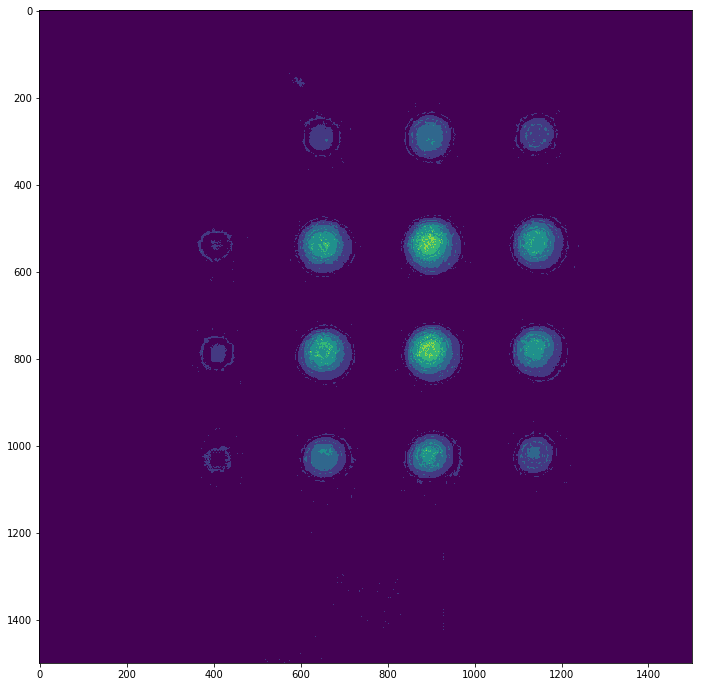

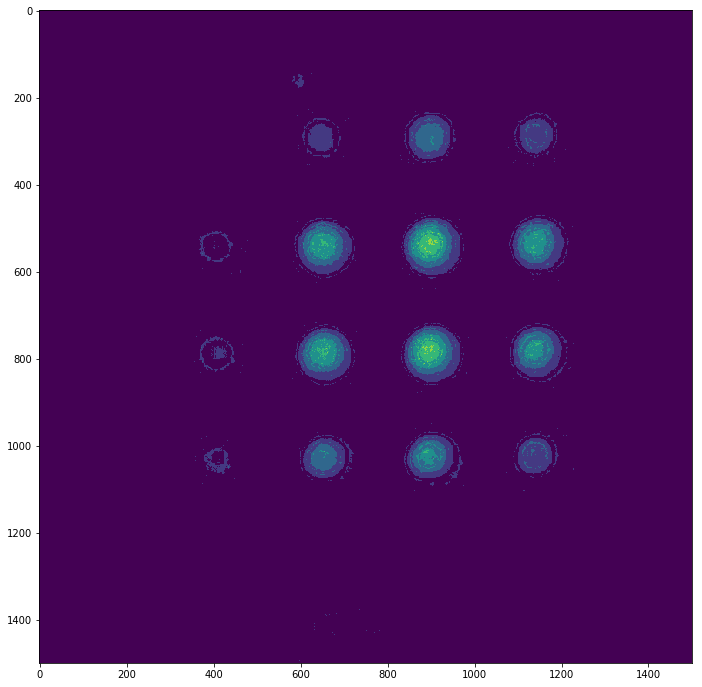

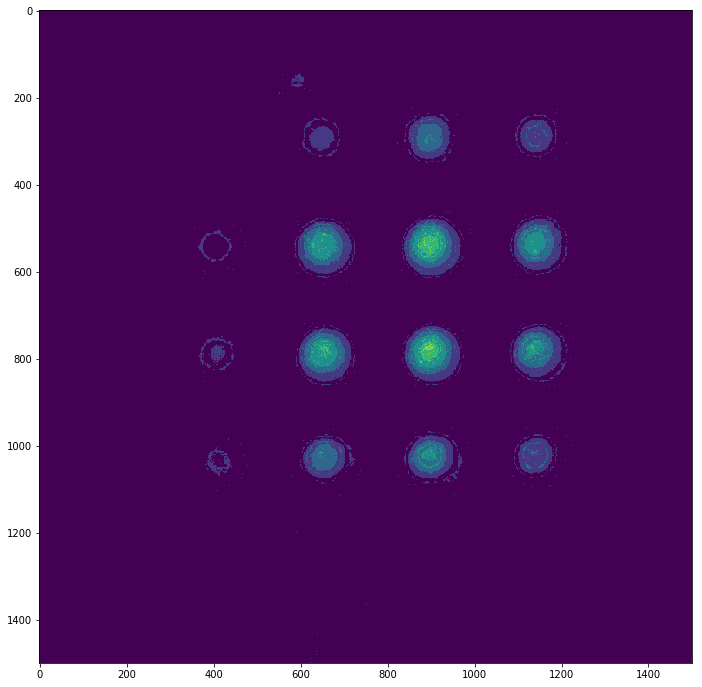

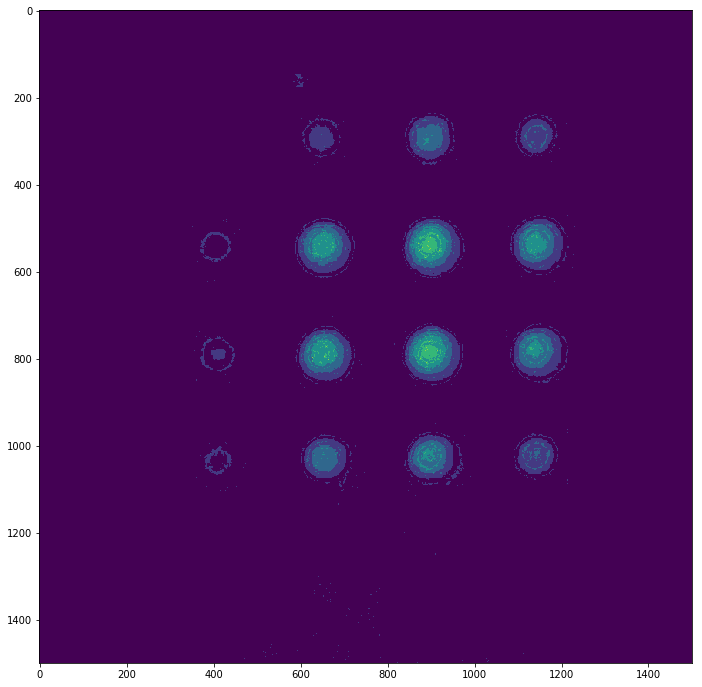

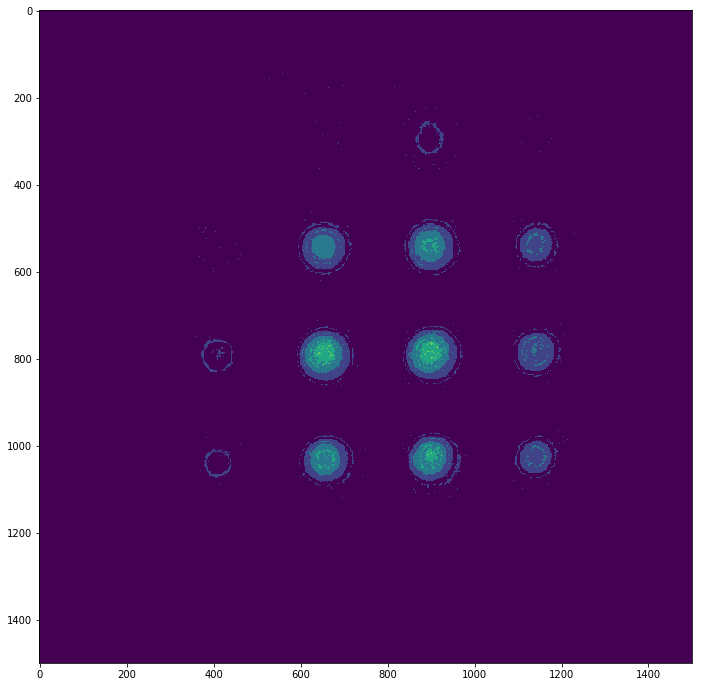

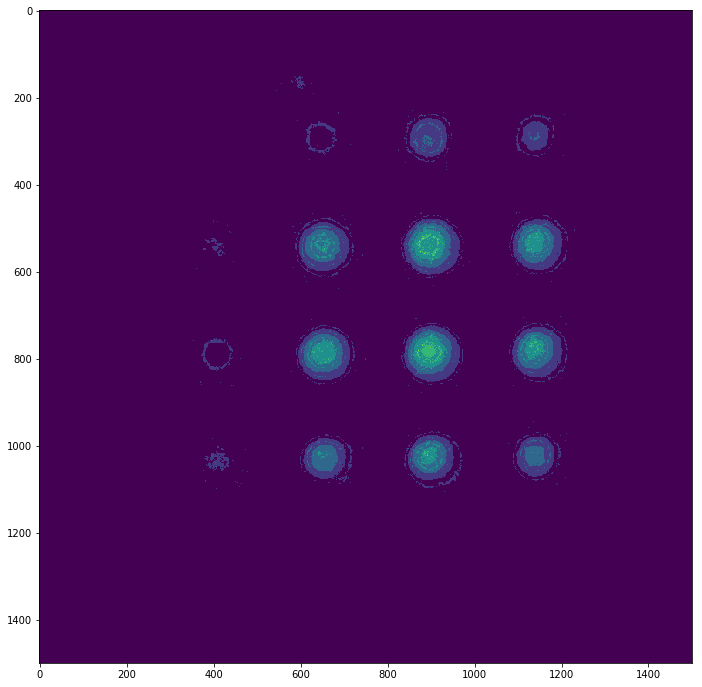

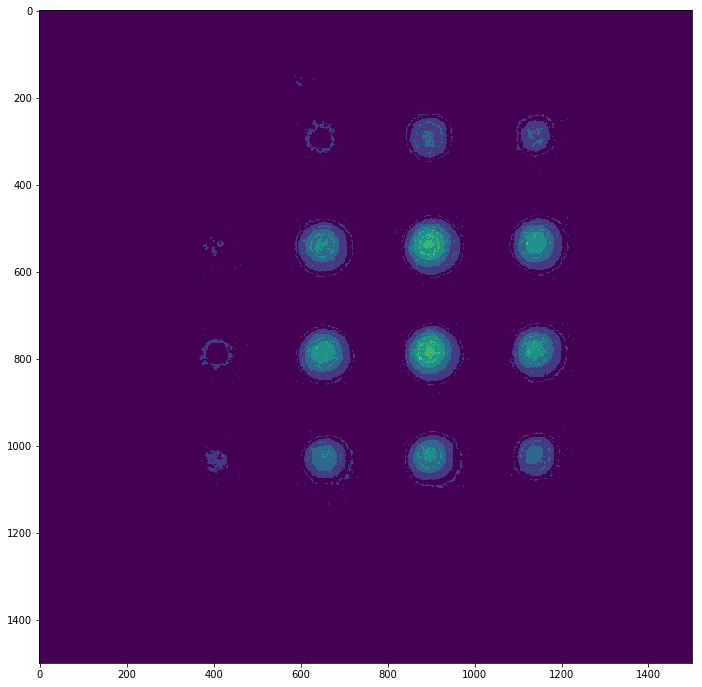

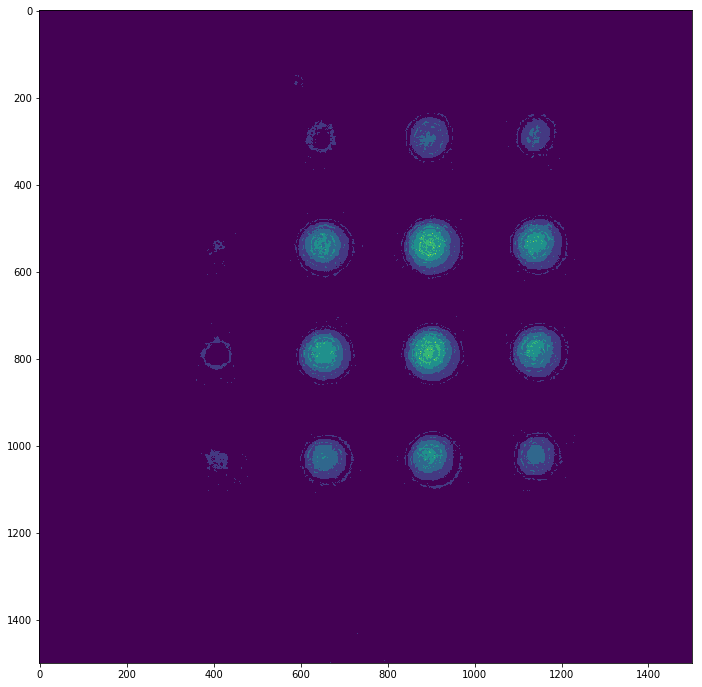

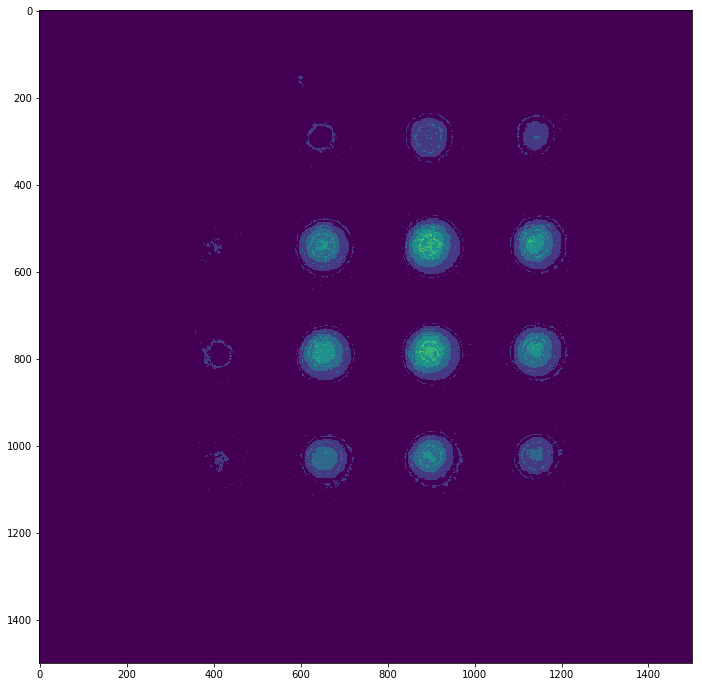

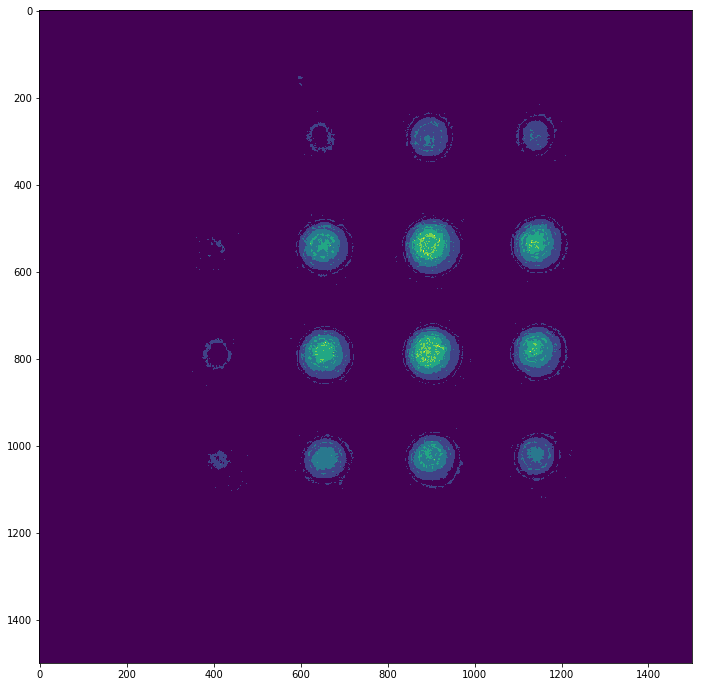

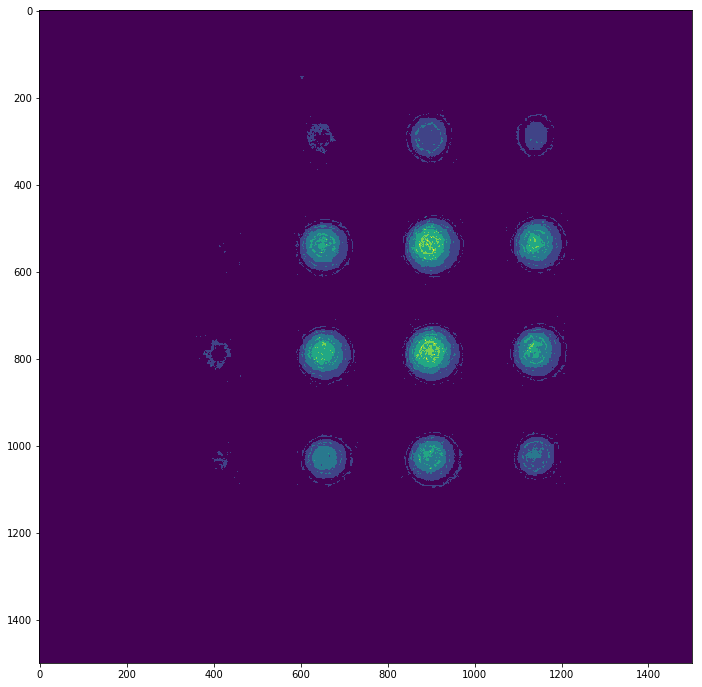

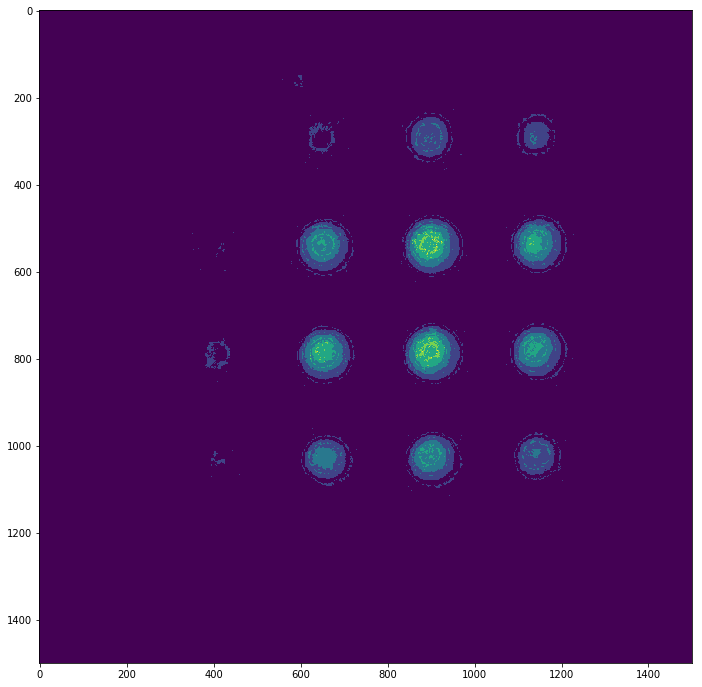

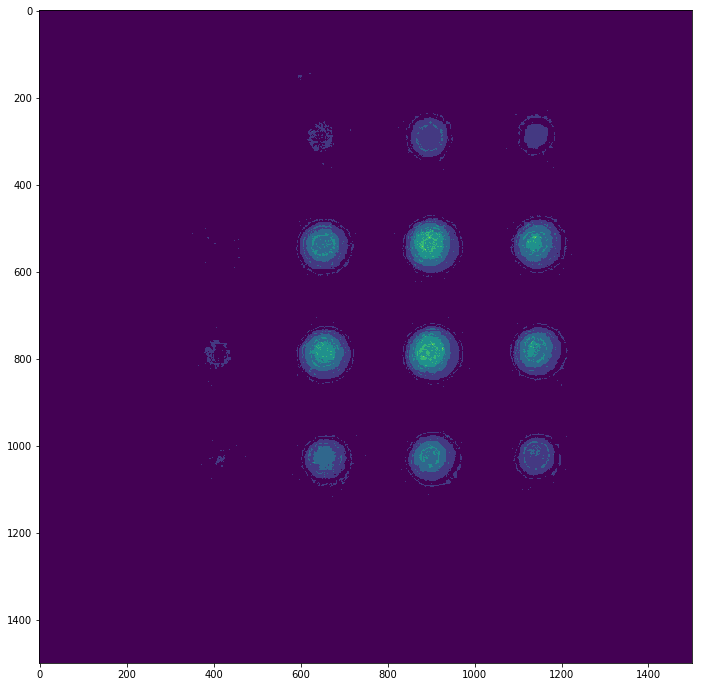

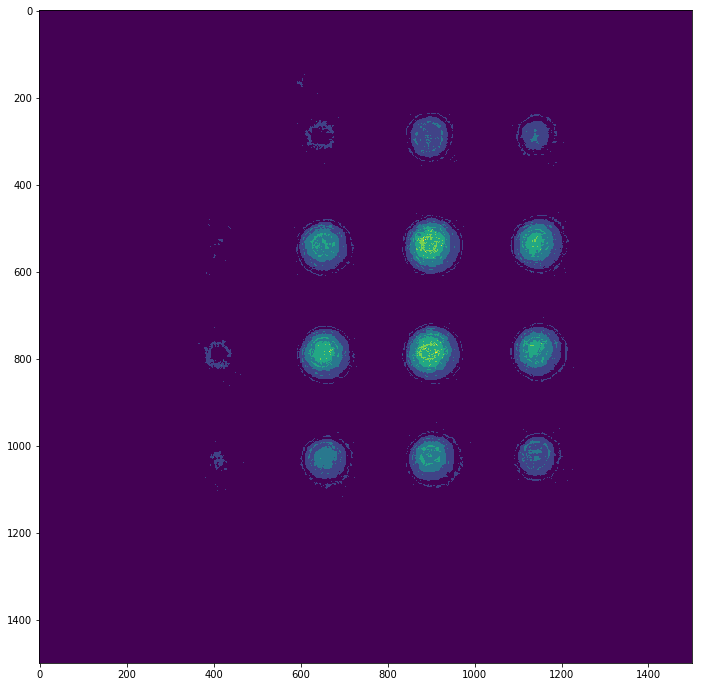

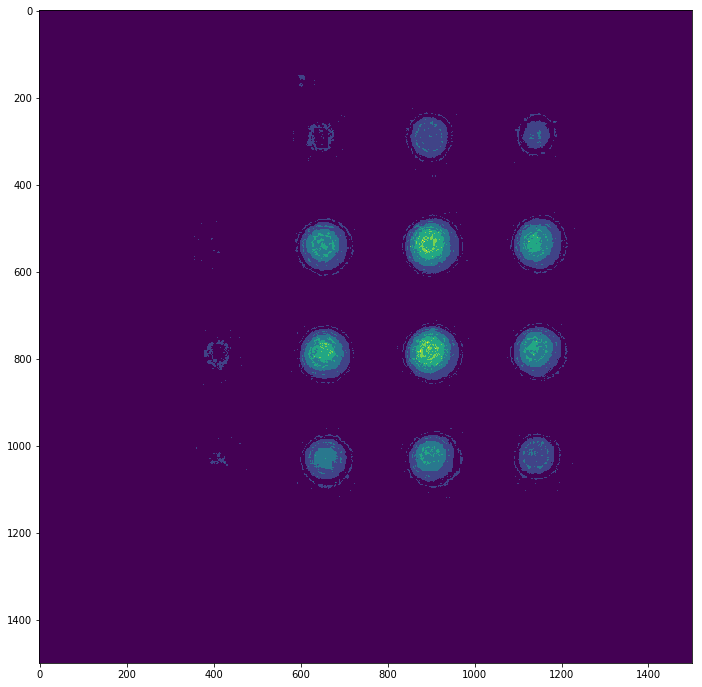

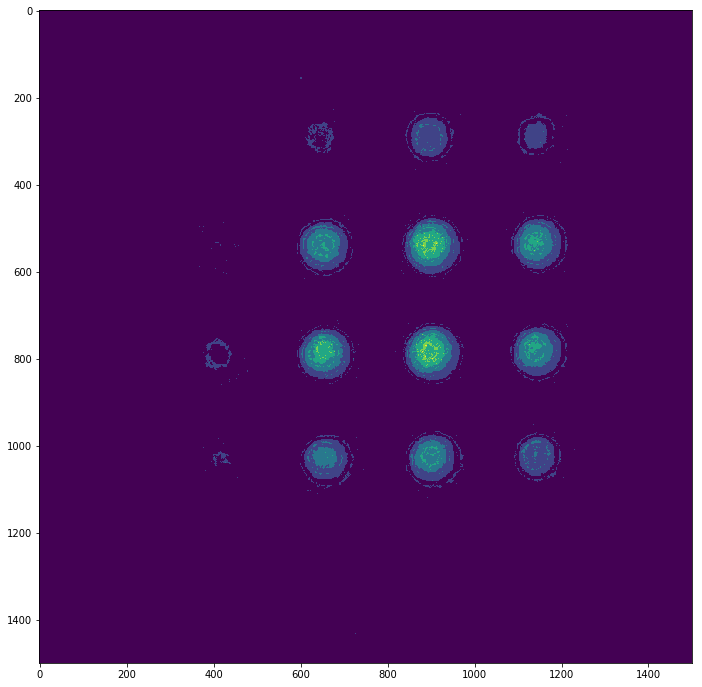

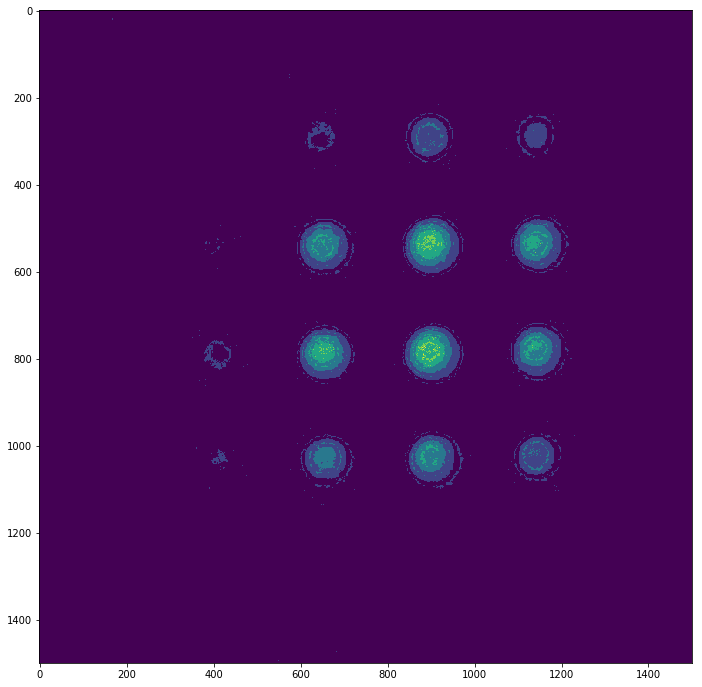

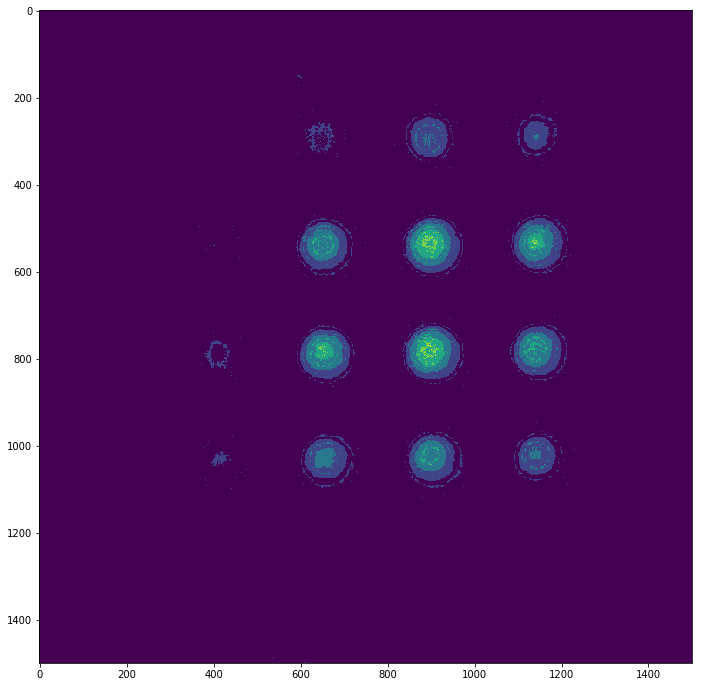

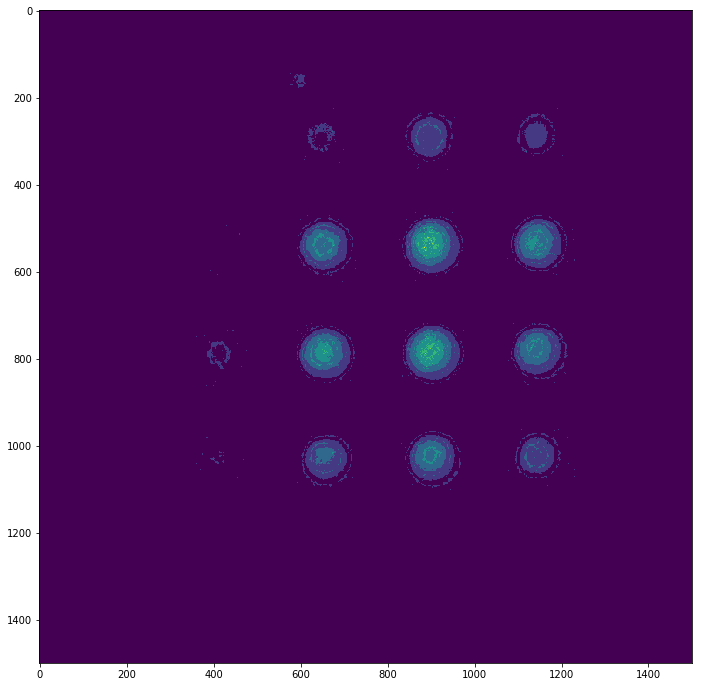

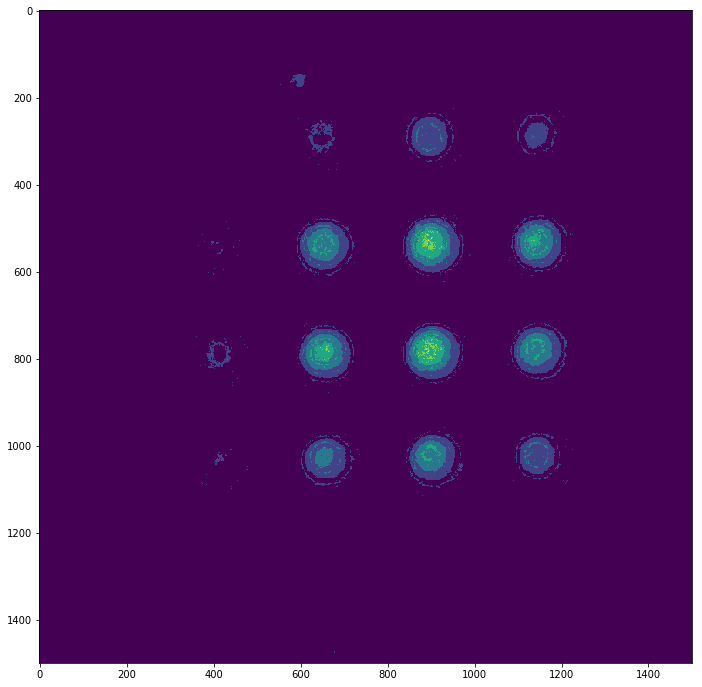

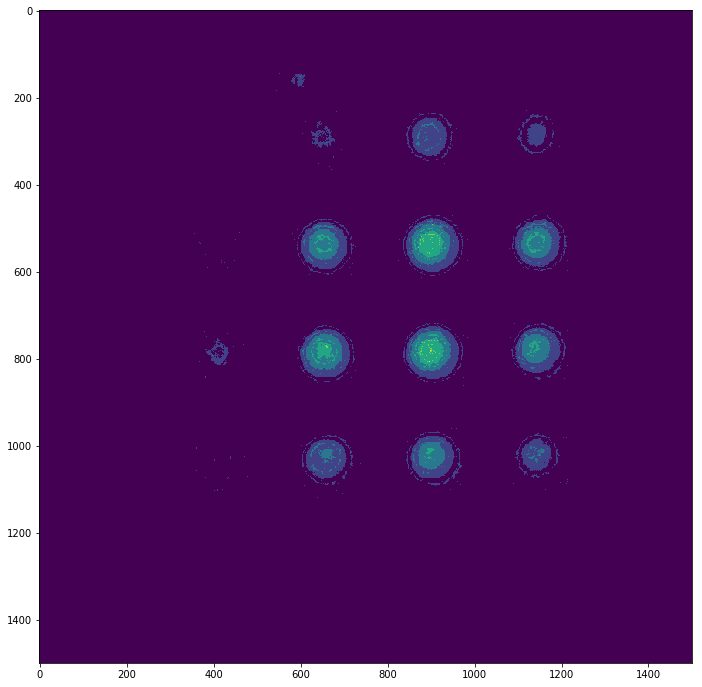

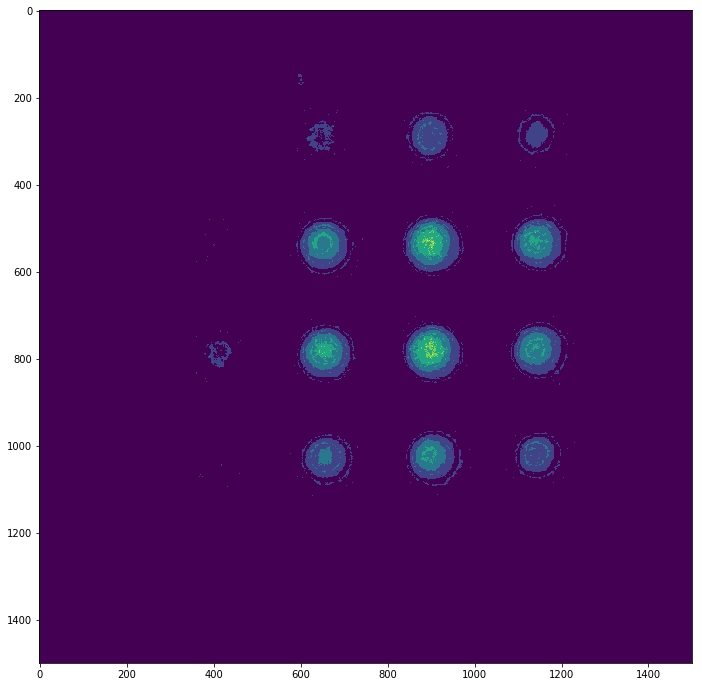

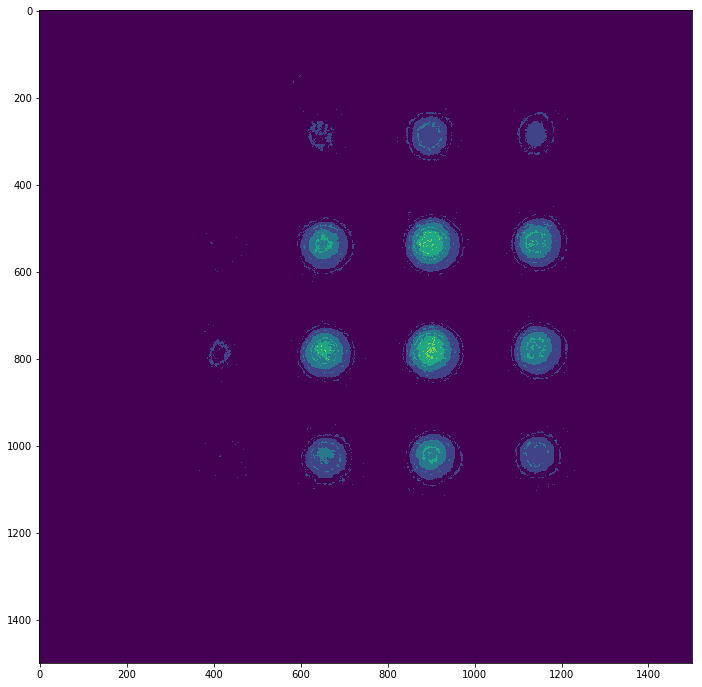

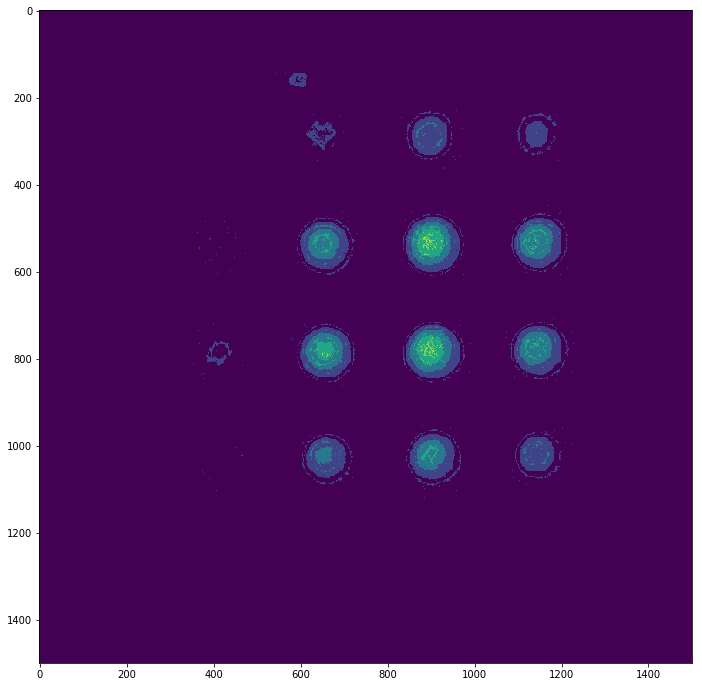

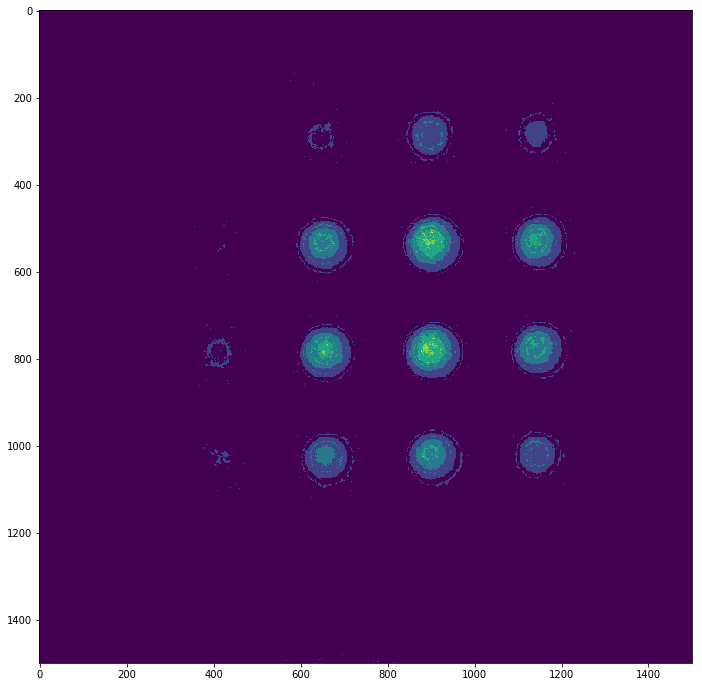

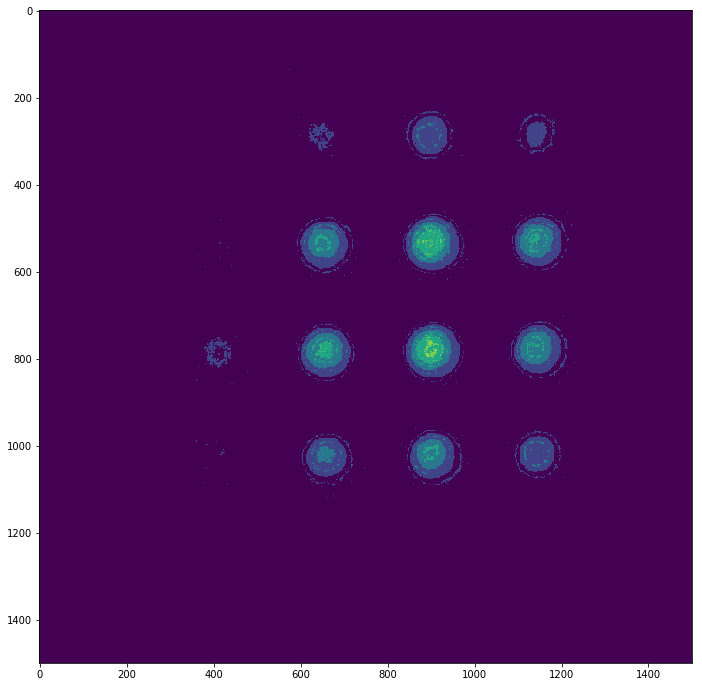

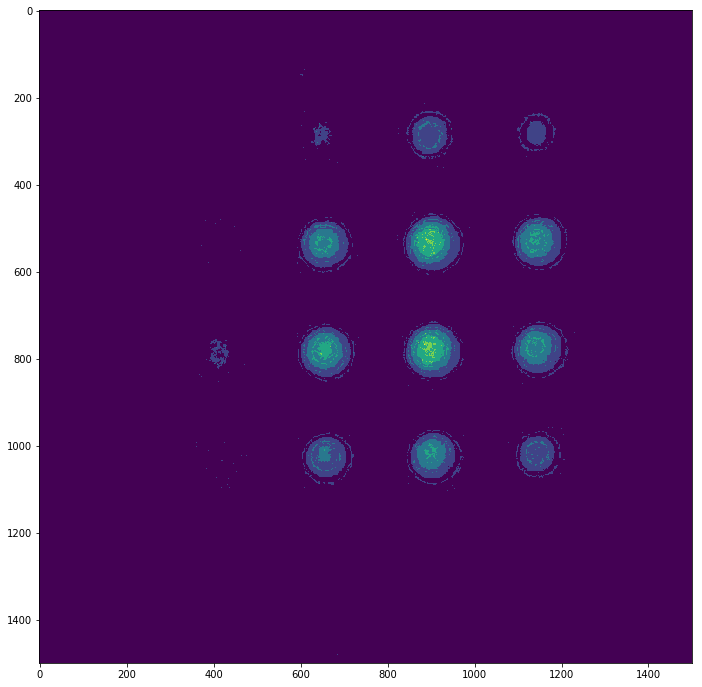

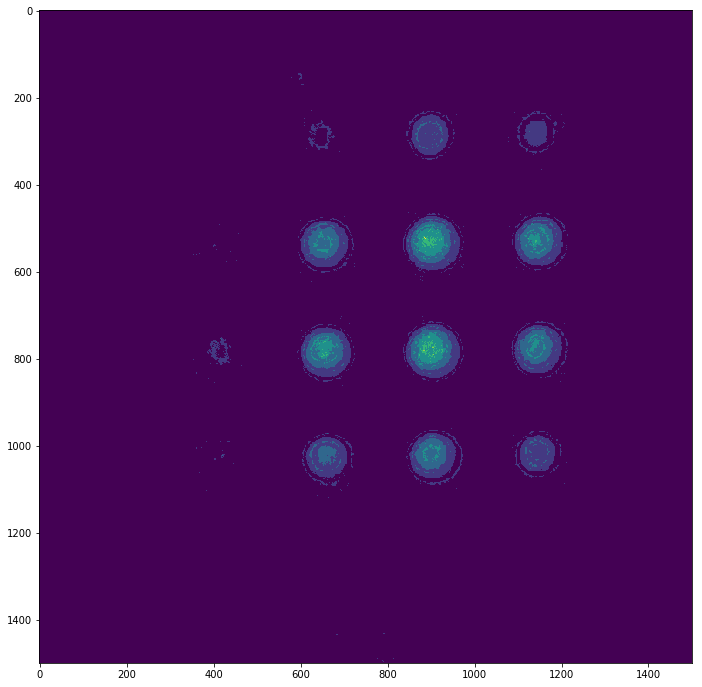

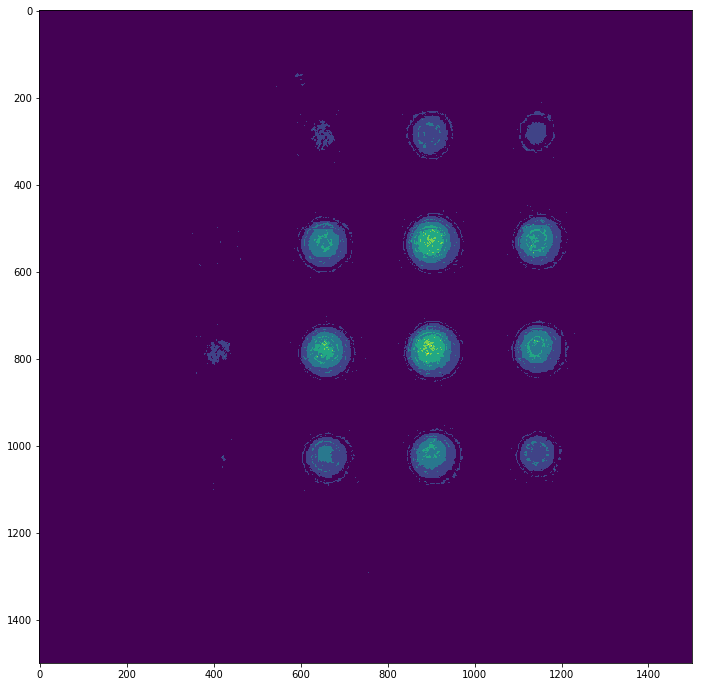

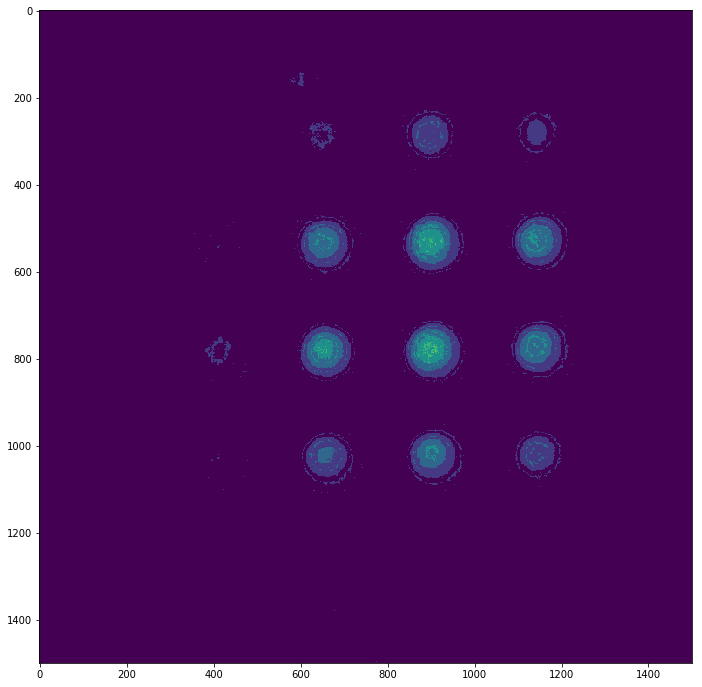

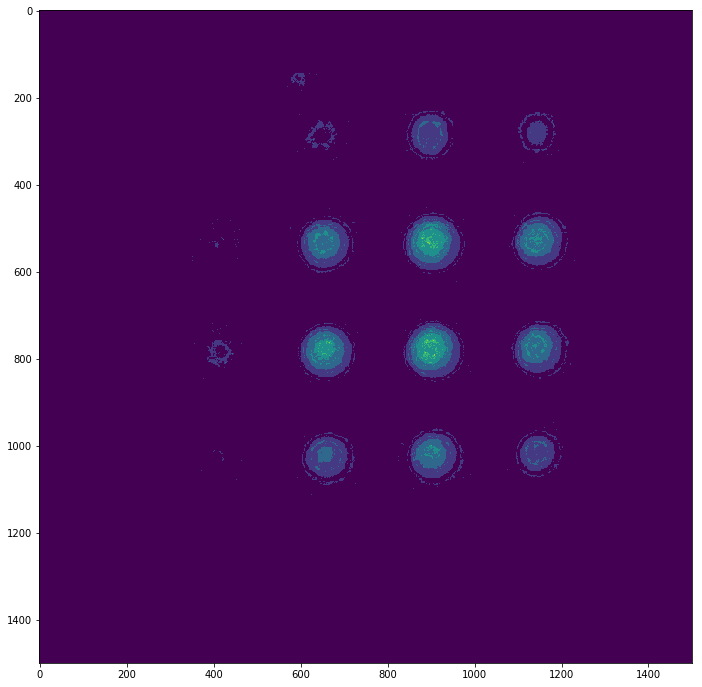

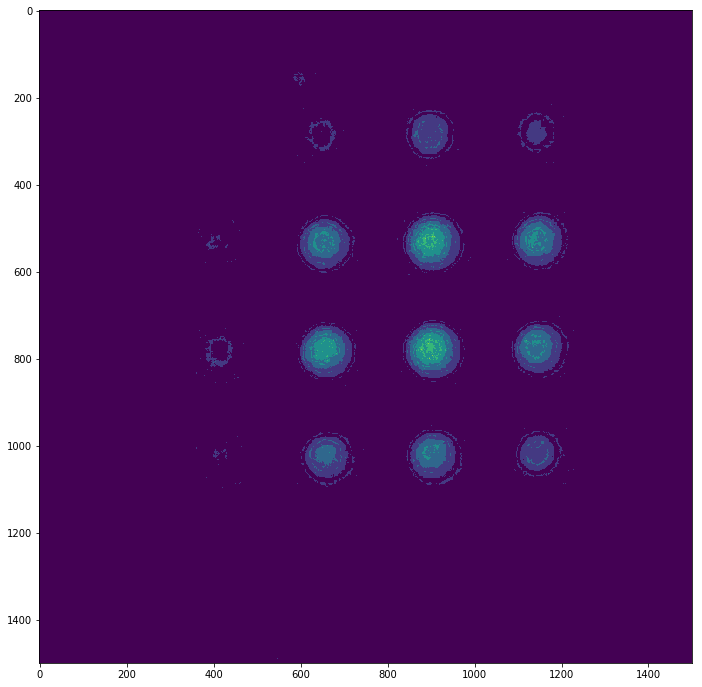

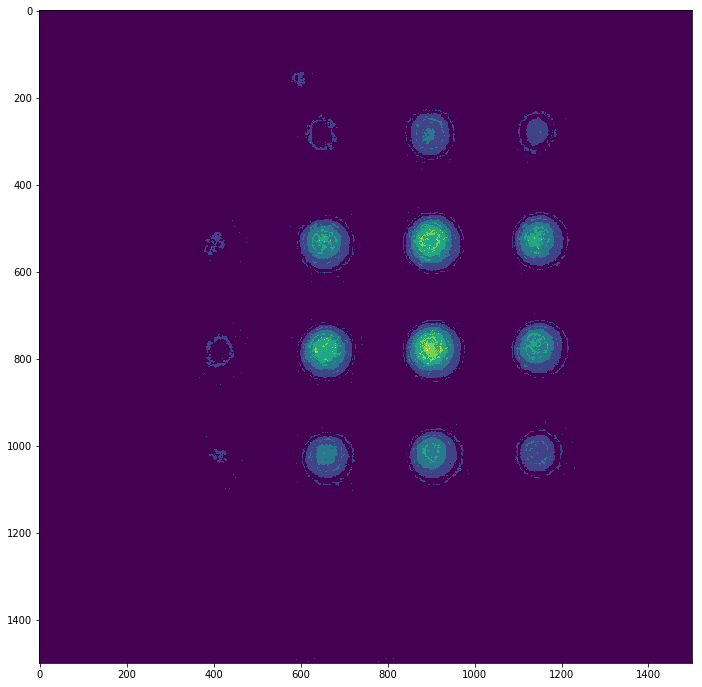

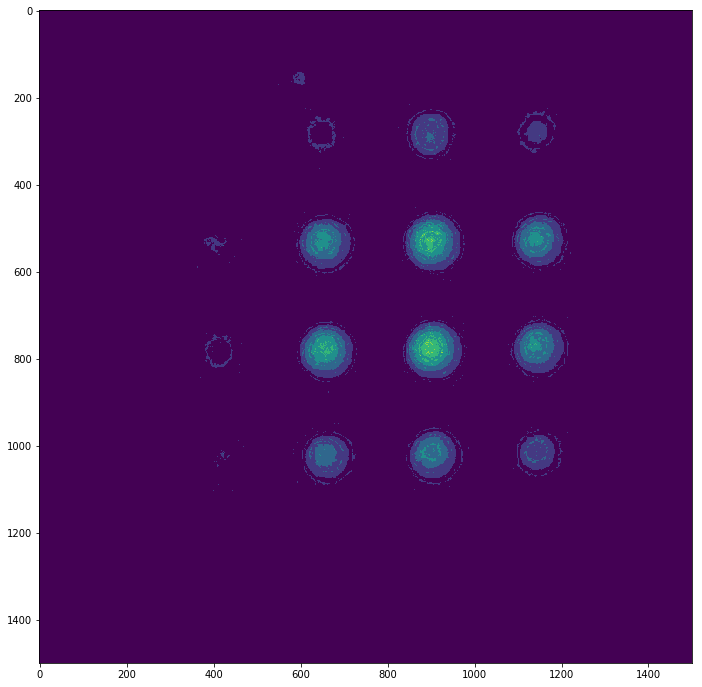

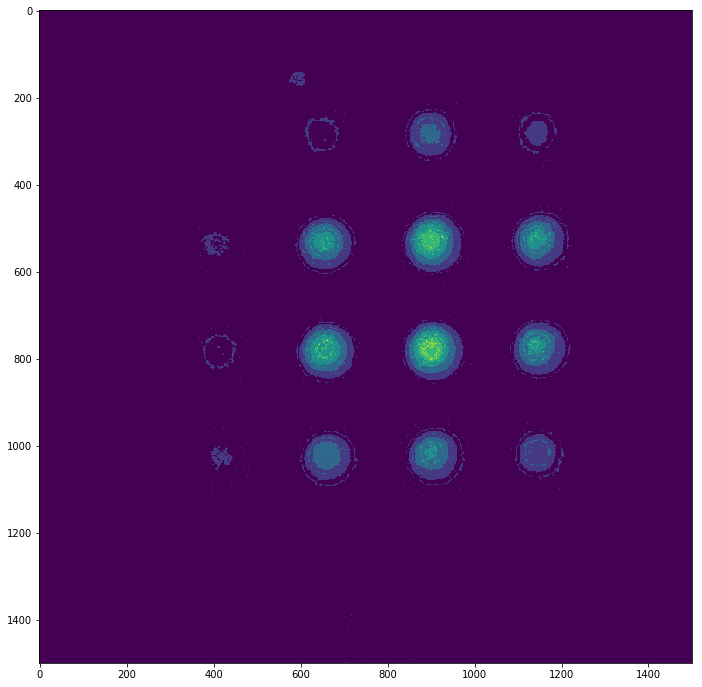

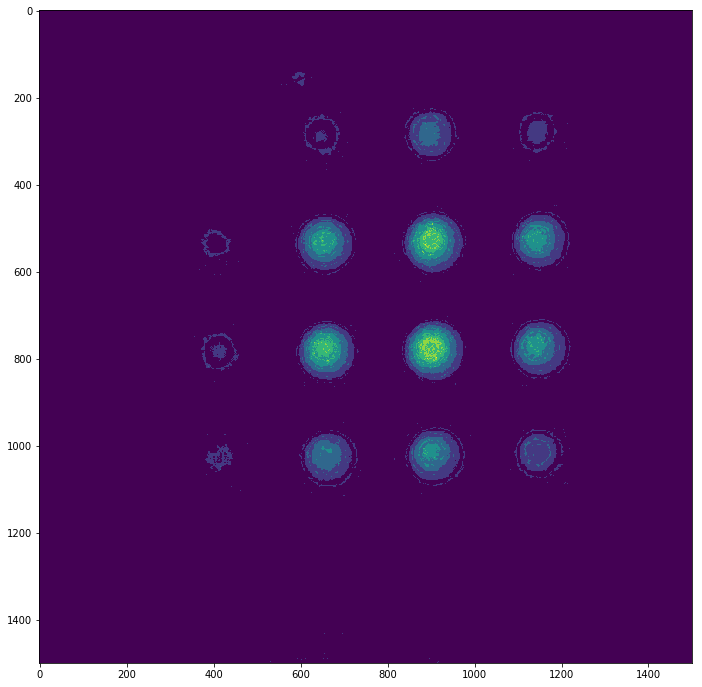

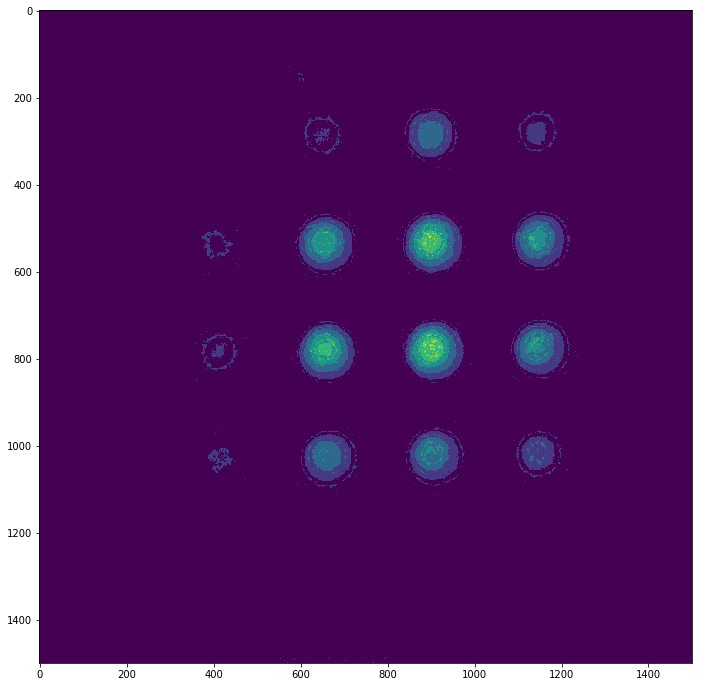

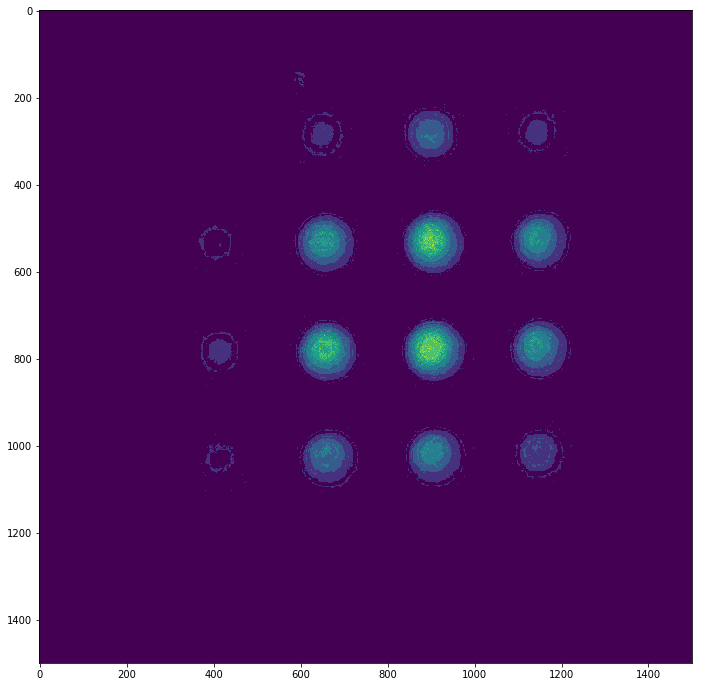

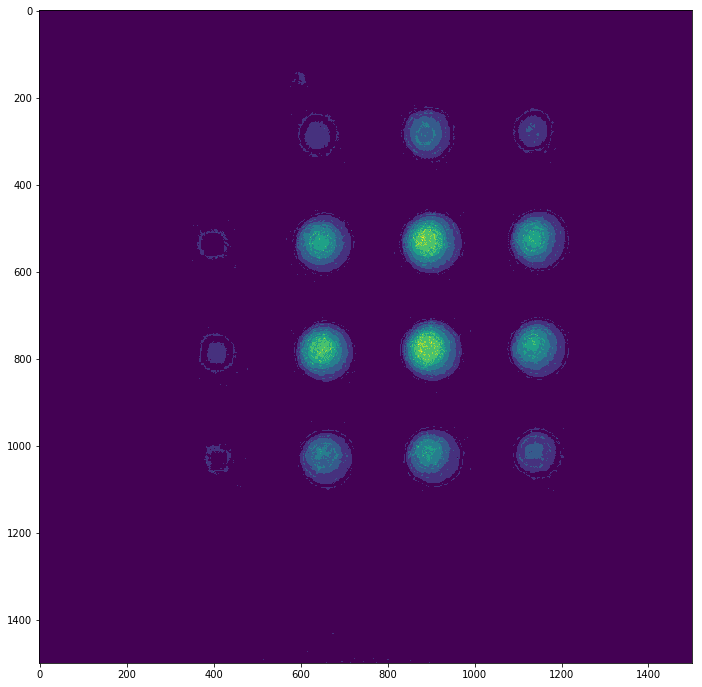

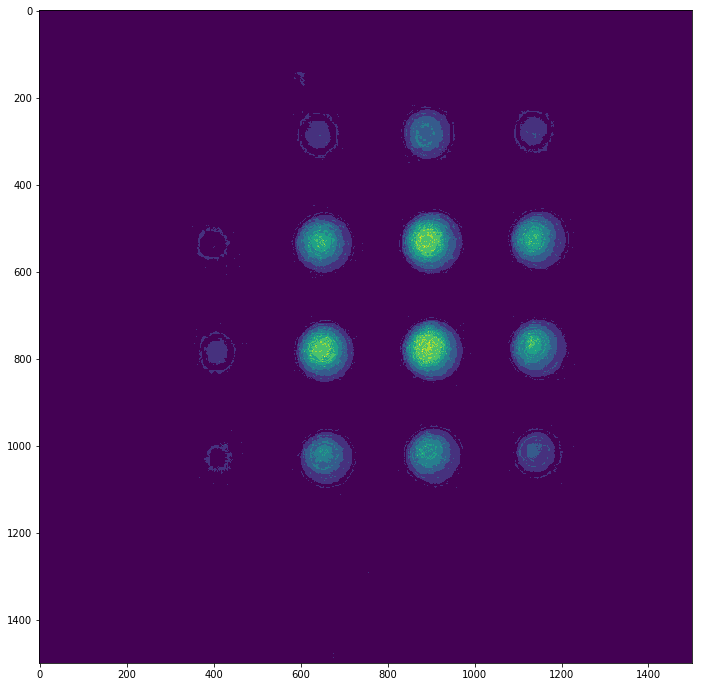

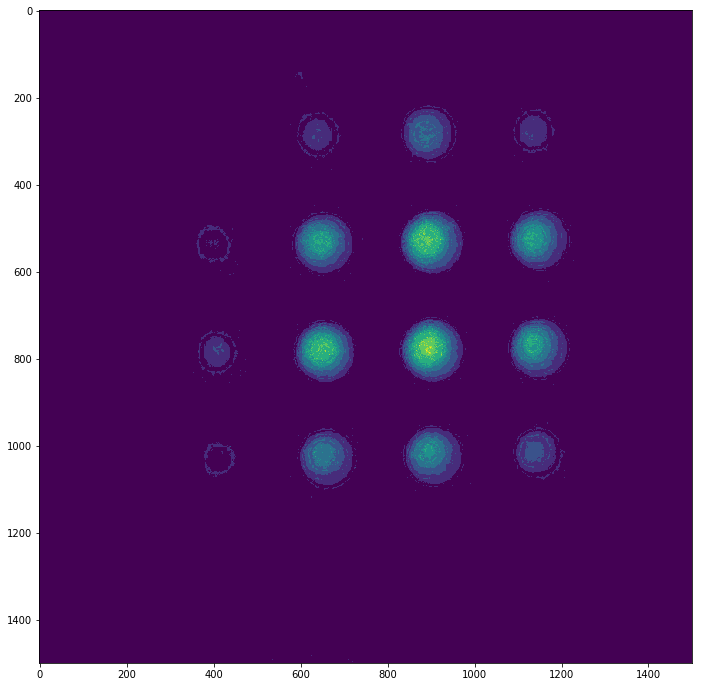

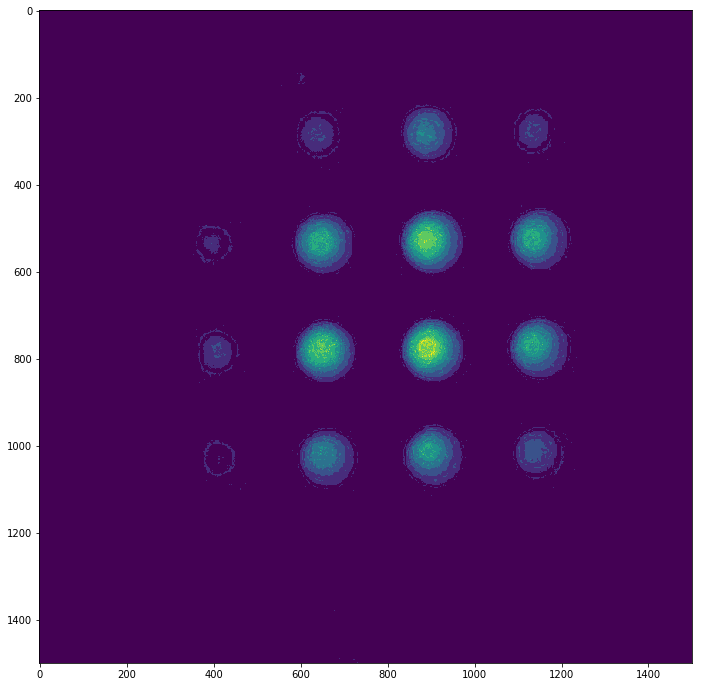

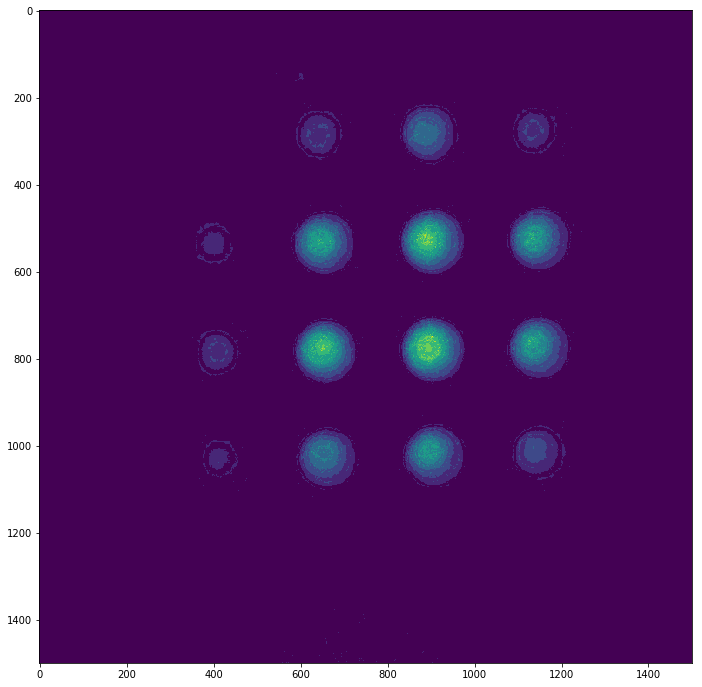

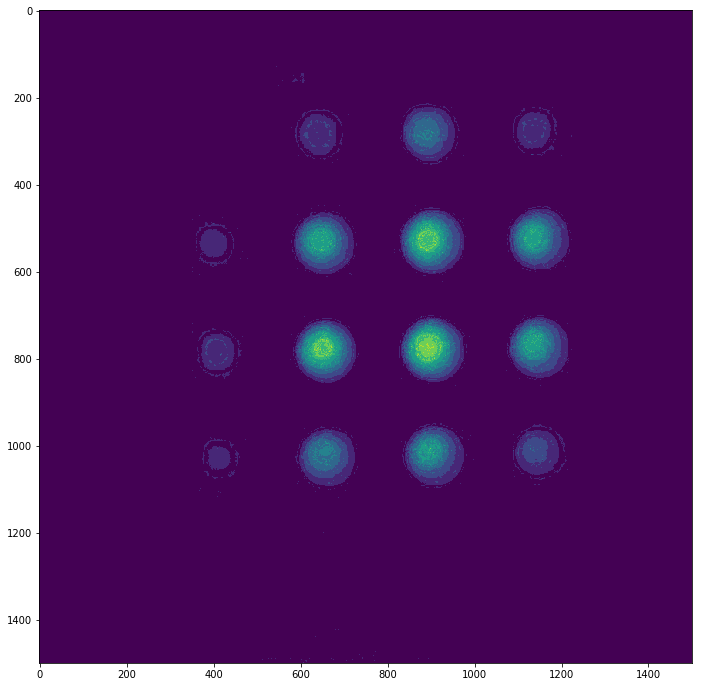

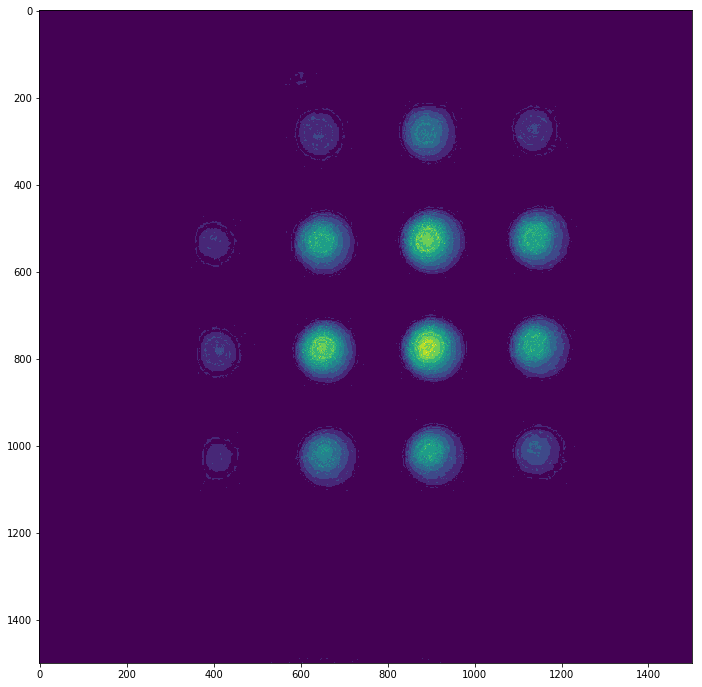

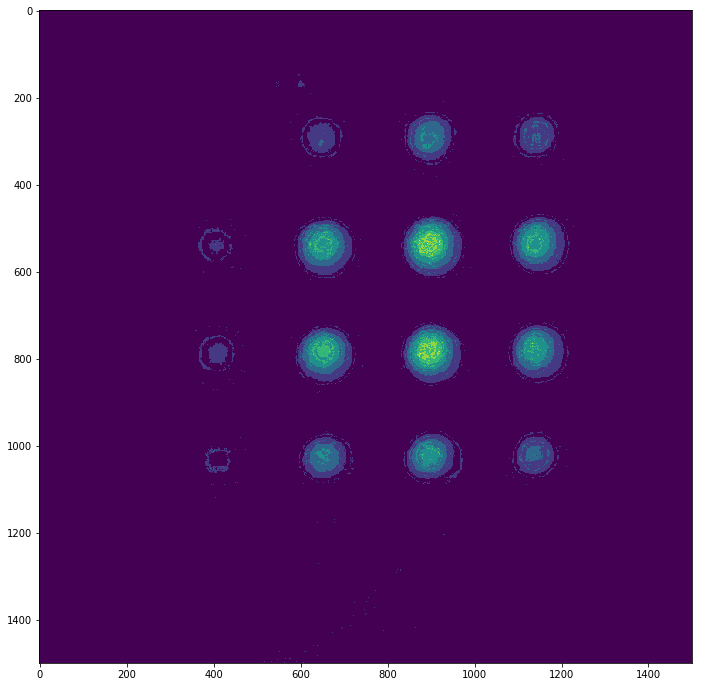

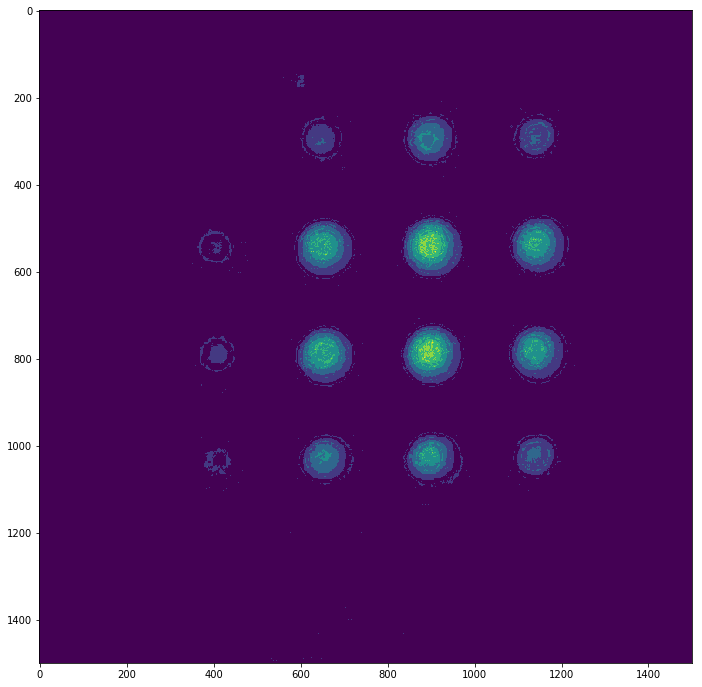

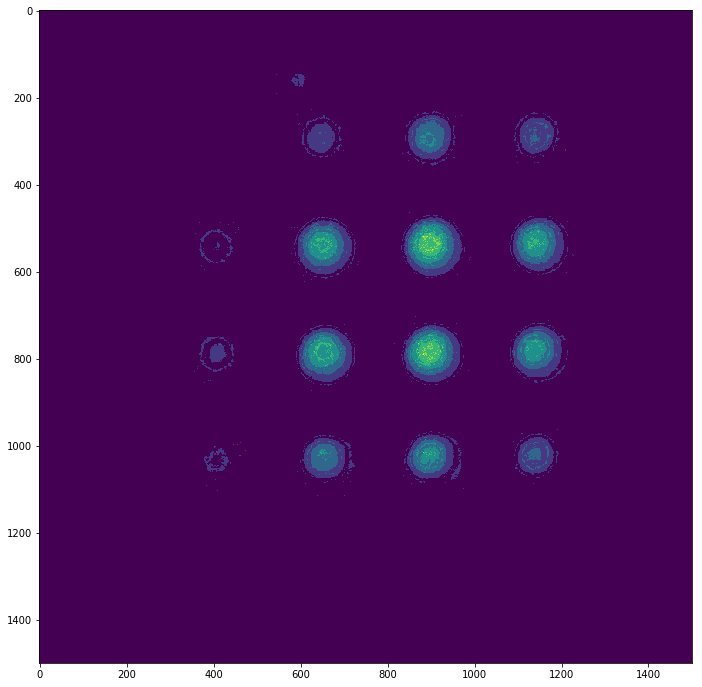

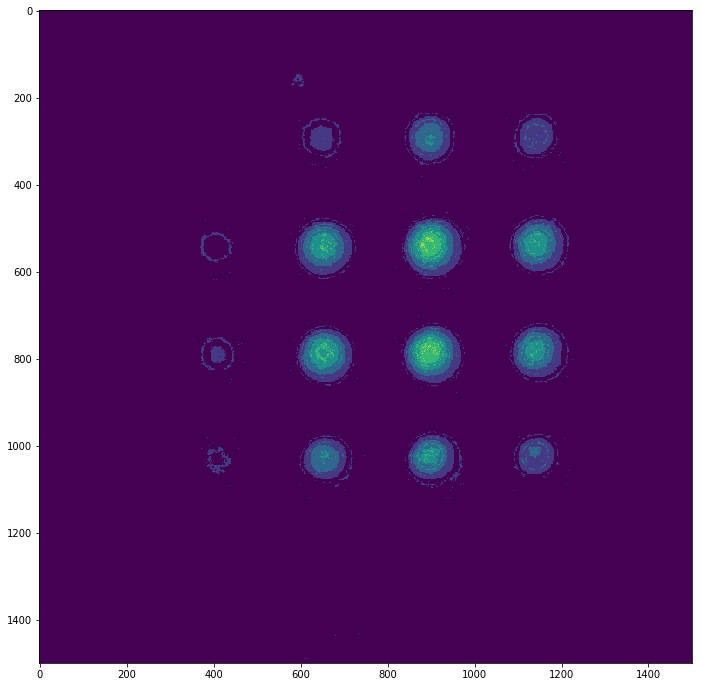

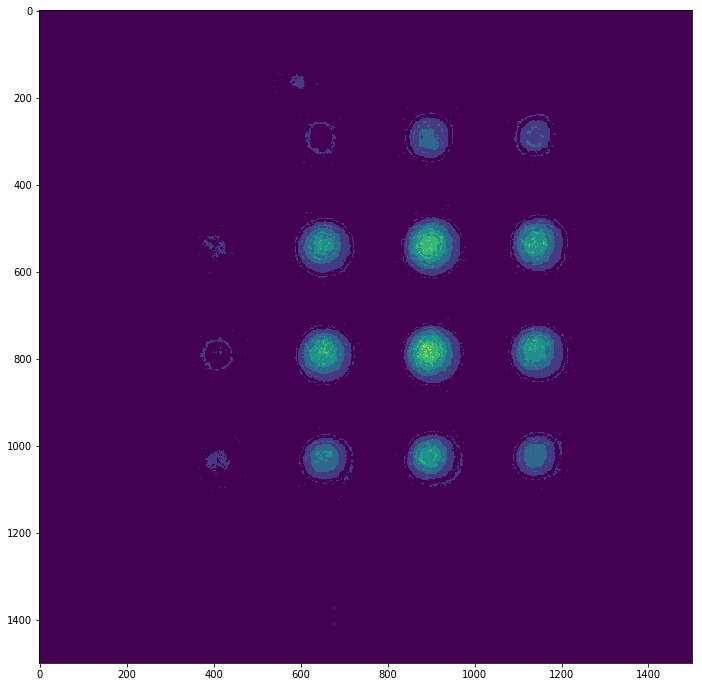

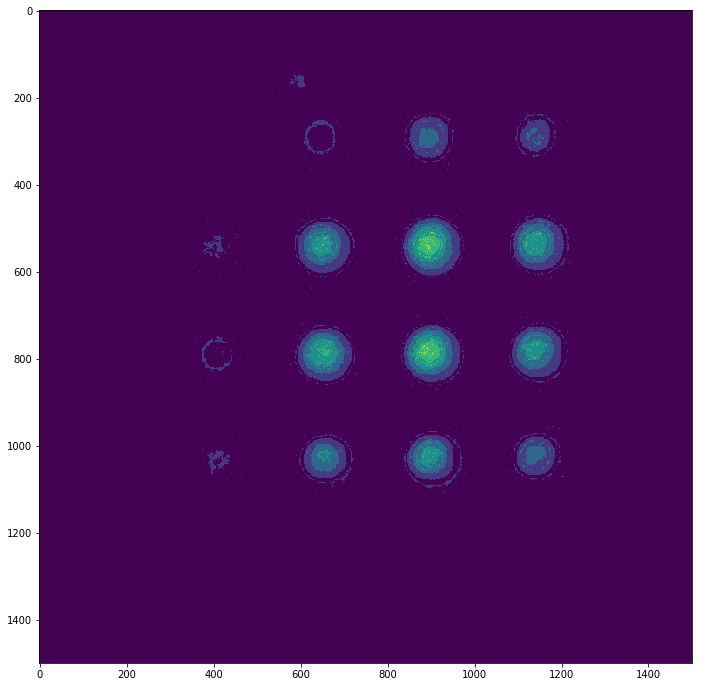

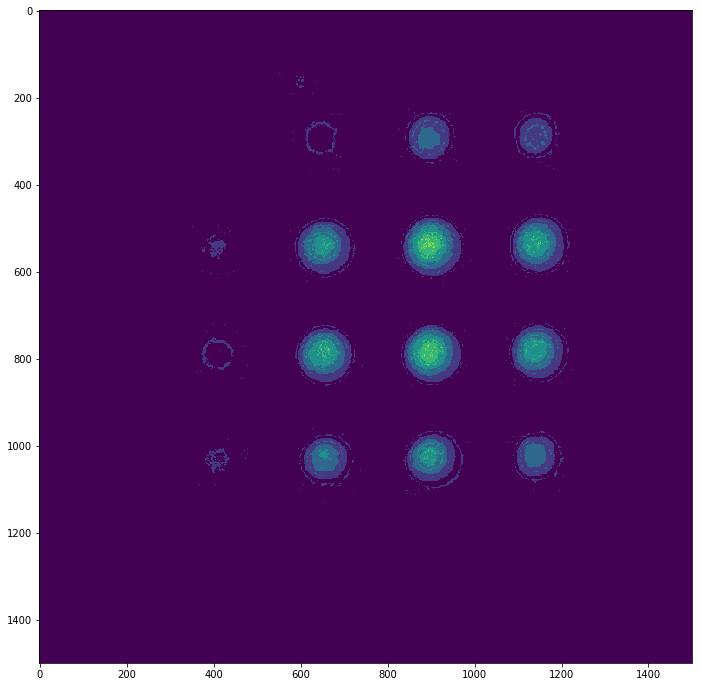

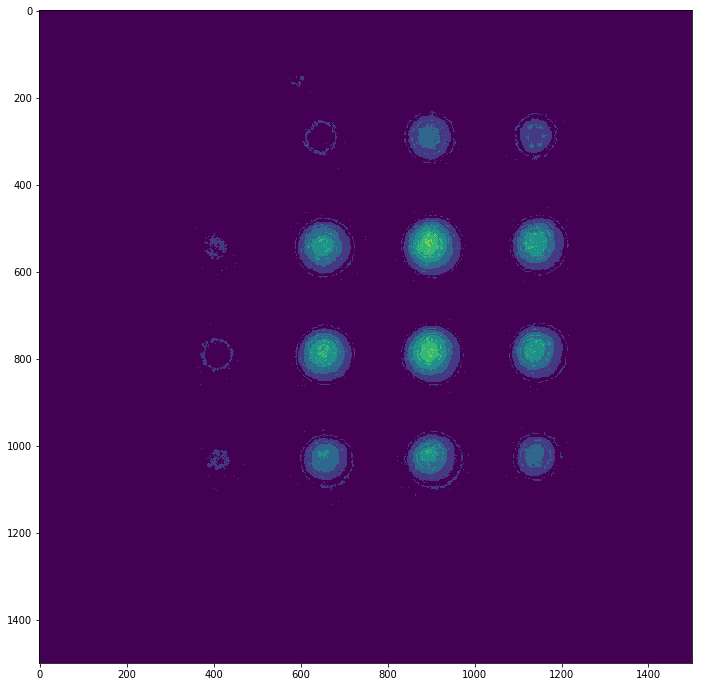

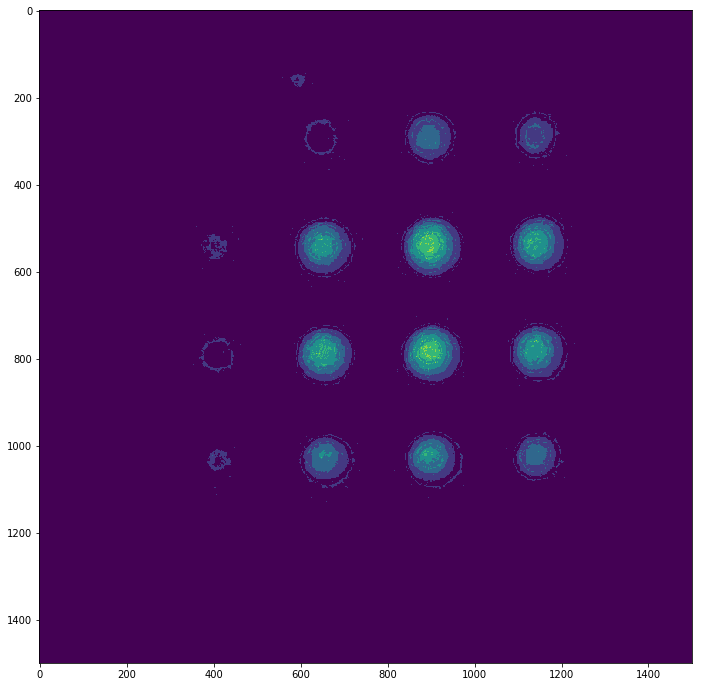

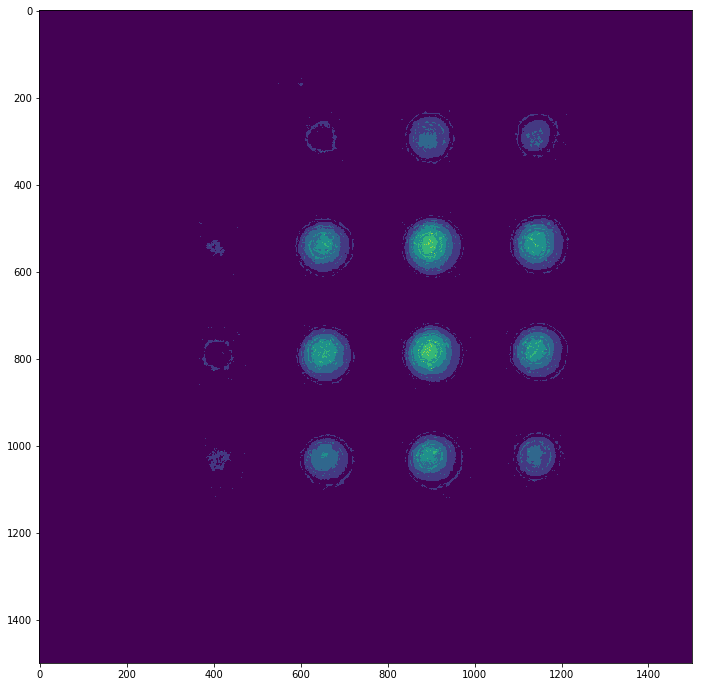

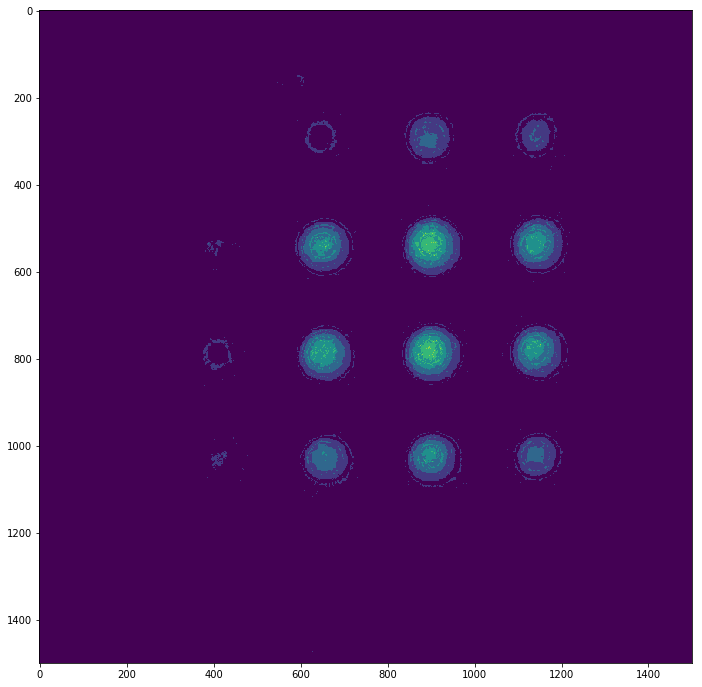

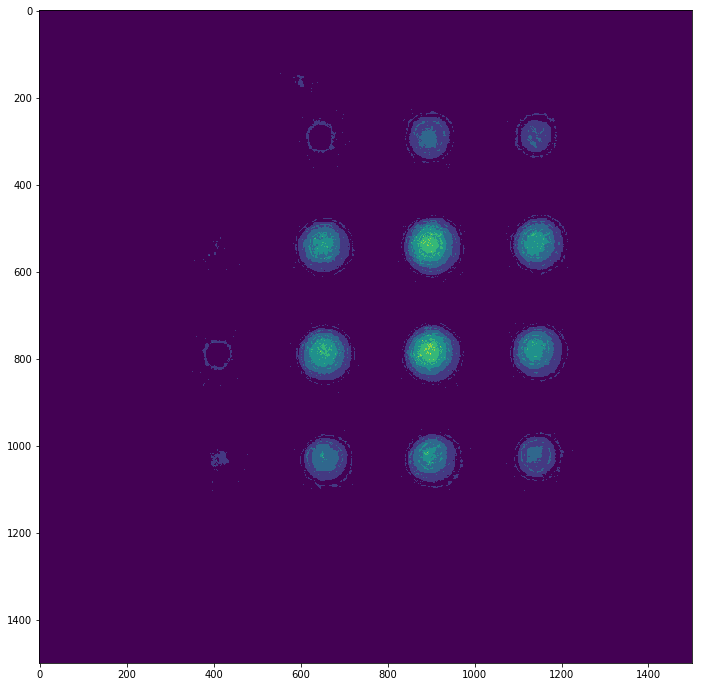

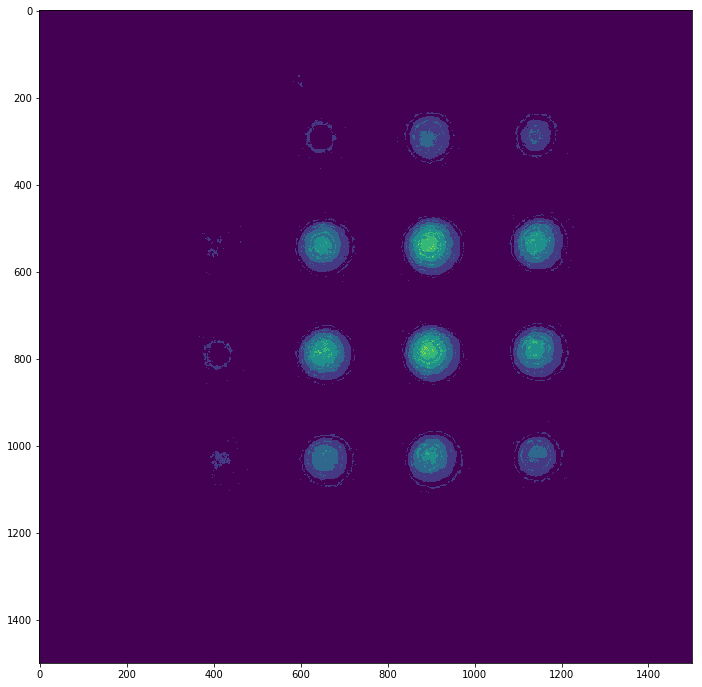

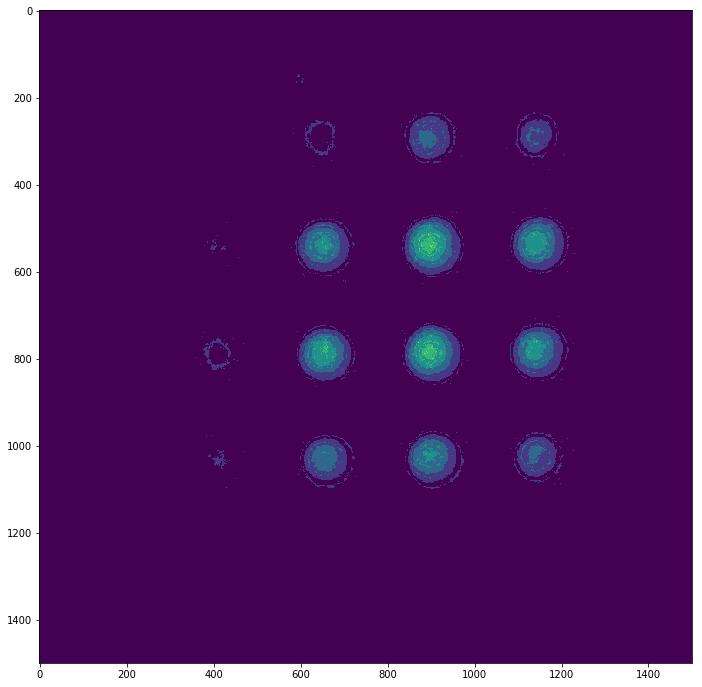

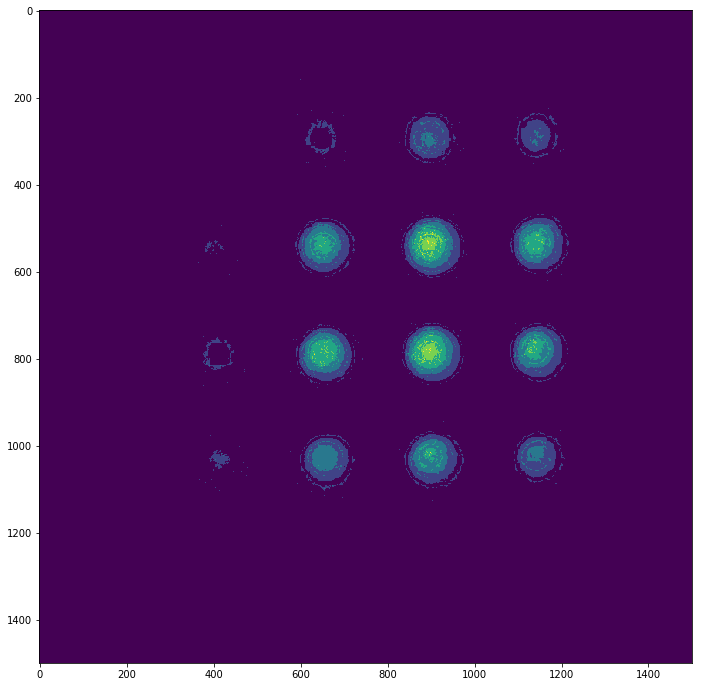

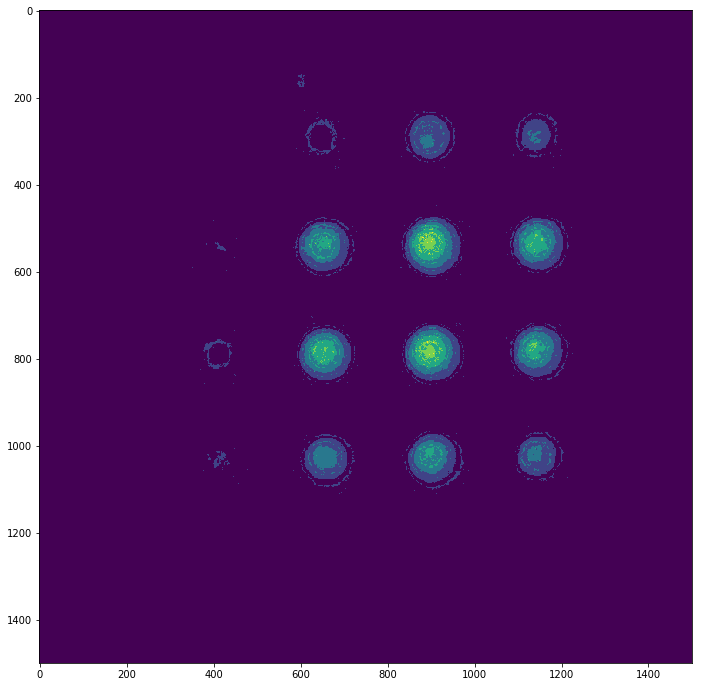

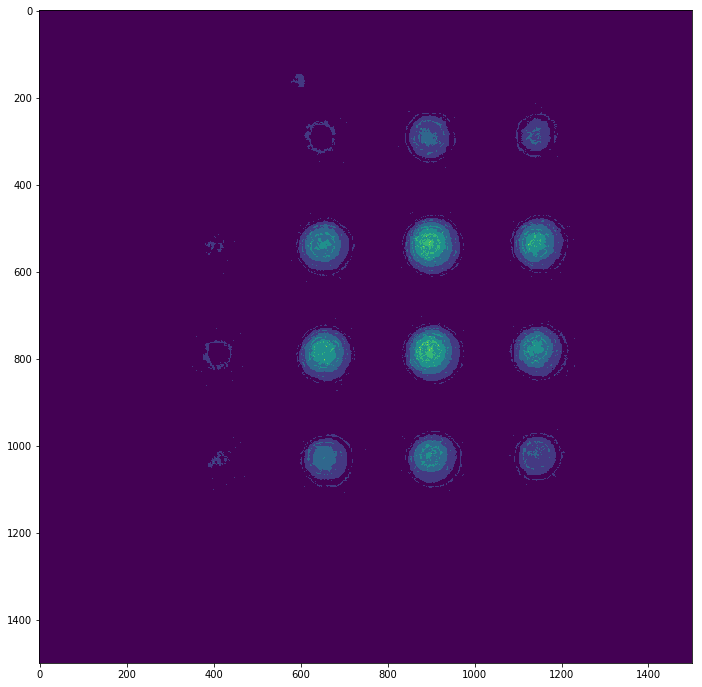

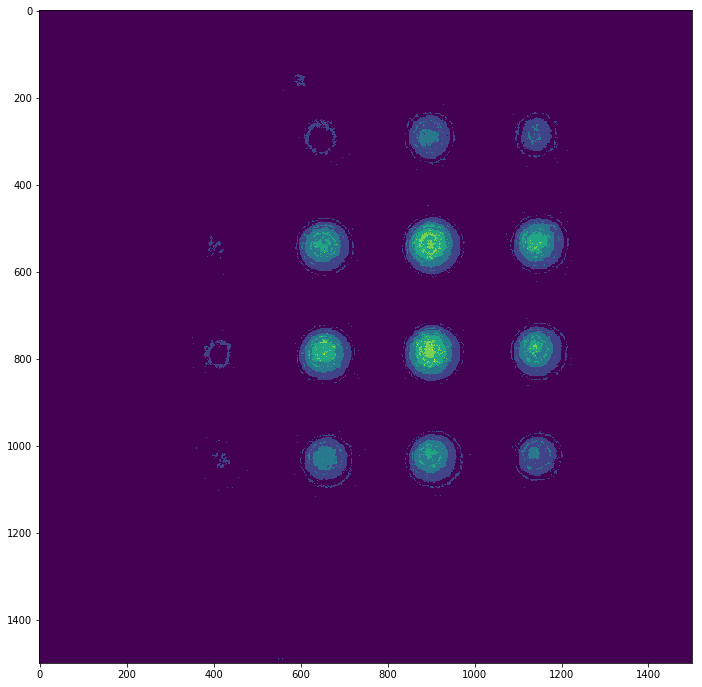

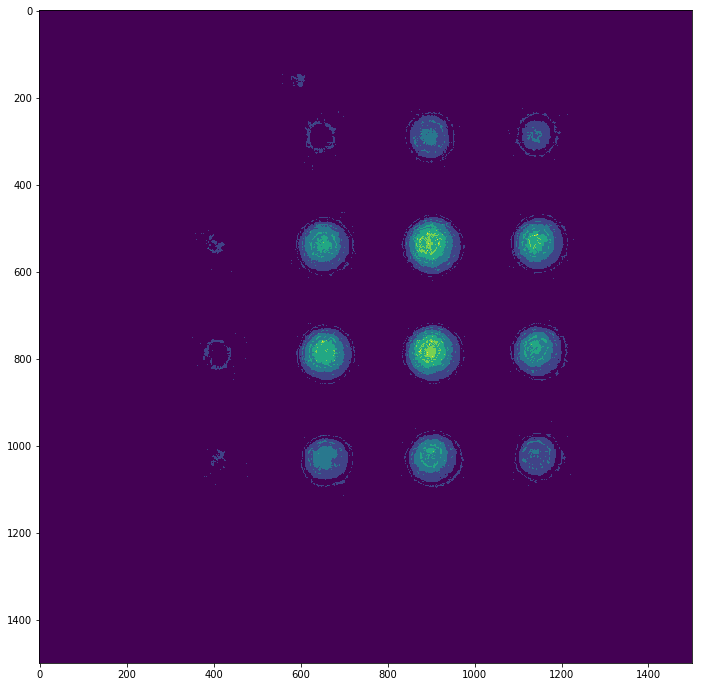

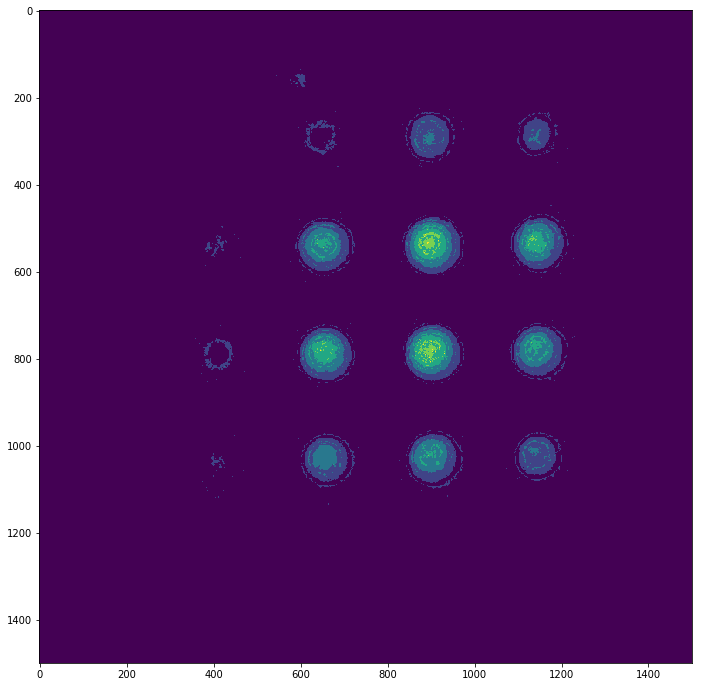

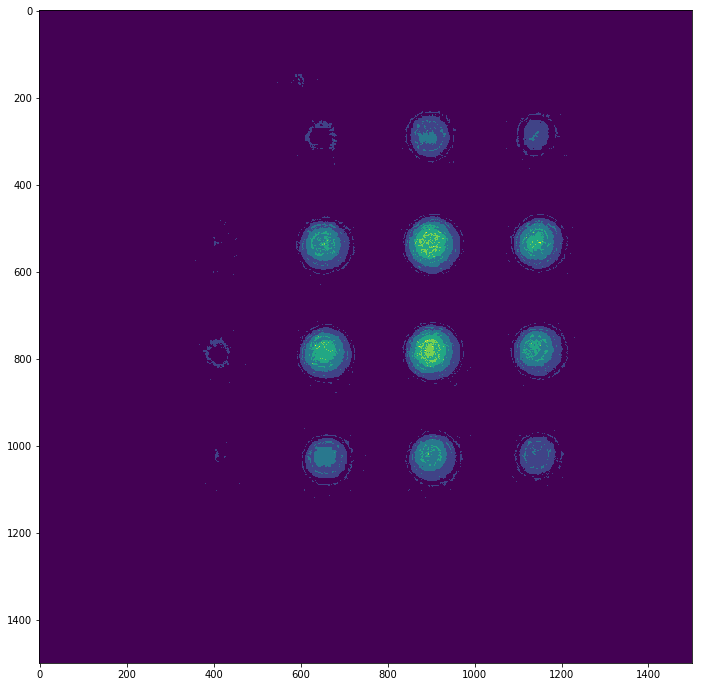

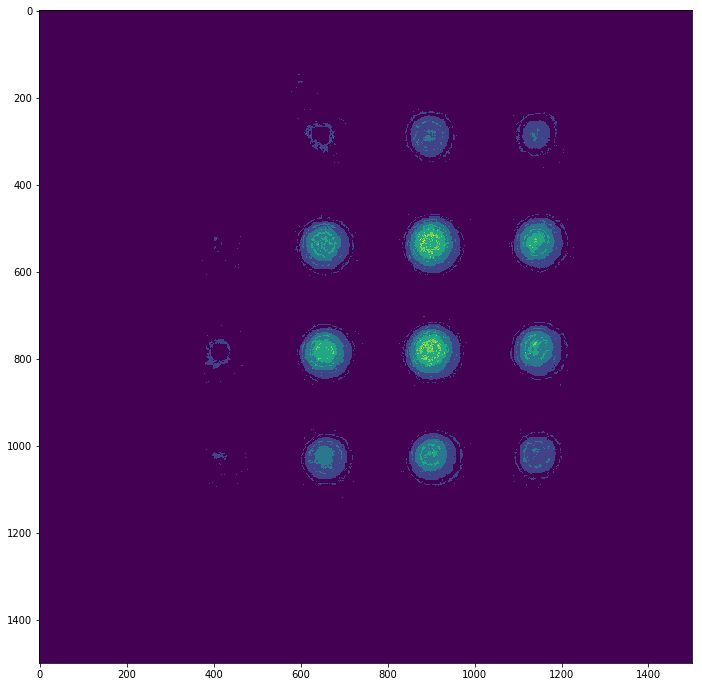

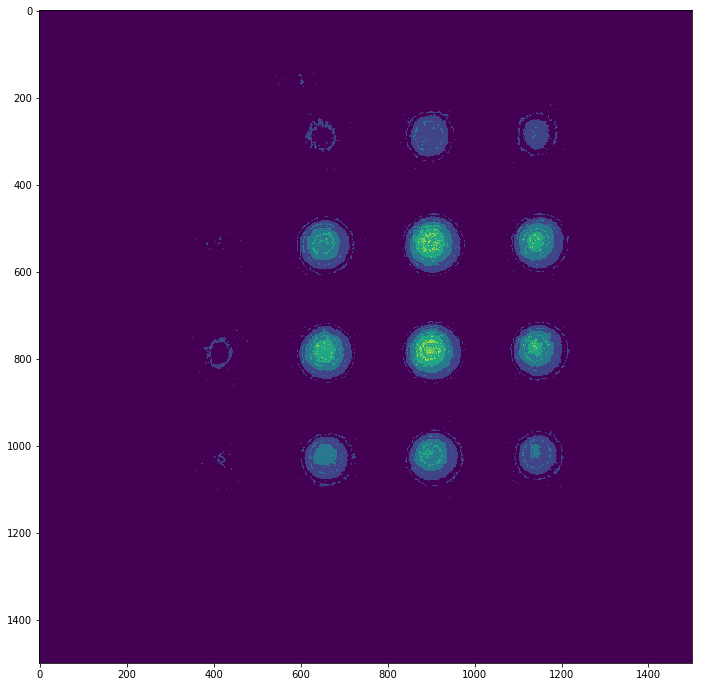

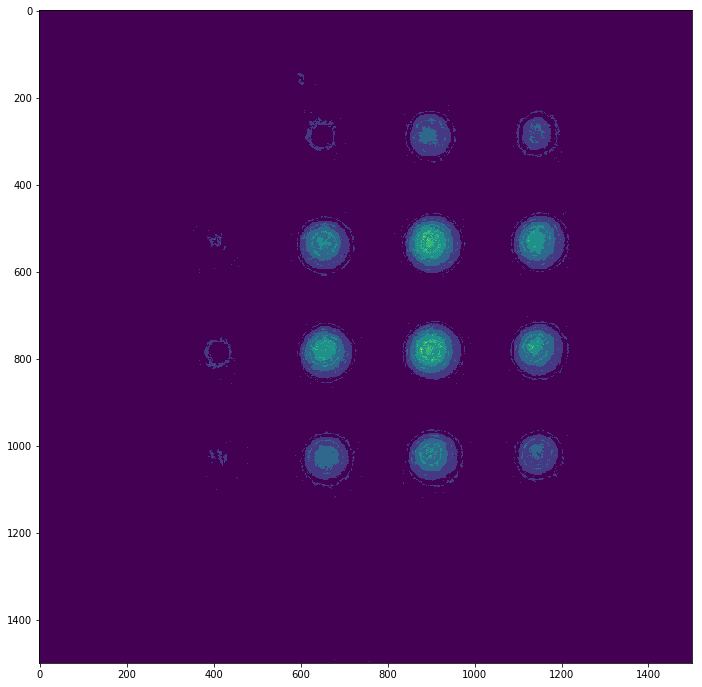

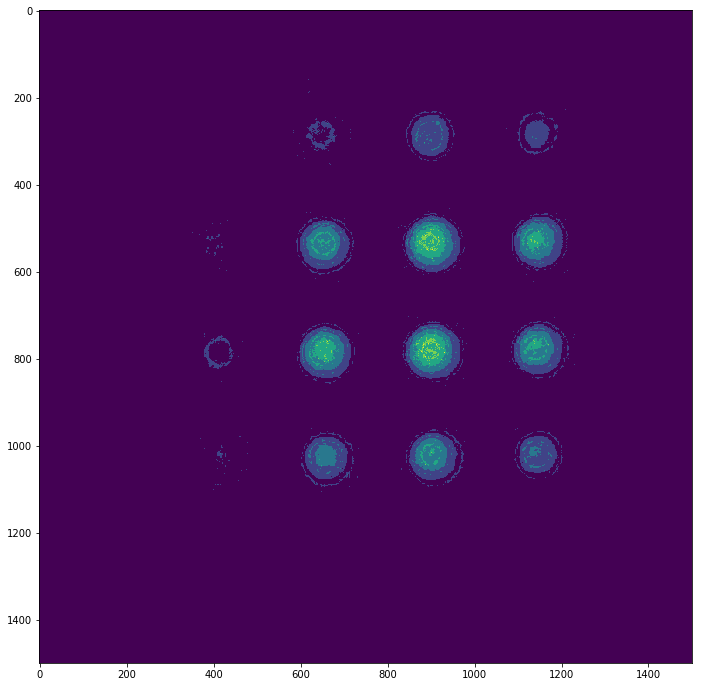

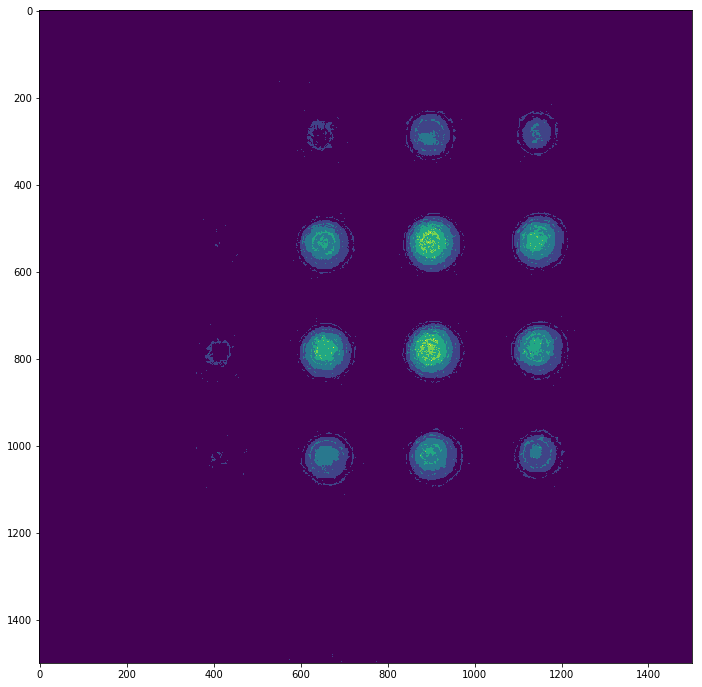

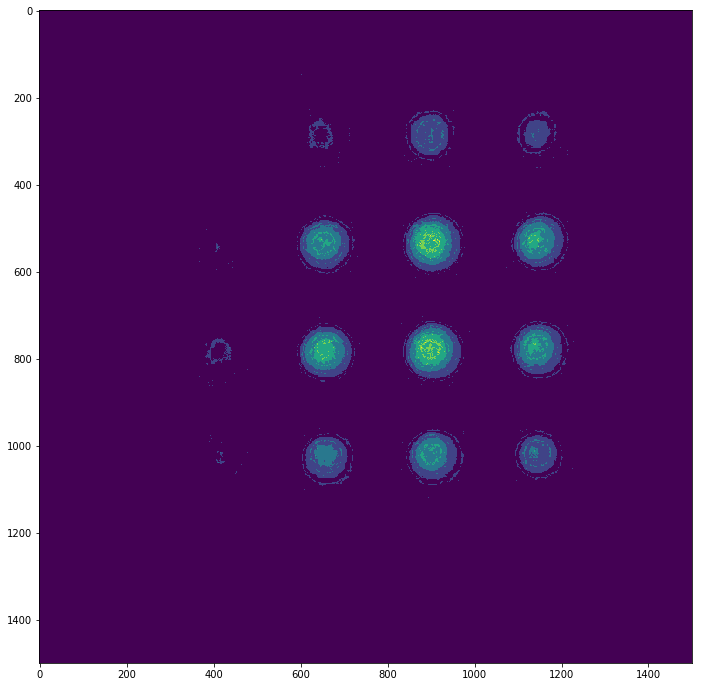

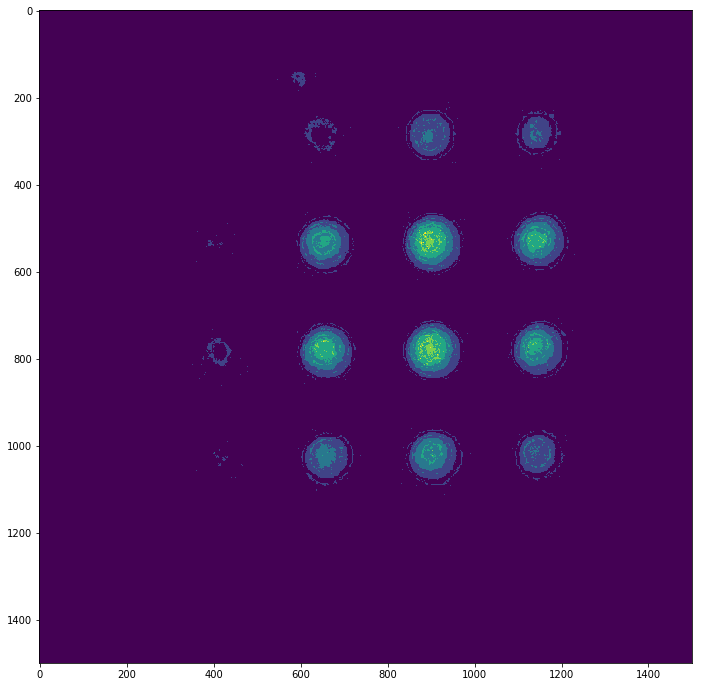

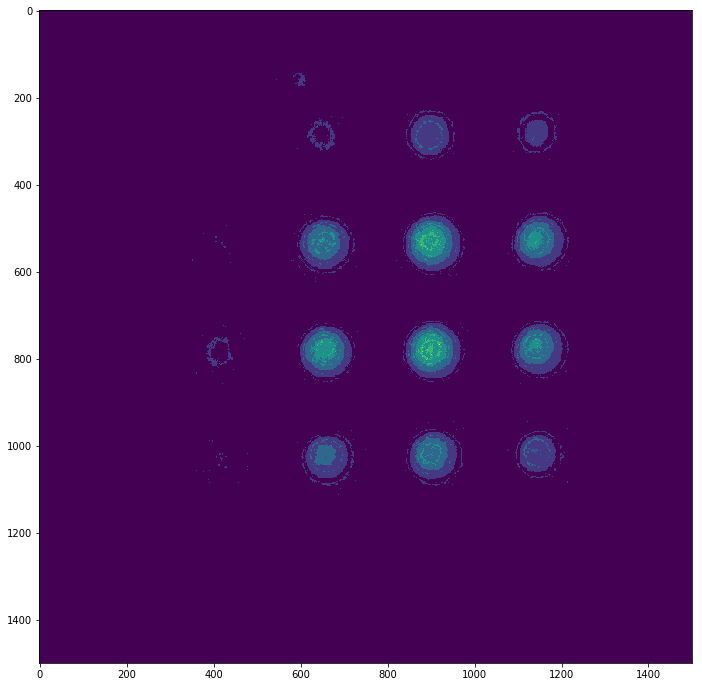

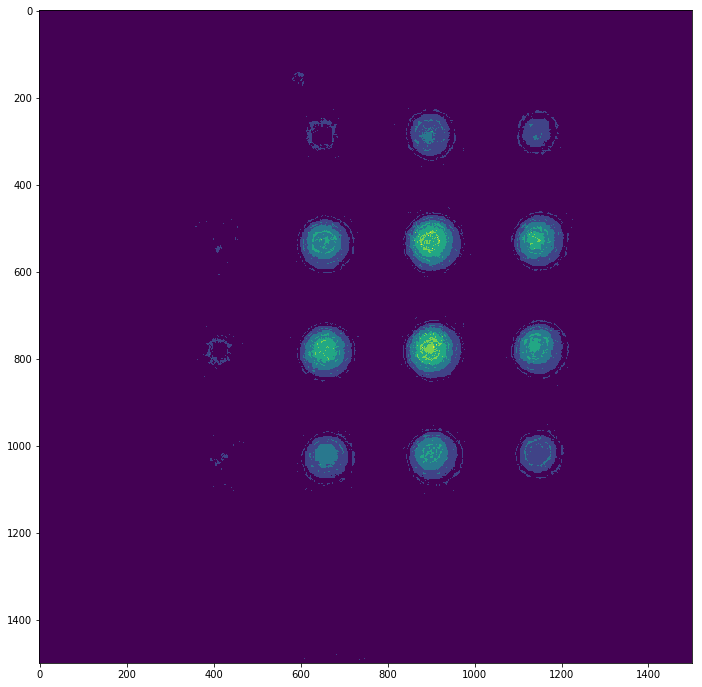

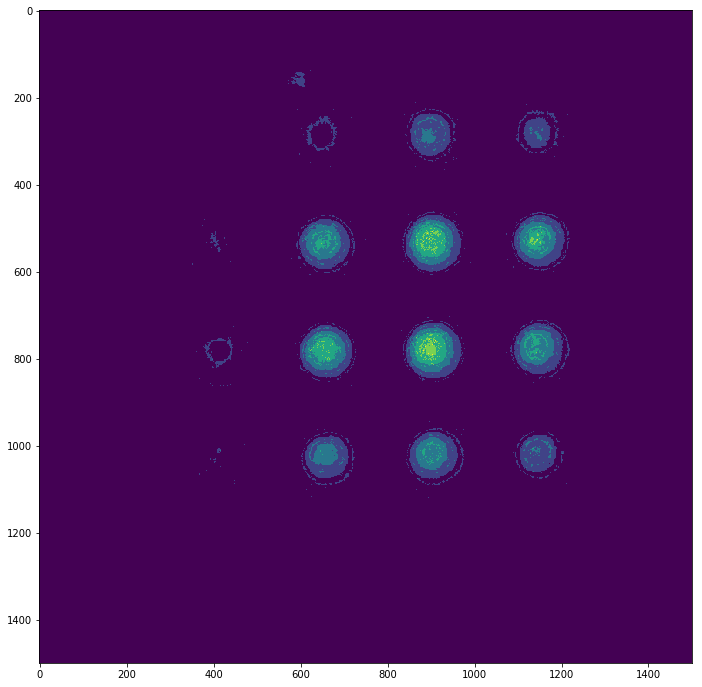

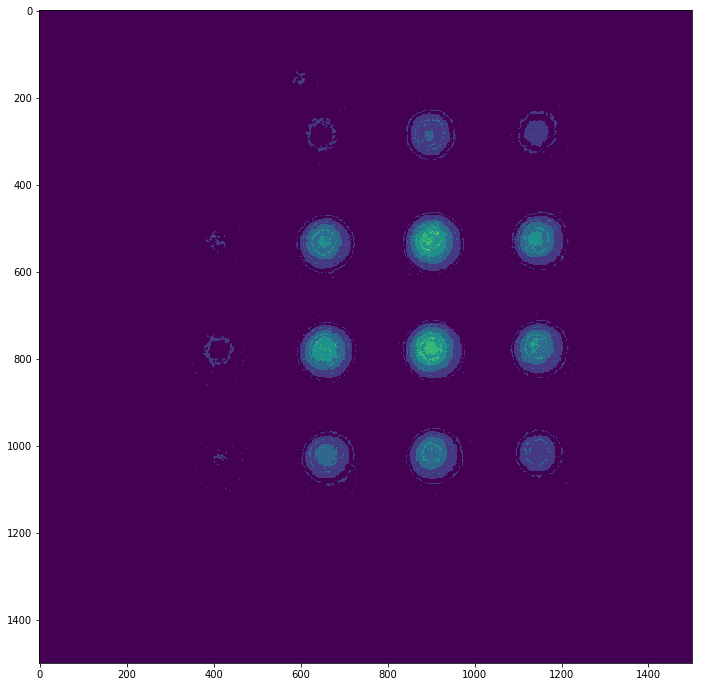

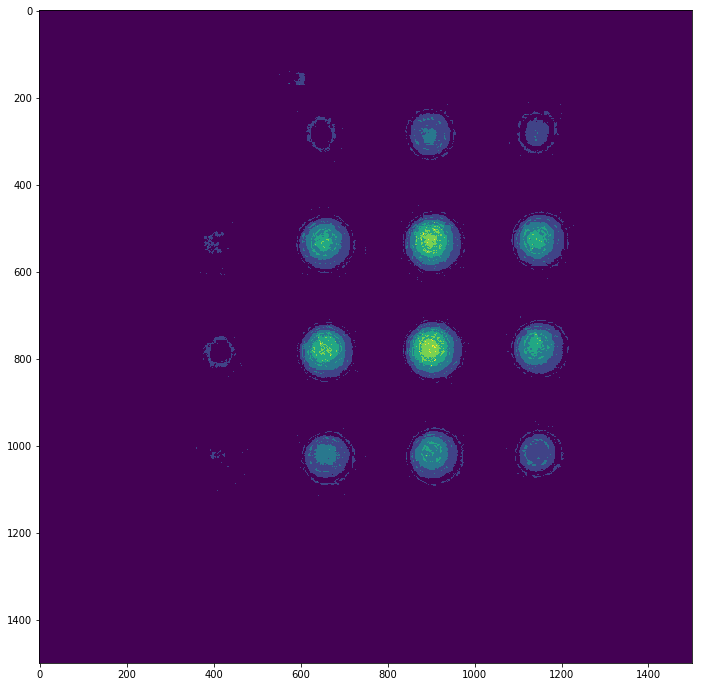

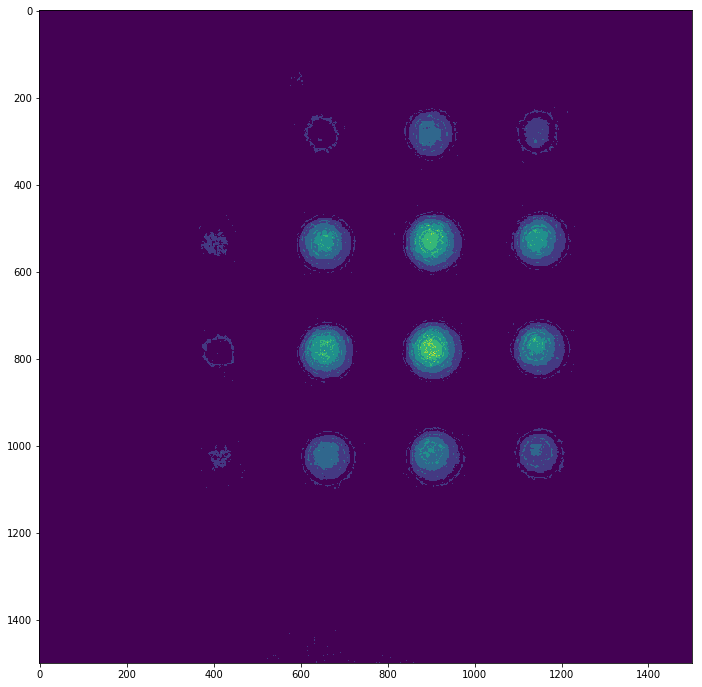

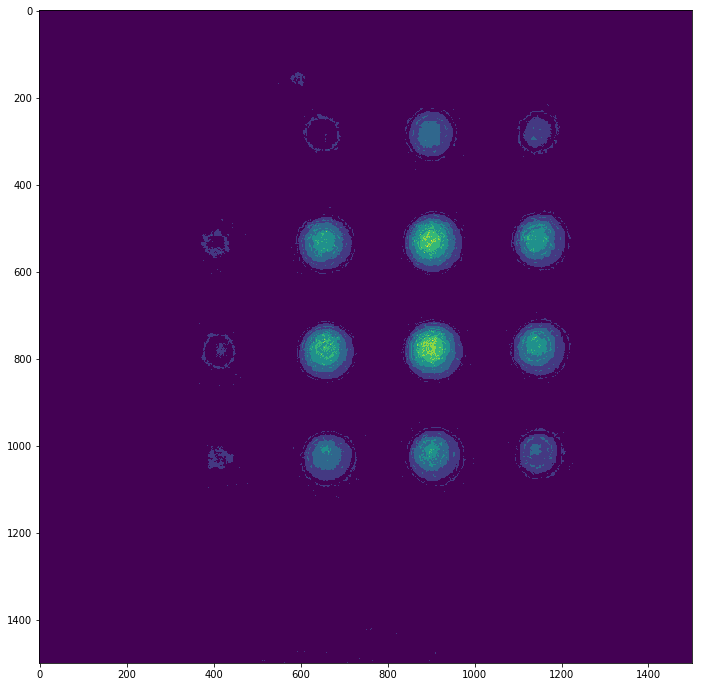

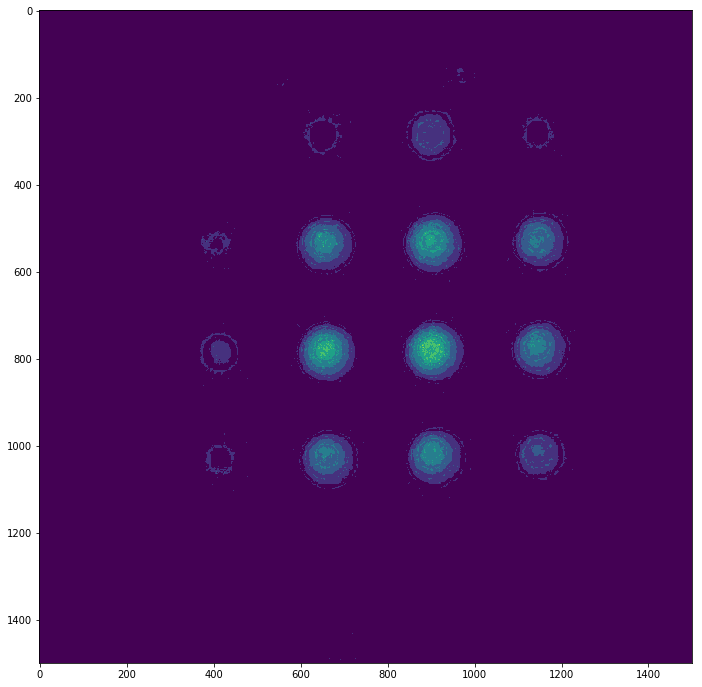

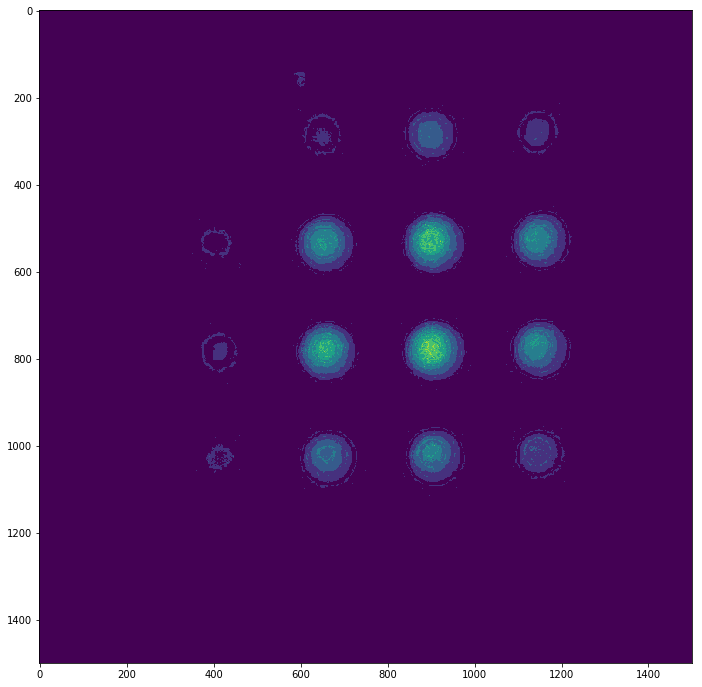

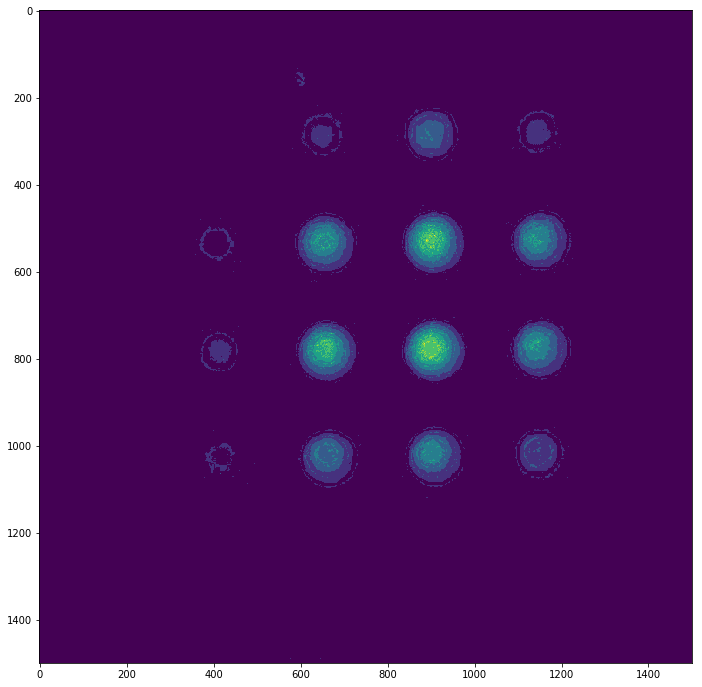

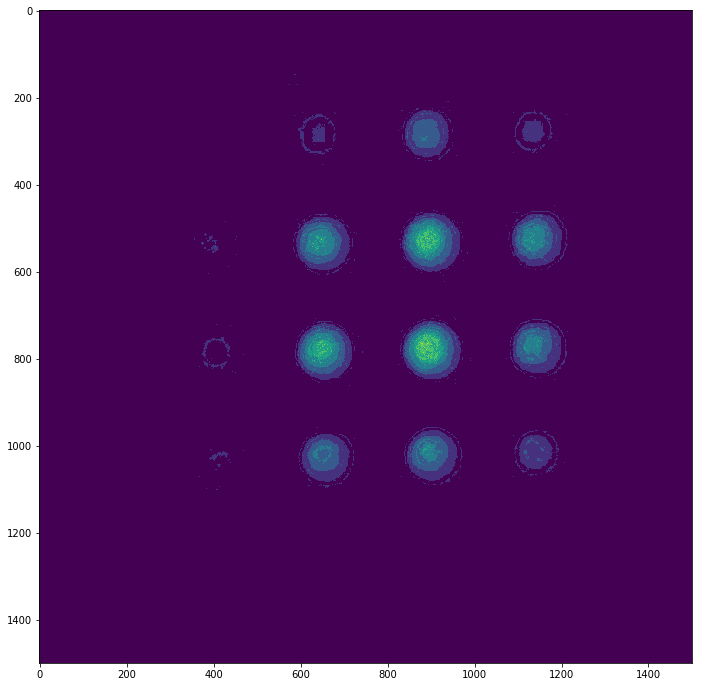

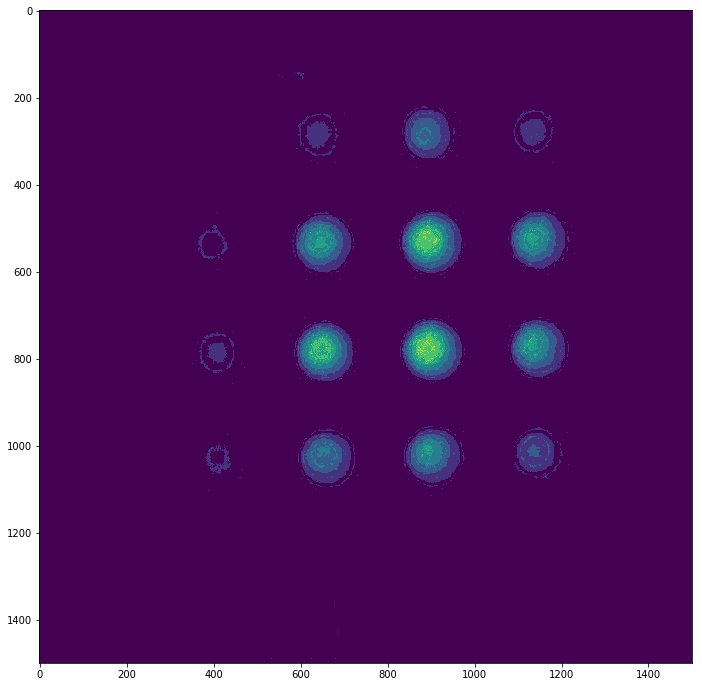

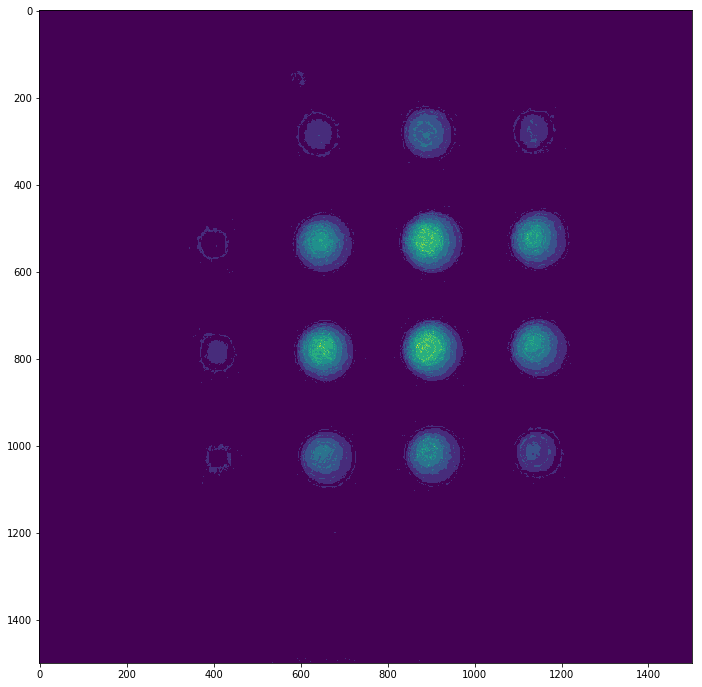

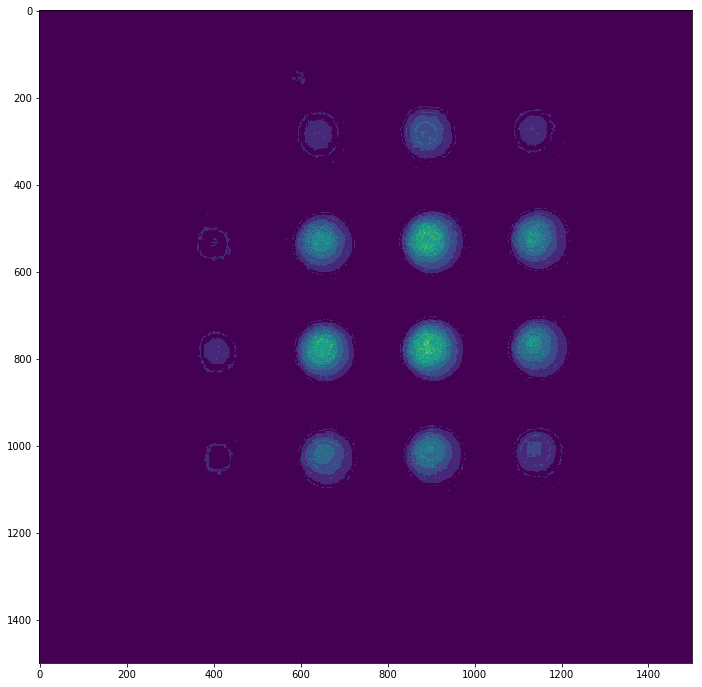

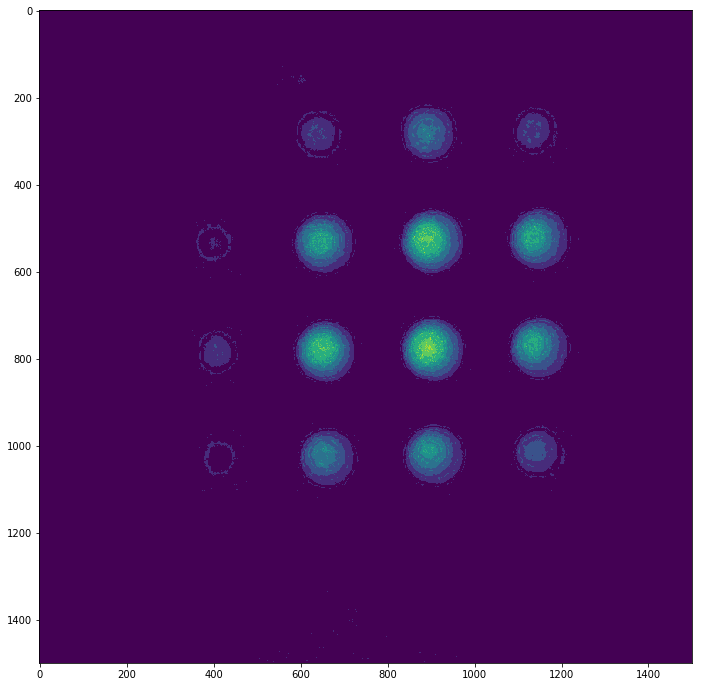

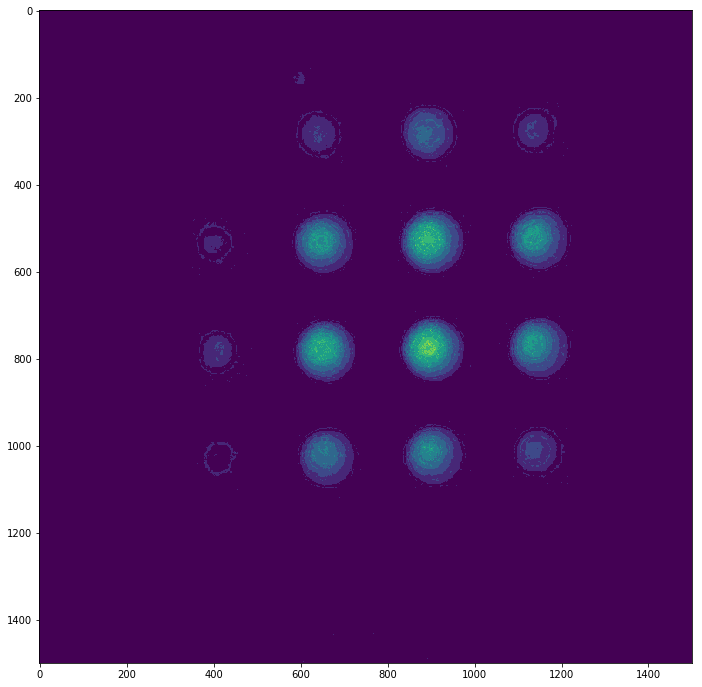

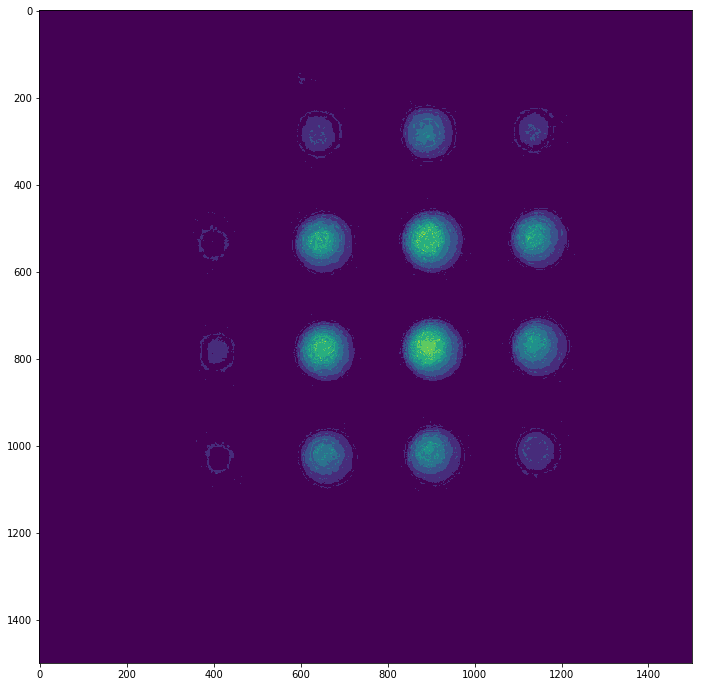

In [52]:
for t in im_dict.keys():
    for c in im_dict[t].keys():
        plt.figure(figsize=(12,12))
        plt.imshow(im_dict[t][c]['gray'])
        plt.savefig(f'cal_gray/Cal_{t}_{c}.png')

Text(0.5,1,'45th cycle - labeled')

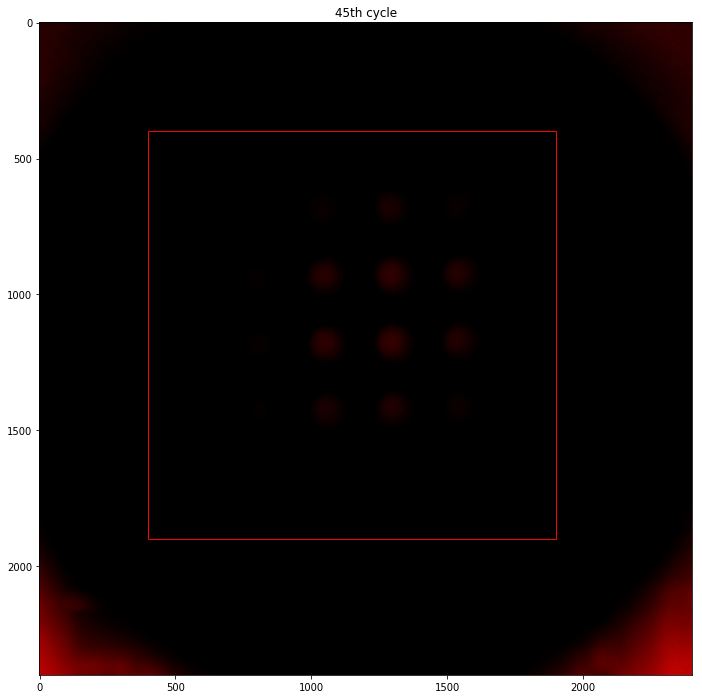

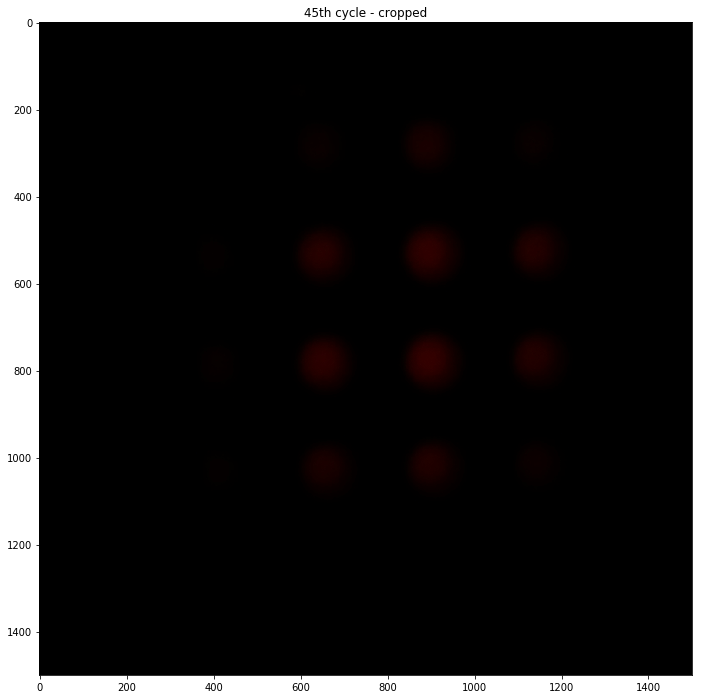

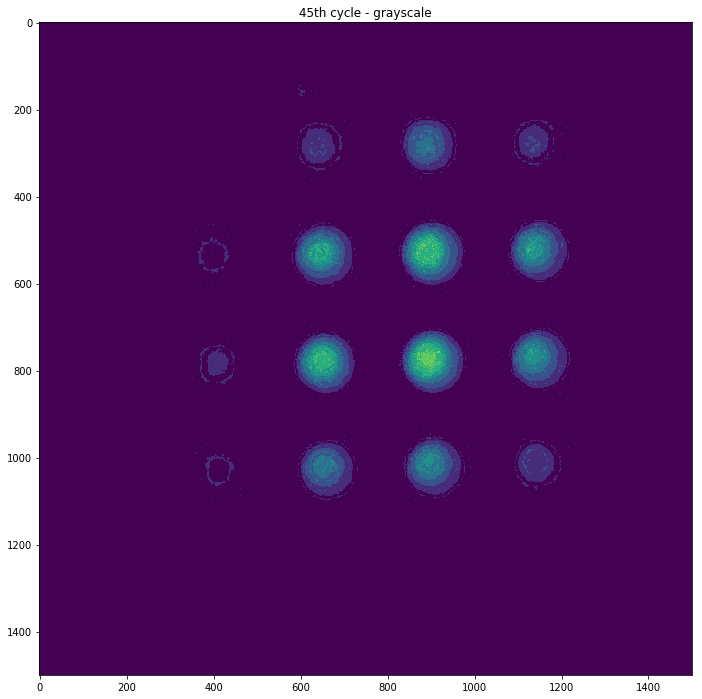

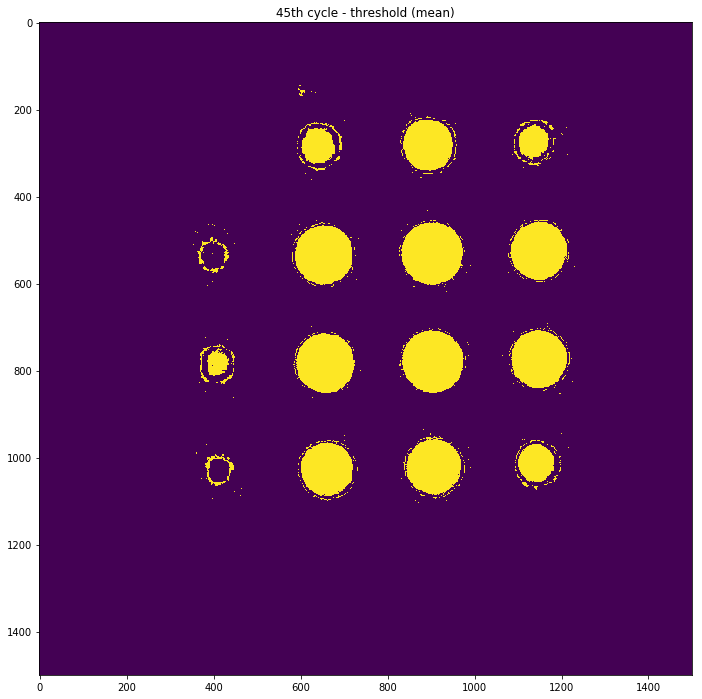

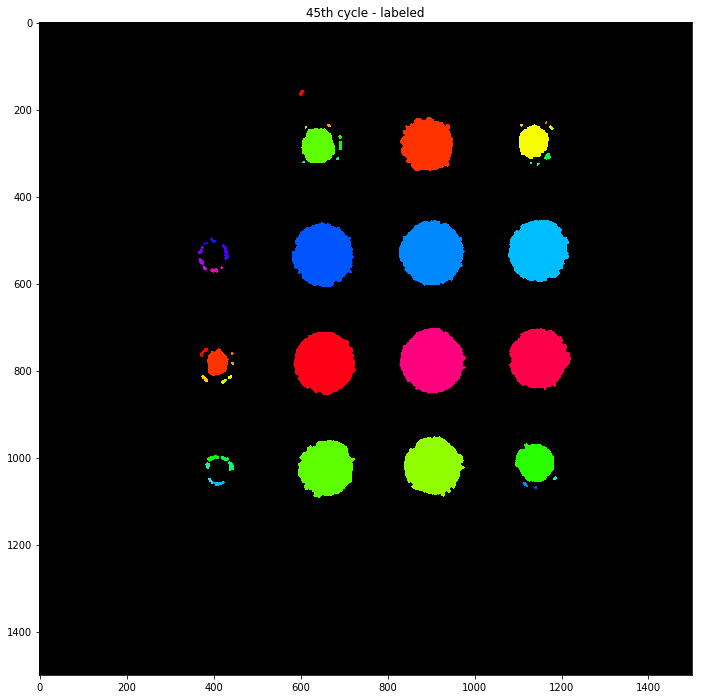

In [78]:
t = 1
c = 44

ori = im_dict[temp_li[t]][c]['original']
fig, ax = plt.subplots(1, 1, figsize=(12,12))
ax.imshow(ori)
ax.set_title('45th cycle')
rect = matplotlib.patches.Rectangle((400, 400), 1500, 1500, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.figure(figsize=(12,12))
plt.imshow(ori[x_range, y_range])
plt.title('45th cycle - cropped')

im_gray44 = im_dict[temp_li[1]][44]['gray']
plt.figure(figsize=(12,12))
plt.imshow(im_gray44)
plt.title('45th cycle - grayscale')

threshed = im_dict[temp_li[t]][c]['thresh']
plt.figure(figsize=(12,12))
plt.imshow(threshed)
plt.title('45th cycle - threshold (mean)')

im_labeled44 = im_dict[temp_li[1]][44]['labeled']
image_label_overlay44 = skimage.color.label2rgb(im_labeled44, bg_label=0, colors=colors_li)
plt.figure(figsize=(12,12))
plt.imshow(image_label_overlay44)
plt.title('45th cycle - labeled')


Text(0.5,1,'1st cycle - threshold (mean)')

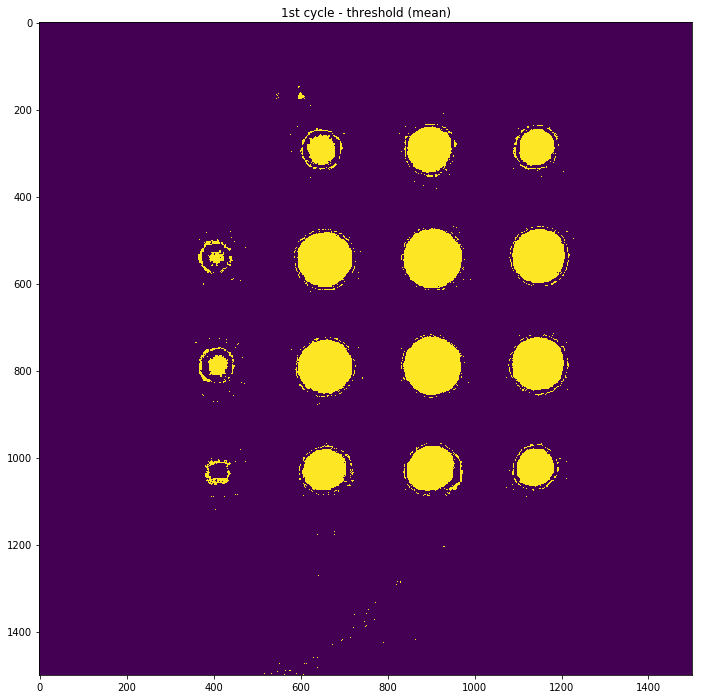

In [80]:
im_ = im_dict[temp_li[1]][0]['thresh']
plt.figure(figsize=(12,12))
plt.imshow(im_)
plt.title('1st cycle - threshold (mean)')

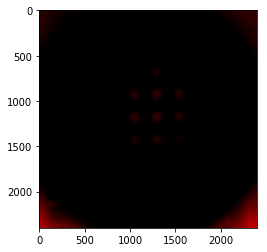

In [4]:
plt.imshow(im_li[-1])

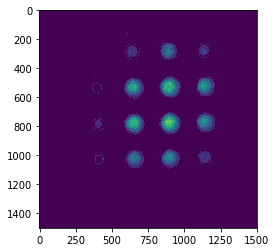

In [9]:
plt.imshow(im_gray_li[-1][x_range, y_range])

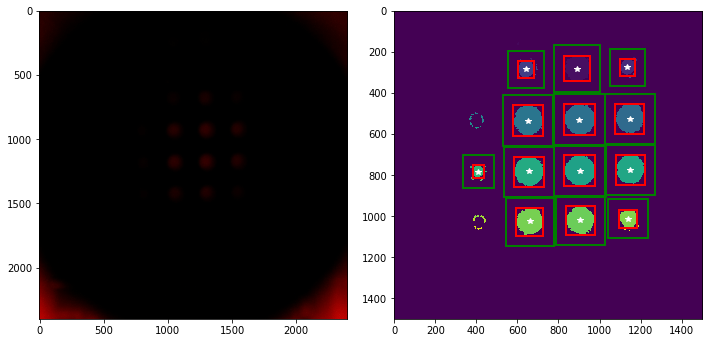

In [81]:
im_orig = im_dict[temp_li[1]][44]['original']
im_gray = im_dict[temp_li[1]][44]['gray']
im_labeled = im_dict[temp_li[1]][44]['labeled']

fig, ax = plt.subplots(1, 2, figsize=(10, 12))
ax[0].imshow(im_orig)
ax[1].imshow(im_labeled)
region_li = []
i = 0
j = 1
row = list('ABCD')
region_raw = []
for region in skimage.measure.regionprops(im_labeled, intensity_image=im_gray):
    # take regions with large enough areas
    region_raw.append(region)
    if 500 <= region.area < 30000:
        # draw rectangle around segmented coins
        region_li.append(region)
        minr, minc, maxr, maxc = region.bbox
        rect = matplotlib.patches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
        ax[1].add_patch(rect)
        rect2 = matplotlib.patches.Rectangle((minc-50, minr-50), maxc - minc+100, maxr - minr+100, fill=False, edgecolor='green', linewidth=2)
        ax[1].add_patch(rect2)
        ax[1].plot(region.centroid[1], region.centroid[0], color='white', marker='*')

plt.tight_layout()
plt.show()

Text(0.5,1,'17')

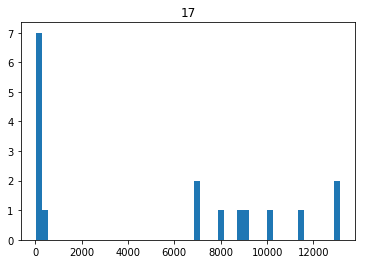

In [16]:
region_area = [region.area for region in region_raw]
plt.hist(region_area, bins=50)
plt.title(len(region_raw))

Text(0.5,1,'Min')

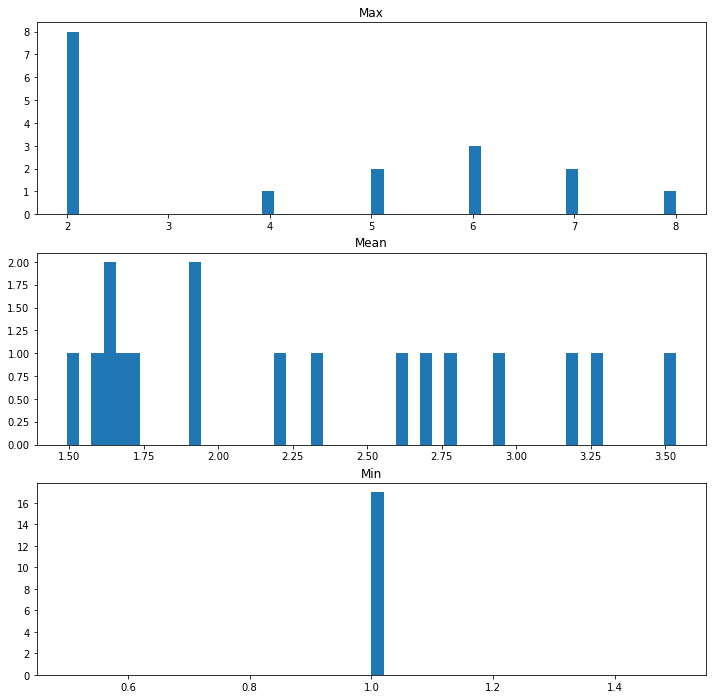

In [19]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))
region_max_intensity = [region.max_intensity for region in region_raw]
ax[0].hist(region_max_intensity, bins=50)
ax[0].set_title('Max')
region_mean_intensity  = [region.mean_intensity  for region in region_raw]
ax[1].hist(region_mean_intensity, bins=50)
ax[1].set_title('Mean')
region_min_intensity = [region.min_intensity for region in region_raw]
ax[2].hist(region_min_intensity, bins=50)
ax[2].set_title('Min')

In [27]:
well_location_key = []
for r in range(1, 5):
    for c in list('ABCD')[::-1]:
        well_location_key.append(c+str(r))
cent_li = []
for r in region_li:
    y, x = r.centroid
    cent_li.append([x//100, y//100, region_li.index(r)])
cent_li.sort()
cent_li

[[4.0, 7.0, 9],
 [6.0, 2.0, 2],
 [6.0, 5.0, 5],
 [6.0, 7.0, 8],
 [6.0, 10.0, 11],
 [8.0, 2.0, 0],
 [9.0, 5.0, 4],
 [9.0, 7.0, 6],
 [9.0, 10.0, 10],
 [11.0, 2.0, 1],
 [11.0, 5.0, 3],
 [11.0, 7.0, 7],
 [11.0, 10.0, 12]]

In [28]:
len(cent_li)

13

In [7]:
minr_li = []
minc_li = []
maxr_li = []
maxc_li = []
for r in region_li:
    minr, minc, maxr, maxc = r.bbox
    minr_li.append(minr)
    minc_li.append(minc)
    maxr_li.append(maxr)
    maxc_li.append(maxc)
minr_li.sort()
top = minr_li[0]
minc_li.sort()
left = minc_li[0]
maxr_li.sort()
bottom = maxr_li[-1]
maxc_li.sort()
right = maxc_li[-1]

well_box = [top-50, left-50, bottom+50, right+50]

In [8]:
well_box

[168, 336, 1144, 1272]

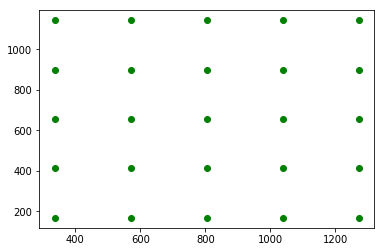

In [9]:
y_li = np.linspace(well_box[0], well_box[2], 5, endpoint=True)
x_li = np.linspace(well_box[1], well_box[3], 5, endpoint=True)
pts_x = []
pts_y = []
for x in x_li:
    for y in y_li:
        pts_x.append(x)
        pts_y.append(y)
plt.figure()
plt.scatter(pts_x, pts_y, c='g')

In [10]:
colors_li = [plt.cm.get_cmap('hsv', 30)(i) for i in range(30)]

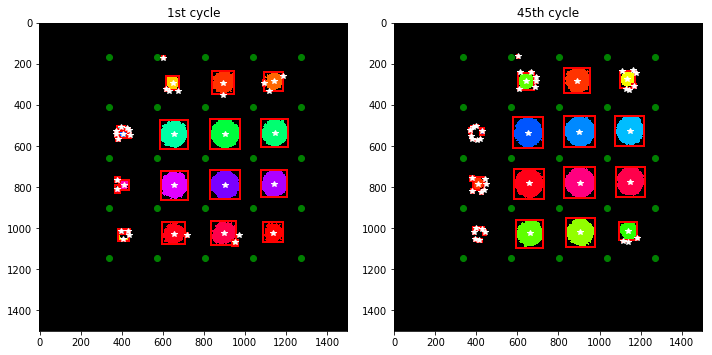

In [119]:
im_labeled0 = im_dict[temp_li[1]][0]['labeled']
im_gray0 = im_dict[temp_li[1]][44]['gray']
image_label_overlay0 = skimage.color.label2rgb(im_labeled0, bg_label=0, colors=colors_li)

im_labeled44 = im_dict[temp_li[1]][44]['labeled']
im_gray44 = im_dict[temp_li[1]][44]['gray']
image_label_overlay44 = skimage.color.label2rgb(im_labeled44, bg_label=0, colors=colors_li)

fig, ax = plt.subplots(1, 2, figsize=(10, 12))
ax[0].imshow(image_label_overlay0)
ax[0].scatter(pts_x, pts_y, c='g')
ax[1].imshow(image_label_overlay44)
ax[1].scatter(pts_x, pts_y, c='g')

for region in skimage.measure.regionprops(im_labeled0, intensity_image=im_gray0):
    minr, minc, maxr, maxc = region.bbox
    rect = matplotlib.patches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
    ax[0].add_patch(rect)
    ax[0].plot(region.centroid[1], region.centroid[0], color='white', marker='*')
    ax[0].set_title('1st cycle')

region_test = []
for region in skimage.measure.regionprops(im_labeled44, intensity_image=im_gray44):
    region_test.append(region)
    minr, minc, maxr, maxc = region.bbox
    rect = matplotlib.patches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
    ax[1].add_patch(rect)
    ax[1].plot(region.centroid[1], region.centroid[0], color='white', marker='*')
    ax[1].set_title('45th cycle')


plt.tight_layout()
plt.show()

In [11]:
pts_li = list(zip(pts_x, pts_y))
pts_li

[(336.0, 168.0),
 (336.0, 412.0),
 (336.0, 656.0),
 (336.0, 900.0),
 (336.0, 1144.0),
 (570.0, 168.0),
 (570.0, 412.0),
 (570.0, 656.0),
 (570.0, 900.0),
 (570.0, 1144.0),
 (804.0, 168.0),
 (804.0, 412.0),
 (804.0, 656.0),
 (804.0, 900.0),
 (804.0, 1144.0),
 (1038.0, 168.0),
 (1038.0, 412.0),
 (1038.0, 656.0),
 (1038.0, 900.0),
 (1038.0, 1144.0),
 (1272.0, 168.0),
 (1272.0, 412.0),
 (1272.0, 656.0),
 (1272.0, 900.0),
 (1272.0, 1144.0)]

In [12]:
well_location_dict = {}
row = list('ABCD')[::-1]
i = 0
for x in range(4):
    for y in range(4):
        key = row[y]+str(x+1)
        top_left_pt = pts_li[i+y+x]
        bottom_right_pt = pts_li[i+y+x+6]
        well_location_dict[key] = [top_left_pt[1], top_left_pt[0], bottom_right_pt[1], bottom_right_pt[0]]
    i += 4
    
well_location_dict

{'D1': [168.0, 336.0, 412.0, 570.0],
 'C1': [412.0, 336.0, 656.0, 570.0],
 'B1': [656.0, 336.0, 900.0, 570.0],
 'A1': [900.0, 336.0, 1144.0, 570.0],
 'D2': [168.0, 570.0, 412.0, 804.0],
 'C2': [412.0, 570.0, 656.0, 804.0],
 'B2': [656.0, 570.0, 900.0, 804.0],
 'A2': [900.0, 570.0, 1144.0, 804.0],
 'D3': [168.0, 804.0, 412.0, 1038.0],
 'C3': [412.0, 804.0, 656.0, 1038.0],
 'B3': [656.0, 804.0, 900.0, 1038.0],
 'A3': [900.0, 804.0, 1144.0, 1038.0],
 'D4': [168.0, 1038.0, 412.0, 1272.0],
 'C4': [412.0, 1038.0, 656.0, 1272.0],
 'B4': [656.0, 1038.0, 900.0, 1272.0],
 'A4': [900.0, 1038.0, 1144.0, 1272.0]}

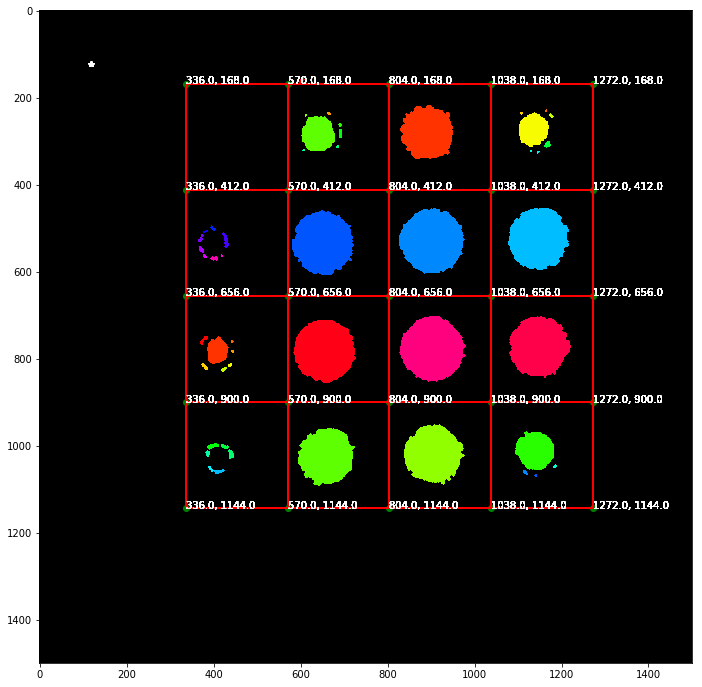

In [118]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(pts_x, pts_y, c='g')
for x in pts_x:
    for y in pts_y:
        plt.text(x, y, f'{x}, {y}', color='w')
ax.imshow(image_label_overlay44)
for well in well_location_dict.keys():
    minr, minc, maxr, maxc = well_location_dict[well]
    rect = matplotlib.patches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    ax.plot((maxc - minc)/2, (maxr - minr)/2, color='white', marker='*')


In [16]:
def get_well_loc(x, y):
    for well in well_location_dict.keys():
        y_min, x_min, y_max, x_max = well_location_dict[well]
        if y_min < y < y_max and x_min < x < x_max:
            return well

In [17]:
for c in range(45):
    for t in range(2):
        im_labeled = im_dict[temp_li[t]][c]['labeled']
        im_gray = im_dict[temp_li[t]][c]['gray']
        region_raw_dict = {}
        for region in skimage.measure.regionprops(im_labeled, intensity_image=im_gray):
            region_raw_dict[region.area] = region
        im_dict[temp_li[t]][c]['regions'] = region_raw_dict

In [80]:
for c in range(45):
    print(c//9, c%9)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8


mean of intensity

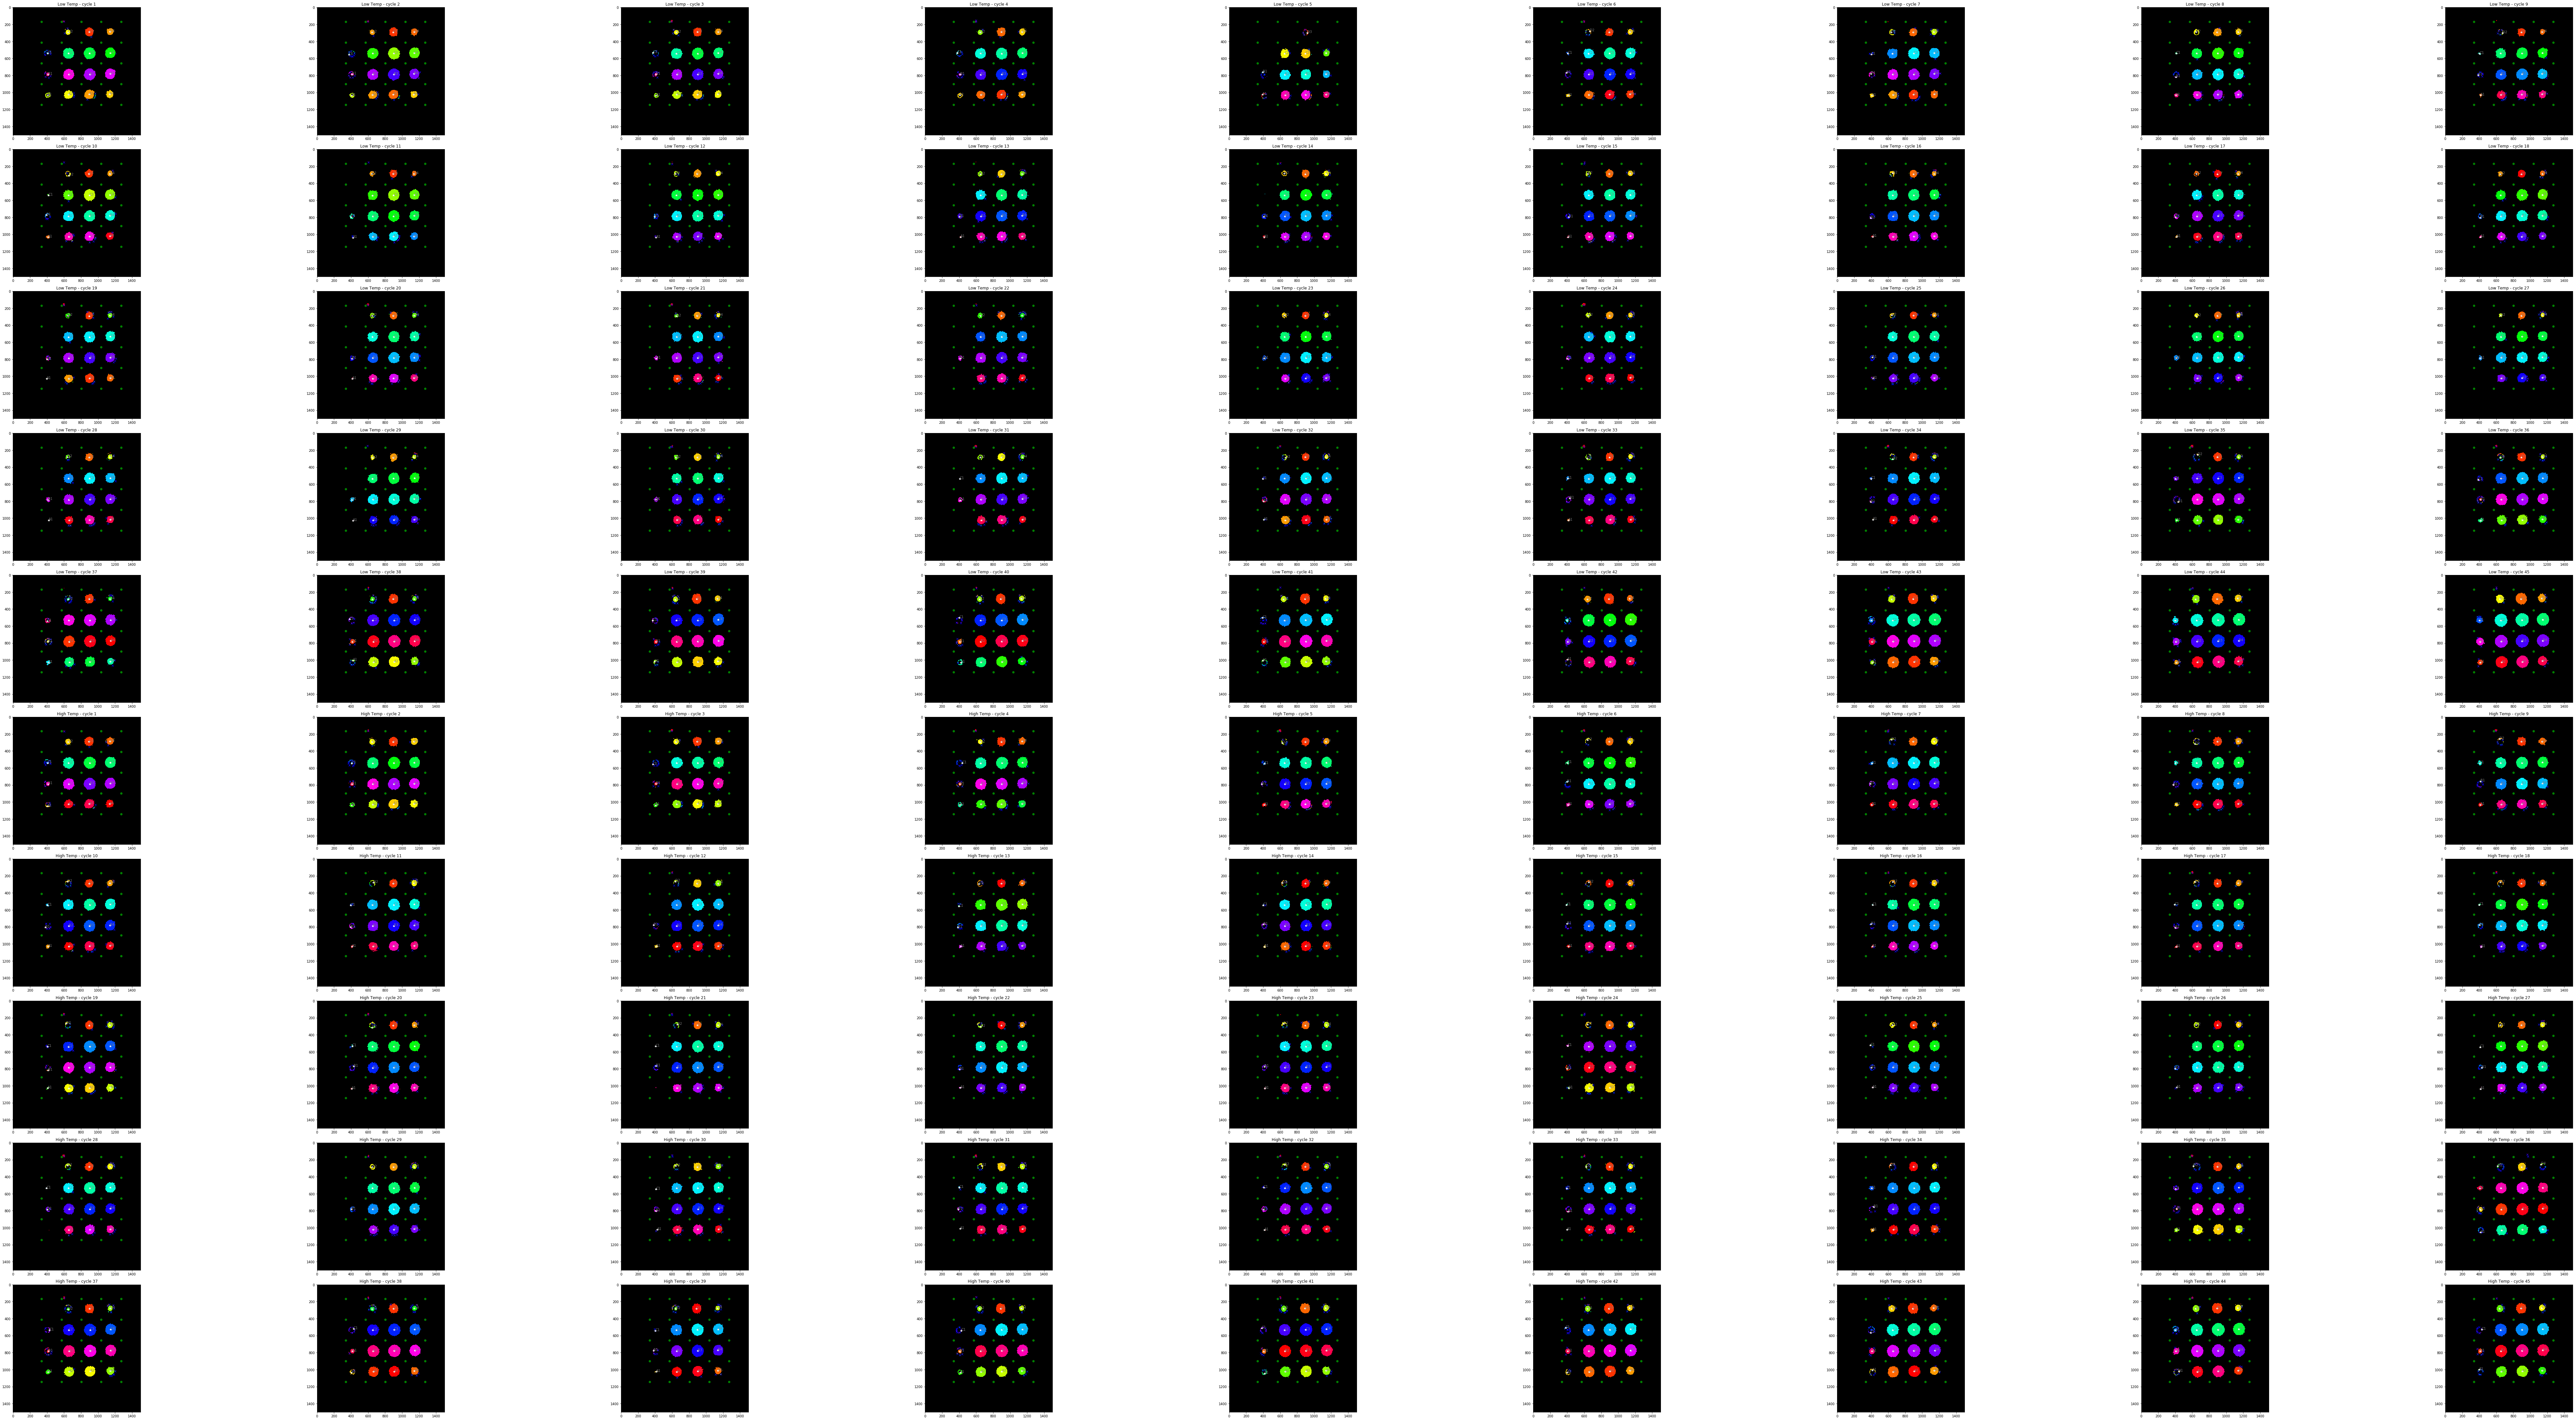

In [105]:
fig, ax = plt.subplots(10, 9, figsize=(24*5, 12*5))
region_intensity_dict = {}
for t in range(2):
    region_intensity_dict[temp_li[t]] = {}
    for well in well_location_dict.keys():
        region_intensity_dict[temp_li[t]][well] = [0]*45
        
    for c in range(45):
        im_labeled = im_dict[temp_li[t]][c]['labeled']
        im_gray = im_dict[temp_li[t]][c]['gray']
        image_label_overlay = skimage.color.label2rgb(im_labeled, bg_label=0, colors=colors_li)
        ax_x_coord = c//9+(t*5)
        ax_y_coord = c%9
        
        ax[ax_x_coord, ax_y_coord].imshow(image_label_overlay)
        ax[ax_x_coord, ax_y_coord].set_title(f'{temp_li[t]} - cycle {c+1}')
        ax[ax_x_coord, ax_y_coord].scatter(pts_x, pts_y, c='g')
        
        sorted_region_key = list(im_dict[temp_li[t]][c]['regions'].keys())
        sorted_region_key.sort(reverse=True)
        
        well_recorded_li = []
        for key in sorted_region_key:
            region_obj = im_dict[temp_li[t]][c]['regions'][key]
            y, x = region_obj.centroid
            well = get_well_loc(x, y)
            if well is not None and well not in well_recorded_li:
                well_recorded_li.append(well)
                region_intensity_dict[temp_li[t]][well][c] = region_obj.mean_intensity
                ax[ax_x_coord, ax_y_coord].plot(x, y, color='white', marker='*')
                ax[ax_x_coord, ax_y_coord].text(x, y, well, color='gray')
            else:
                ax[ax_x_coord, ax_y_coord].plot(x, y, color='b', marker='x')

plt.tight_layout()
plt.savefig('test1.png')
plt.show()

In [106]:
df_cal_low = pd.DataFrame(region_intensity_dict['Low Temp'])
df_cal_low.index = range(1, 46)
df_cal_low = df_cal_low.reindex(sorted(df_cal_low.columns), axis=1)
df_cal_low

A1        A2        A3        A4        B1        B2        B3  \
1   0.713807  1.361756  1.578953  1.112535  0.945783  1.822809  2.047719   
2   0.828177  1.329535  1.573740  1.061336  0.742734  1.774251  1.966725   
3   0.738712  1.335922  1.576481  1.046075  0.832734  1.811107  2.023357   
4   0.799503  1.371673  1.522422  1.109162  0.947368  1.763058  1.909657   
5   0.806324  1.427082  1.546226  1.061342  0.780059  1.635500  1.673517   
6   0.732769  1.338416  1.595052  1.243551  0.923848  1.702611  1.868166   
7   0.809964  1.329380  1.529294  1.232844  0.844143  1.675885  1.912067   
8   0.833902  1.374607  1.521455  1.197649  0.948905  1.730225  1.914855   
9   0.778256  1.324066  1.517475  1.118904  0.782904  1.694533  1.836224   
10  0.850148  1.304342  1.451652  1.162951  0.809584  1.663278  1.878946   
11  0.786458  1.305556  1.476993  1.135127  0.822343  1.667053  1.842762   
12  0.795918  1.276744  1.460694  1.069126  0.708640  1.680440  1.852919   
13  0.832653  1.265006  1.414033  1.065328  0.785990  1.609111  1.838477   
14  0.792526  1.273423  1.439802  1.102943  0.822430  1.662090  1.844602   
15  0.776316  1.251871  1.381987  1.039589  0.698529  1.636921  1.853911   
16  0.742173  1.245809  1.408180  1.047126  0.814985  1.662072  1.828181   
17  0.807339  1.295669  1.407089  1.084731  0.736737  1.634237  1.788362   
18  0.848728  1.217886  1.444014  1.112612  0.738095  1.603497  1.797379   
19  0.960784  1.182512  1.454790  1.057143  0.837931  1.576900  1.793469   
20  0.787234  1.200134  1.430532  1.018948  0.768107  1.612685  1.762528   
21  0.000000  1.135292  1.338001  1.058678  0.766687  1.557823  1.686337   
22  0.000000  1.138636  1.409028  1.056899  0.805373  1.547205  1.782692   
23  0.000000  1.162381  1.386095  1.008598  0.781448  1.558478  1.760933   
24  0.000000  1.207930  1.390852  1.051259  0.776851  1.547870  1.812644   
25  0.812680  1.220281  1.376774  1.035228  0.770478  1.554861  1.789075   
26  0.000000  1.200405  1.395153  1.049115  0.736910  1.567687  1.804850   
27  0.000000  1.150239  1.341995  1.052466  0.769326  1.516499  1.785031   
28  0.836735  1.193677  1.418983  1.042158  0.740717  1.578421  1.753766   
29  0.891892  1.171610  1.408267  1.049734  0.768262  1.554884  1.763044   
30  0.000000  1.164000  1.353166  1.054364  0.801712  1.620892  1.809394   
31  0.000000  1.151691  1.392022  1.088790  0.781013  1.597166  1.834258   
32  0.770115  1.218958  1.365467  1.059062  0.814002  1.674817  1.855739   
33  0.720488  1.237244  1.359375  1.050420  0.849530  1.698662  1.948245   
34  0.772277  1.280805  1.447379  1.036608  0.767442  1.768086  2.006375   
35  0.829408  1.340258  1.476100  1.002638  0.569231  1.859104  2.139909   
36  0.767891  1.365137  1.543549  1.029740  0.845484  1.980184  2.288686   
37  0.732152  1.334899  1.442493  1.091381  0.838275  1.946338  2.172053   
38  0.669880  1.480745  1.627593  1.012007  0.931139  2.239861  2.594289   
39  0.807651  1.543096  1.761971  1.188300  0.963489  2.374819  2.714030   
40  0.719231  1.609857  1.793078  1.139714  0.916802  2.512037  2.815603   
41  0.854617  1.668408  1.878159  1.187445  1.042433  2.662516  2.945554   
42  0.855705  1.730483  2.010022  1.227644  1.062196  2.772531  3.139310   
43  0.946111  1.821776  2.128749  1.237147  1.061808  2.941497  3.225680   
44  0.964807  1.921187  2.221104  1.276769  1.025713  3.122008  3.428720   
45  0.961075  1.967119  2.361914  1.381066  1.073700  3.222937  3.579912   

          B4        C1        C2        C3        C4  D1        D2        D3  \
1   1.615506  0.637712  1.750435  2.053815  1.725157   0  0.979484  1.397891   
2   1.630313  0.860360  1.704072  1.991558  1.657821   0  0.974249  1.361840   
3   1.603396  0.937330  1.693172  2.002463  1.652204   0  0.955038  1.359148   
4   1.545593  0.841463  1.684716  1.948582  1.621360   0  0.967622  1.317810   
5   1.083849  0.000000  1.266774  1.449700  1.062025   0  0.000000  0.764200   
6   1.606767  0.674699  1.530252 

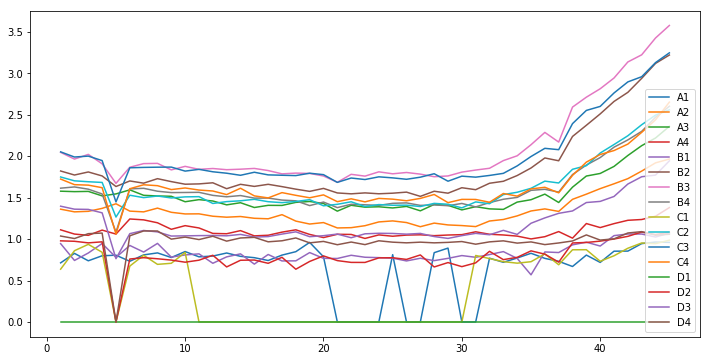

In [113]:
df_cal_low.plot(figsize=(12, 6))

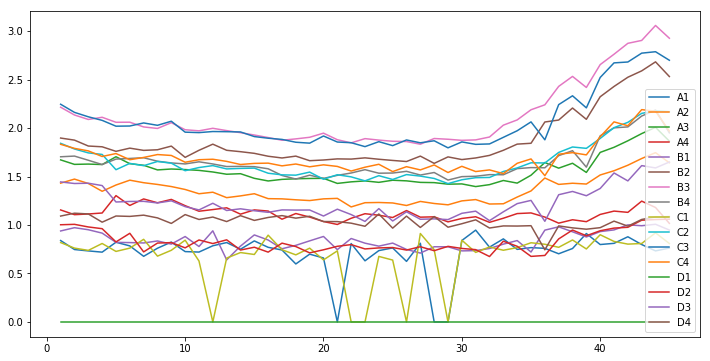

In [114]:
df_cal_high = pd.DataFrame(region_intensity_dict['High Temp'])
df_cal_high.index = range(1, 46)
df_cal_high = df_cal_high.reindex(sorted(df_cal_high.columns), axis=1)
df_cal_high.plot(figsize=(12, 6))

sum of intensity

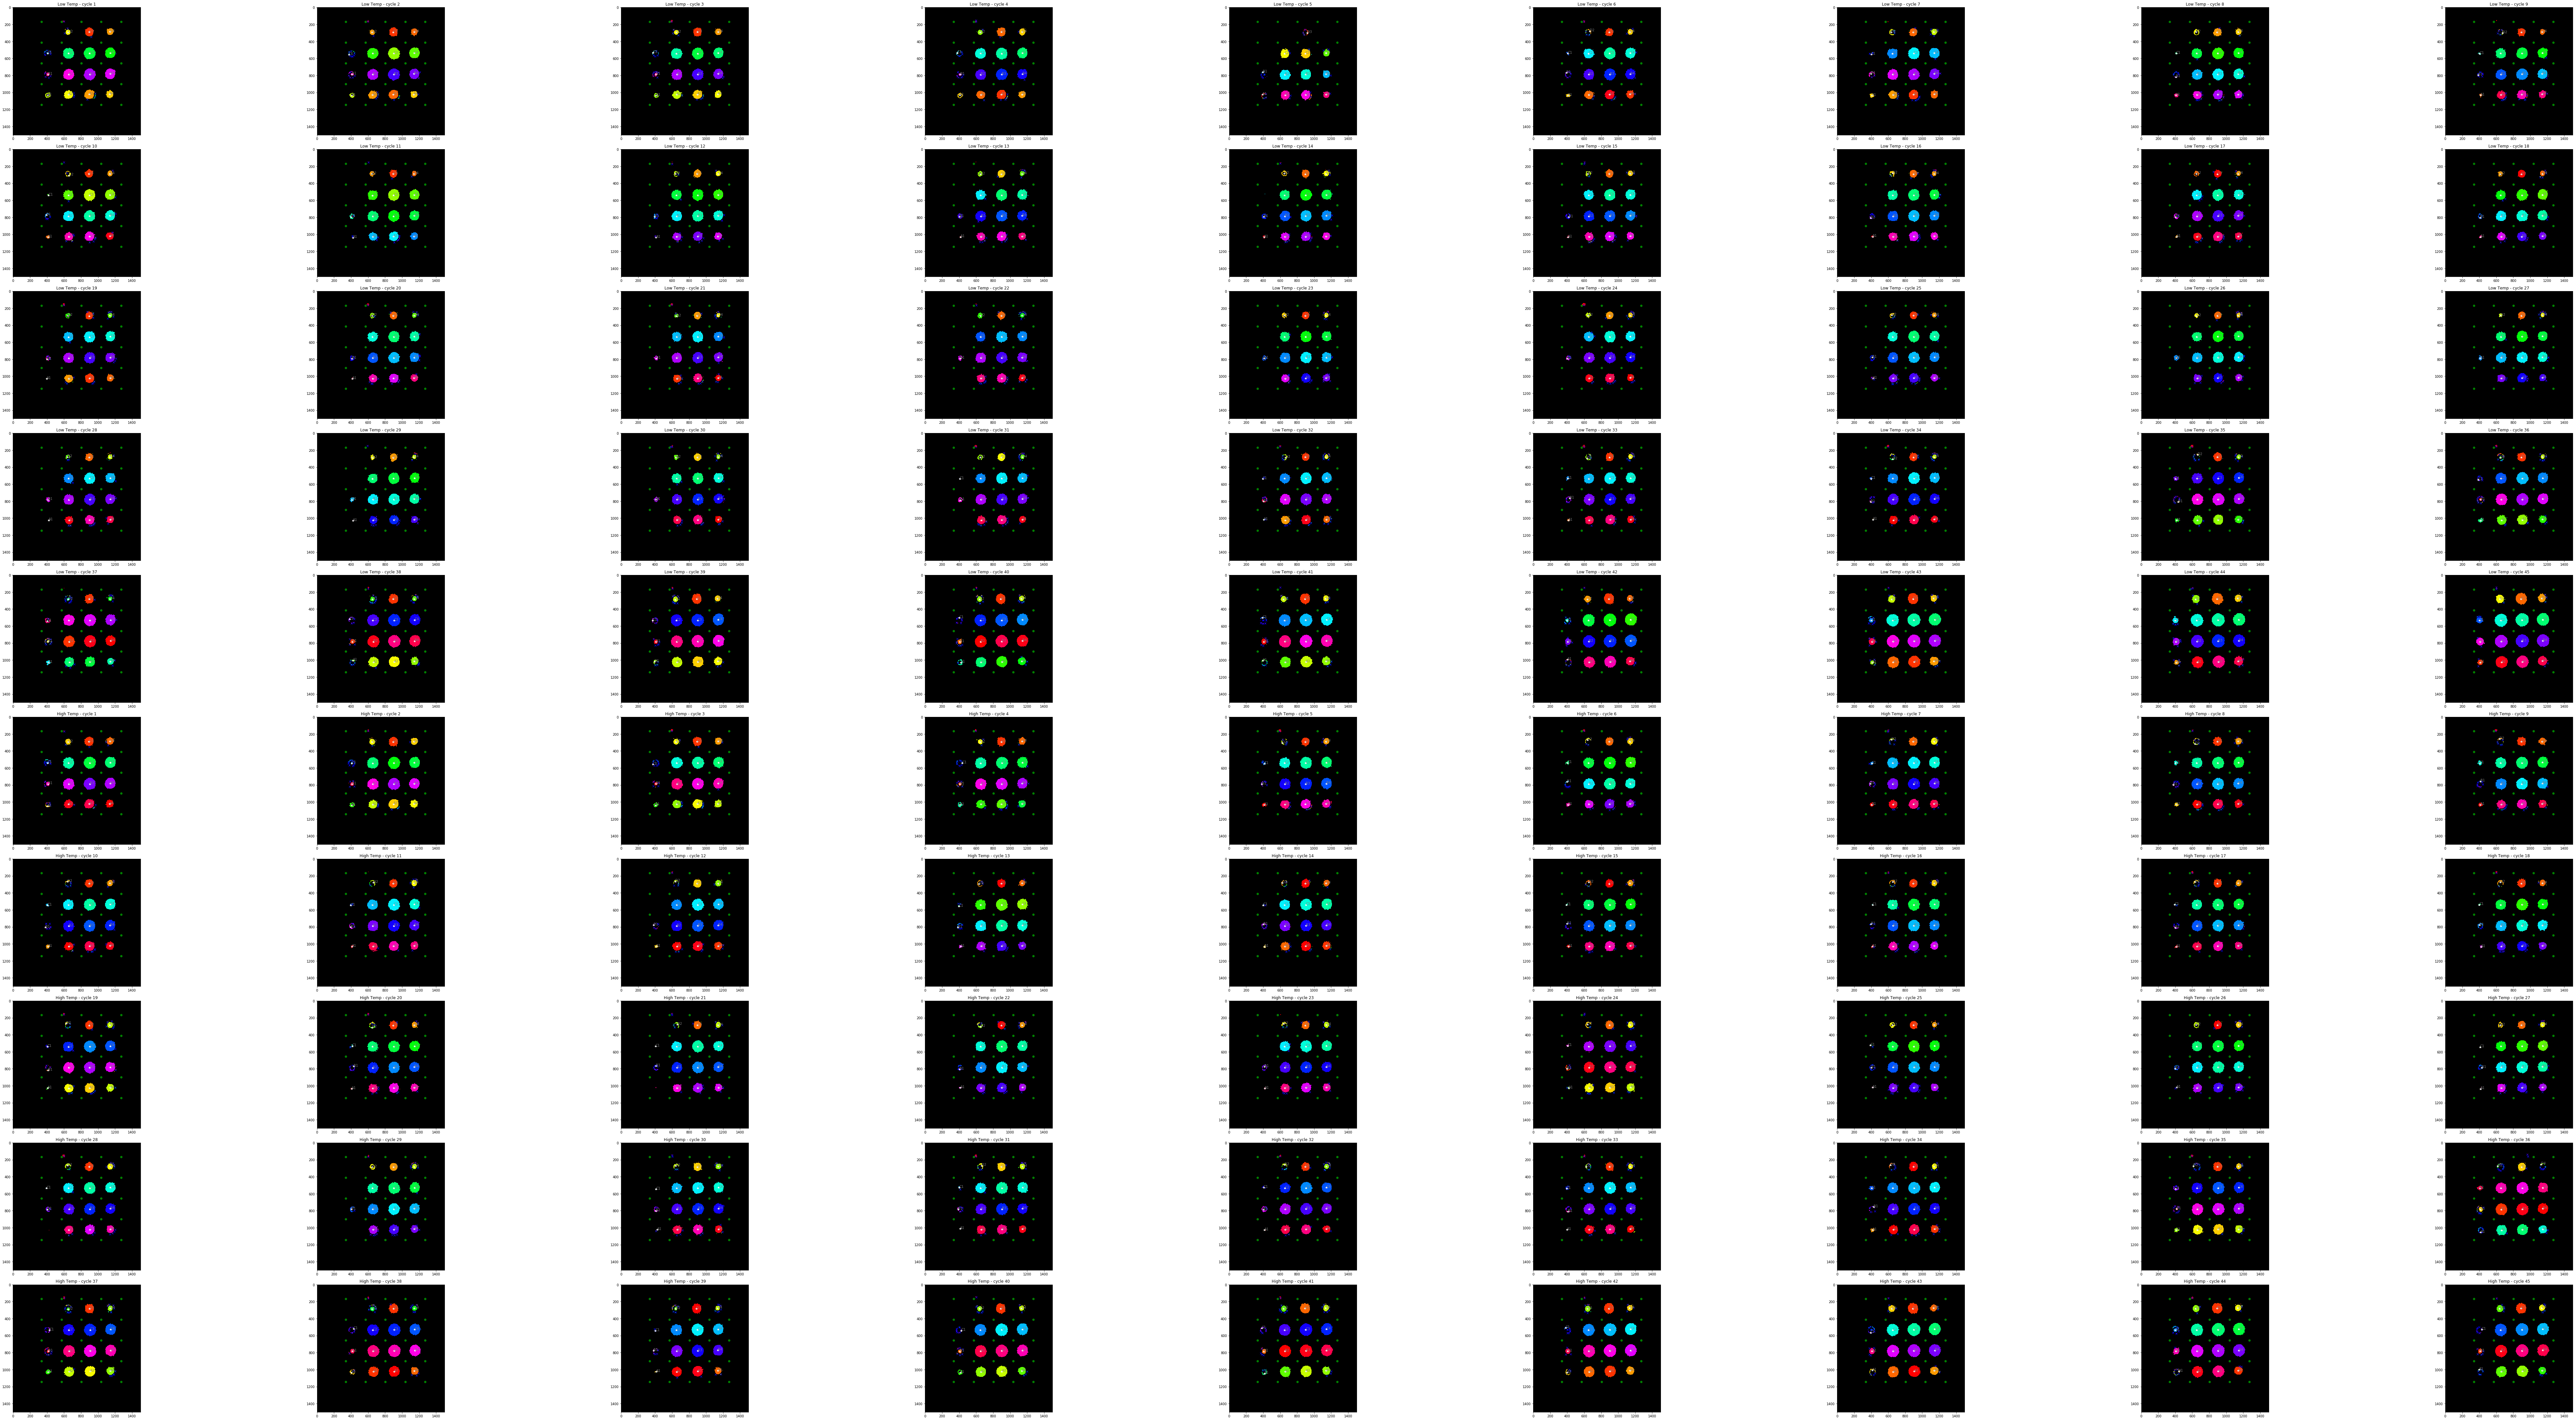

In [82]:
fig, ax = plt.subplots(10, 9, figsize=(24*5, 12*5))
region_sum_dict = {}
for t in range(2):
    region_sum_dict[temp_li[t]] = {}
    for well in well_location_dict.keys():
        region_sum_dict[temp_li[t]][well] = [0]*45
        
    for c in range(45):
        im_labeled = im_dict[temp_li[t]][c]['labeled']
        im_gray = im_dict[temp_li[t]][c]['gray']
        image_label_overlay = skimage.color.label2rgb(im_labeled, bg_label=0, colors=colors_li)
        ax_x_coord = c//9+(t*5)
        ax_y_coord = c%9
        
        ax[ax_x_coord, ax_y_coord].imshow(image_label_overlay)
        ax[ax_x_coord, ax_y_coord].set_title(f'{temp_li[t]} - cycle {c+1}')
        ax[ax_x_coord, ax_y_coord].scatter(pts_x, pts_y, c='g')
        
        sorted_region_key = list(im_dict[temp_li[t]][c]['regions'].keys())
        sorted_region_key.sort(reverse=True)
        
        well_recorded_li = []
        for key in sorted_region_key:
            region_obj = im_dict[temp_li[t]][c]['regions'][key]
            y, x = region_obj.centroid
            well = get_well_loc(x, y)
            if well is not None and well not in well_recorded_li:
                well_recorded_li.append(well)
                region_sum_dict[temp_li[t]][well][c] = region_obj.intensity_image.sum()
                ax[ax_x_coord, ax_y_coord].plot(x, y, color='white', marker='*')
                ax[ax_x_coord, ax_y_coord].text(x, y, well, color='gray')
            else:
                ax[ax_x_coord, ax_y_coord].plot(x, y, color='b', marker='x')

plt.tight_layout()
plt.savefig('mean_sum_cal.png')
plt.show()

In [120]:
area_li = list(im_dict[temp_li[0]][5]['regions'].keys())
area_li

[436,
 6820,
 38,
 646,
 3329,
 29,
 434,
 43,
 141,
 180,
 14424,
 11919,
 11057,
 76,
 664,
 14670,
 11792,
 12445,
 499,
 57,
 130,
 129,
 50,
 196,
 78,
 9863,
 6939,
 8197,
 140,
 1654,
 128,
 345,
 149,
 36]

In [122]:
region_by_well = {}
for region in im_dict[temp_li[0]][5]['regions'].values():
    y, x = region.centroid
    well = get_well_loc(x, y)
    if well is None:
        continue
    if well not in region_by_well.keys():
        region_by_well[well] = [region]
    else:
        _li = region_by_well[well]
        _li.append(region)
    

In [123]:
region_by_well

{'D3': [<skimage.measure._regionprops._RegionProperties at 0x22fba287128>],
 'D4': [<skimage.measure._regionprops._RegionProperties at 0x22fba287358>,
 'D2': [<skimage.measure._regionprops._RegionProperties at 0x22fba287390>,
 'A3': [<skimage.measure._regionprops._RegionProperties at 0x22fba287b00>,
 'C3': [<skimage.measure._regionprops._RegionProperties at 0x22fba2875c0>],
 'C4': [<skimage.measure._regionprops._RegionProperties at 0x22fba2875f8>,
 'C2': [<skimage.measure._regionprops._RegionProperties at 0x22fba287630>],
 'C1': [<skimage.measure._regionprops._RegionProperties at 0x22fba2876d8>],
 'B3': [<skimage.measure._regionprops._RegionProperties at 0x22fba287710>],
 'B4': [<skimage.measure._regionprops._RegionProperties at 0x22fba287748>,
 'B2': [<skimage.measure._regionprops._RegionProperties at 0x22fba287780>],
 'B1': [<skimage.measure._regionprops._RegionProperties at 0x22fba2877b8>,
 'A4': [<skimage.measure._regionprops._RegionProperties at 0x22fba2879b0>,
 'A2': [<skimage.me

In [125]:
obj_b1 = region_by_well['B1']
area_li = []
for region in obj_b1:
    area_li.append(region.area)
area_li

[499, 57, 130, 129, 50, 196]

In [83]:
df_cal_low = pd.DataFrame(region_sum_dict['Low Temp'])
df_cal_low.index = range(1, 46)
df_cal_low = df_cal_low.reindex(sorted(df_cal_low.columns), axis=1)
df_cal_low

A1     A2     A3     A4    B1     B2     B3     B4    C1     C2     C3  \
1   1277  11259  15859   6683  1256  23383  30253  19441   301  23118  30875   
2   1499  10385  15078   5814   690  22973  29434  18566   191  22809  30433   
3   1227  10495  14532   5903   926  22992  28414  17849   344  22294  29270   
4   1288  10566  14836   6259   702  21906  27310  17289   414  21219  28233   
5    408  13005  14584   4810   266  19276  19950   6825     0  11026  14007   
6   1212  10971  15732   8629   461  21189  27406  18947   448  16920  26852   
7   1577  10312  15270   8228   872  20605  26572  18771   149  16960  27127   
8   1466  10491  15353   8253   390  20671  26695  18516   304  17421  27241   
9    723  10239  14545   6860   577  20675  26359  17066   343  17009  26466   
10  1146   9973  14457   7408   642  19961  25238  17304   241  16471  25868   
11   302   9917  14541   7216  1060  20163  25701  16820     0  16410  26124   
12   195   9536  14363   6666   771  19562  25070  16264     0  15877  25218   
13   204   9547  14228   6474  1223  19887  25018  16286     0  15501  24899   
14   615   9650  13956   7007  1496  19611  24690  16747     0  15886  25611   
15   295   9702  13871   6381   855  19481  24581  16145     0  15522  25090   
16   403   9959  14117   6577   533  19777  25132  16166     0  15701  25179   
17   528   9483  14092   6401  1111  19704  24987  15997     0  15476  24637   
18   634   9206  13799   7084   744  18615  24687  16306     0  14909  24845   
19    49   8682  13499   5735   486  18527  24332  14168     0  15036  24307   
20   222   8935  13550   6023  1262  18841  23988  14531     0  15339  24395   
21     0   7804  11658   4276  1252  17485  22290  13060     0  14097  22184   
22     0   8246  13297   5814  1349  18404  24061  15070     0  14841  23568   
23     0   8182  13477   5865  1112  18429  23998  15063     0  14361  22990   
24     0   8226  13106   5763   745  18819  24458  15416     0  14665  24709   
25   282   9290  13776   6230   903  18408  24106  15334     0  14758  23822   
26     0   8308  13240   5810  1703  17718  23593  14823     0  14191  23367   
27     0   8192  13169   5697  1244  17831  23682  14857     0  14064  23464   
28    41   8684  13530   6007  1177  18316  23981  15480     0  14541  23863   
29    66   8295  13287   5720  1525  18273  24025  14971     0  14238  23357   
30     0   8439  13077   5605  1124  18543  24539  14878     0  14444  23261   
31     0   8549  13330   5604  1341  19725  25122  15121    57  15065  24268   
32   134   9503  13428   5487   779  20617  26435  15296   284  15804  24772   
33   531   9893  14007   5875   542  21962  28195  16651   828  16999  26166   
34    78  10249  13918   5635   231  23291  29899  17132   573  17940  27534   
35  1303  12581  16367   6461   111  25862  33389  19491  1413  20026  30072   
36  1631  13564  17669   6371   777  28580  35866  20254   443  22564  32695   
37  1364  13361  16016   5255   622  27348  33669  18193   991  22526  32097   
38   278  16765  20869   6827  2461  34794  42702  24811   570  27344  38929   
39   760  17903  22777   8816  1900  36064  43970  27754   424  28311  42094   
40  1122  19109  24038   7978  2259  38713  46449  29131   269  30578  44250   
41   435  21404  26899   9458  3513  42121  50313  31832   530  33246  47359   
42   255  23519  29682   9912  4372  45500  54106  34319  1126  35920  50521   
43  1703  26403  33002  10684  5085  49173  57730  37003  2120  38966  53593   
44  2248  28228  35973  11745  5824  53992  62485  40158  3401  42075  57118   
45  3111  30451  38152  13290  7022  56627  66615  43836  4203  44931  61041   

       C4  D1    D2     D3    D4  
1   20902   0  2769  11534  5306  
2   20804   0  2951  11784  5326  
3   19268   0  2379  11232  4845  
4   19432   0  2600  11262  5105  
5    5034   0     0    444     0  
6   19176   0   491   7273  3464  
7   19686   0  1013   7737  4480  
8   19480   0  1701   8004  4428  
9   18199 

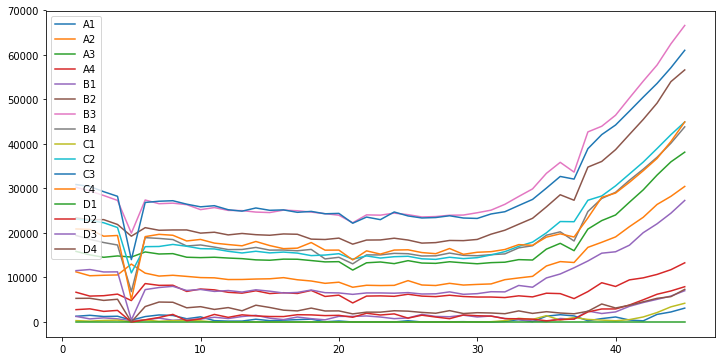

In [84]:
df_cal_low.plot(figsize=(12, 6))

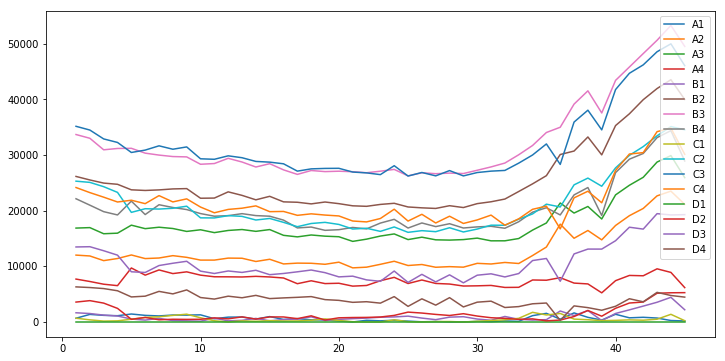

In [85]:
df_cal_high = pd.DataFrame(region_sum_dict['High Temp'])
df_cal_high.index = range(1, 46)
df_cal_high = df_cal_high.reindex(sorted(df_cal_high.columns), axis=1)
df_cal_high.plot(figsize=(12, 6))

비교 그래프

In [86]:
dict_before = pd.read_excel('F:/device/optics/32w_Realtime_test_5th/5차 1번카메라.xlsx', sheet_name=None, header=None)

In [99]:
row = list('ABCD')[::-1]
col_li = []
for y in range(4):
    for x in range(4):
        key = row[y]+str(x+1)
        col_li.append(key)
col_li

['D1',
 'D2',
 'D3',
 'D4',
 'C1',
 'C2',
 'C3',
 'C4',
 'B1',
 'B2',
 'B3',
 'B4',
 'A1',
 'A2',
 'A3',
 'A4']

In [100]:
df_before = dict_before['cal60']
df_before.columns = col_li
df_before.index = range(1, 46)
df_before

D1     D2      D3     D4     C1      C2      C3      C4     B1      B2  \
1    0  34900  103996  53308  19368  200374  262870  182390  24010  204961   
2    0  33829  105766  54389  17604  196136  260872  179857  21383  199241   
3    0  31427   99789  49857  16950  192474  251991  169140  21033  201085   
4    0  31451   98997  51970  15925  182113  243375  169794  21395  190783   
5    0   3656   16152     87   2885   97559  123831   51856  19277  167693   
6    0  17019   71048  38434   5254  150616  233972  166888  16621  183743   
7    0  14912   73124  43313   5158  150211  235735  172380  15740  179389   
8    0  14728   76465  42825   4956  153647  237110  169646  15971  181166   
9    0  15184   70046  36891   5224  150738  230167  157186  14886  179670   
10   0  13846   70954  38779   4664  145790  225280  160335  14913  174275   
11   0  12018   68541  35991   3339  145320  227160  155105  11590  174719   
12   0  13236   70135  37349   3319  141992  219801  151908  12253  172022   
13   0  11670   67345  33157   3022  138714  215550  148799  11639  171179   
14   0  14013   72594  39383   3562  141464  220977  157254  12580  170410   
15   0  13344   71152  37682   3179  139725  218400  151410  11748  168592   
16   0  12854   68784  33949   3634  139979  217275  146157  13262  173268   
17   0  13195   67549  32485   4295  138693  212056  146706  12589  171682   
18   0  12590   70356  37097   3387  133720  214787  154969  11606  163213   
19   0  12892   67046  32773   3481  134409  210769  143002  11363  162311   
20   0  12379   67688  33338   3910  135462  209327  143434  11643  163518   
21   0   9534   63260  27818   2460  125300  191817  124669   8661  153811   
22   0  12016   64177  30951   2963  131486  204107  140893  10460  160987   
23   0  12015   65088  32109   3335  127451  199847  137217  11105  161936   
24   0  10889   64439  34448   3200  131427  212434  144907  10525  163895   
25   0  12810   66245  32879   4349  130952  205376  144514  13296  161817   
26   0   9862   62794  30027   3163  124896  202295  139599  11545  155716   
27   0   8177   62348  29469   2768  124299  201265  137652   8428  155587   
28   0  11342   67413  34038   3266  128952  206637  146579   9638  160040   
29   0   9008   62917  28648   3123  124621  200971  135590   8669  160235   
30   0  11026   64524  30268   3510  127380  202107  139496  10400  162330   
31   0  12729   67196  29845   3923  134944  209270  140424  10599  171000   
32   0  14913   69413  28321   4809  139350  213773  142590  13906  179720   
33   0  17478   79462  33510   6869  149996  227788  152460  15324  190265   
34   0  17288   76783  29252   6157  157672  237588  150518  16325  202677   
35   0  21058   89195  31506  10128  173052  259351  164887  20245  225909   
36   0  24107   96551  30622  13980  192910  279210  171532  23490  247823   
37   0  24417  106873  29002  12238  193564  274919  163498  22672  237796   
38   0  34569  120469  33679  19118  236372  330331  201906  32464  299435   
39   0  37495  136266  42339  16608  245242  357960  240860  29236  308101   
40   0  38089  137073  38201  18583  261075  376919  249012  32034  329208   
41   0  43786  151777  41600  21715  282655  404664  267715  39399  359172   
42   0  51054  171503  46326  25442  306384  429603  289088  45613  391760   
43   0  60777  190960  53005  30891  329774  456183  313034  52821  421503   
44   0  69475  211953  60653  38833  356984  487744  344323  60217  460003   
45   0  79126  238345  72720  45586  381695  521758  383516  68133  486726   

        B3      B4     A1      A2      A3      A4  
1   260529  172244  12599  101795  141156   63489  
2   255464  164404  10607   94854  136755   59581  
3   245978  156256   9928   94595  131809   58219  
4   237793  154682  11974   95271  135189   62161  
5   174315   70067  13945  116797  131540   48244  
6   237630  166300   7567   99198  143050   78954  
7   233300  164975   7962   95264  140477   77044  

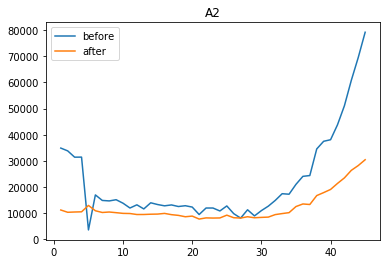

In [88]:
fig, ax = plt.subplots(1, 1)
ax.plot(df_before['A2'], label='before')
ax.plot(df_cal_low['A2'], label='after')
ax.set_title('A2')
plt.legend(loc='upper left')

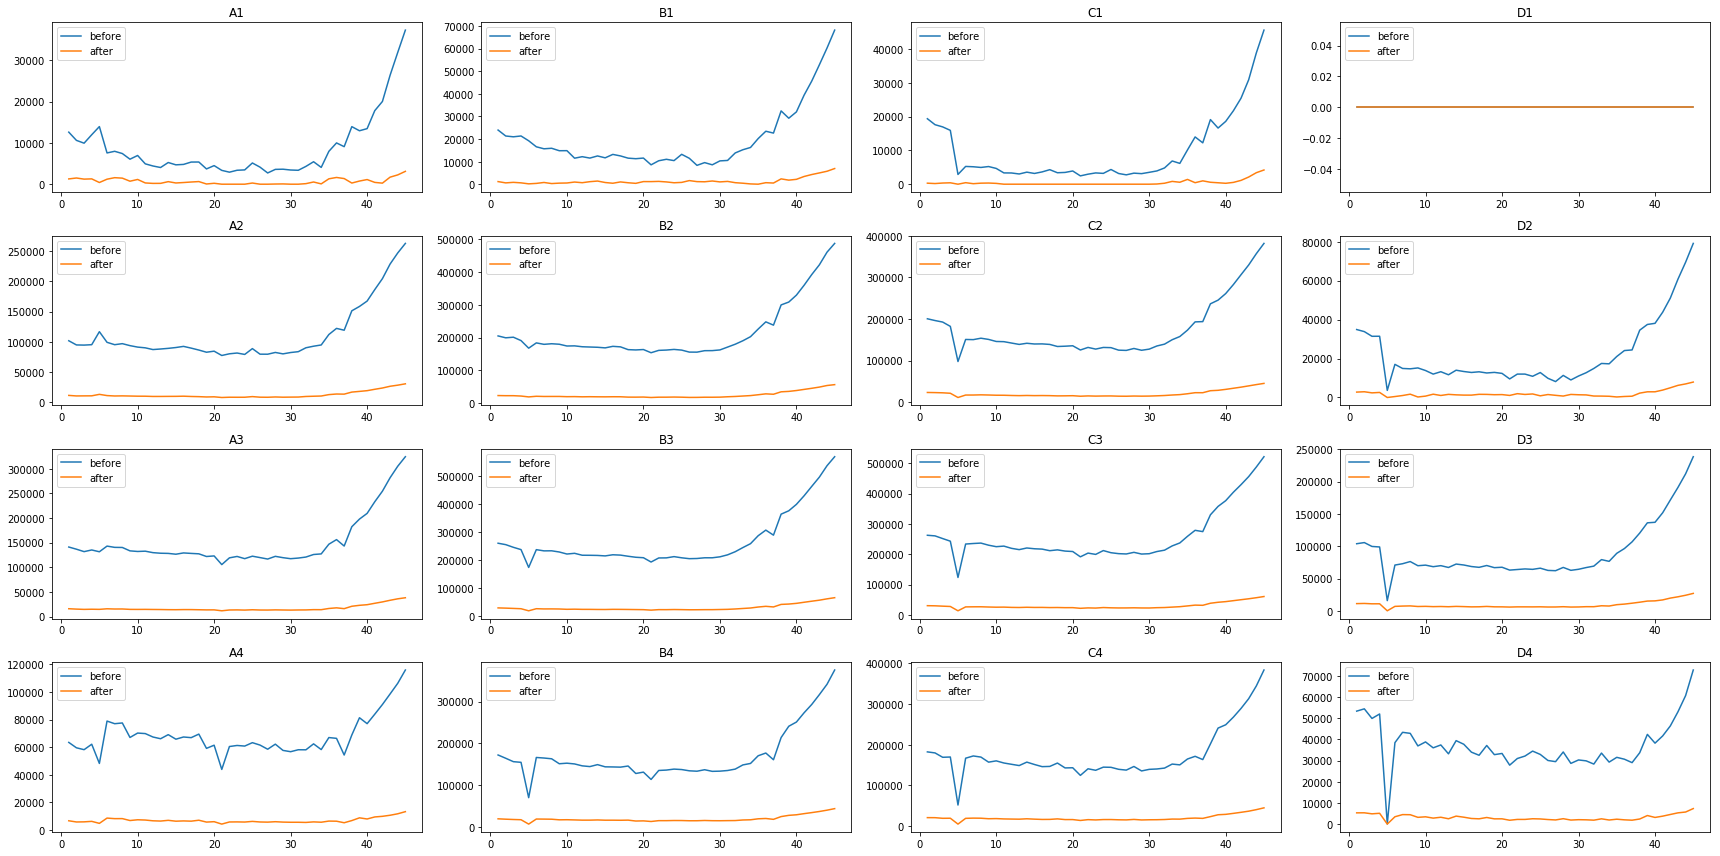

In [101]:
fig, axes = plt.subplots(4, 4, figsize=(24, 12))
n = 0
for col in df_cal_low.columns:
    i = n%4
    j = n//4
    axes[i, j].plot(df_before[col], label='before')
    axes[i, j].plot(df_cal_low[col], label='after')
    axes[i, j].set_title(col)
    n += 1
    axes[i, j].legend(loc='upper left')
plt.tight_layout()
plt.savefig('compare_low_cal.png')
plt.show()

In [115]:
df_low_norm_before = (df_before - df_before.loc[10:20].mean())/(df_before.max()-df_before.loc[10:20].mean())
df_cal_low_norm = (df_cal_low-df_cal_low.loc[10:20].mean())/(df_cal_low.max()-df_cal_low.loc[10:20].mean())

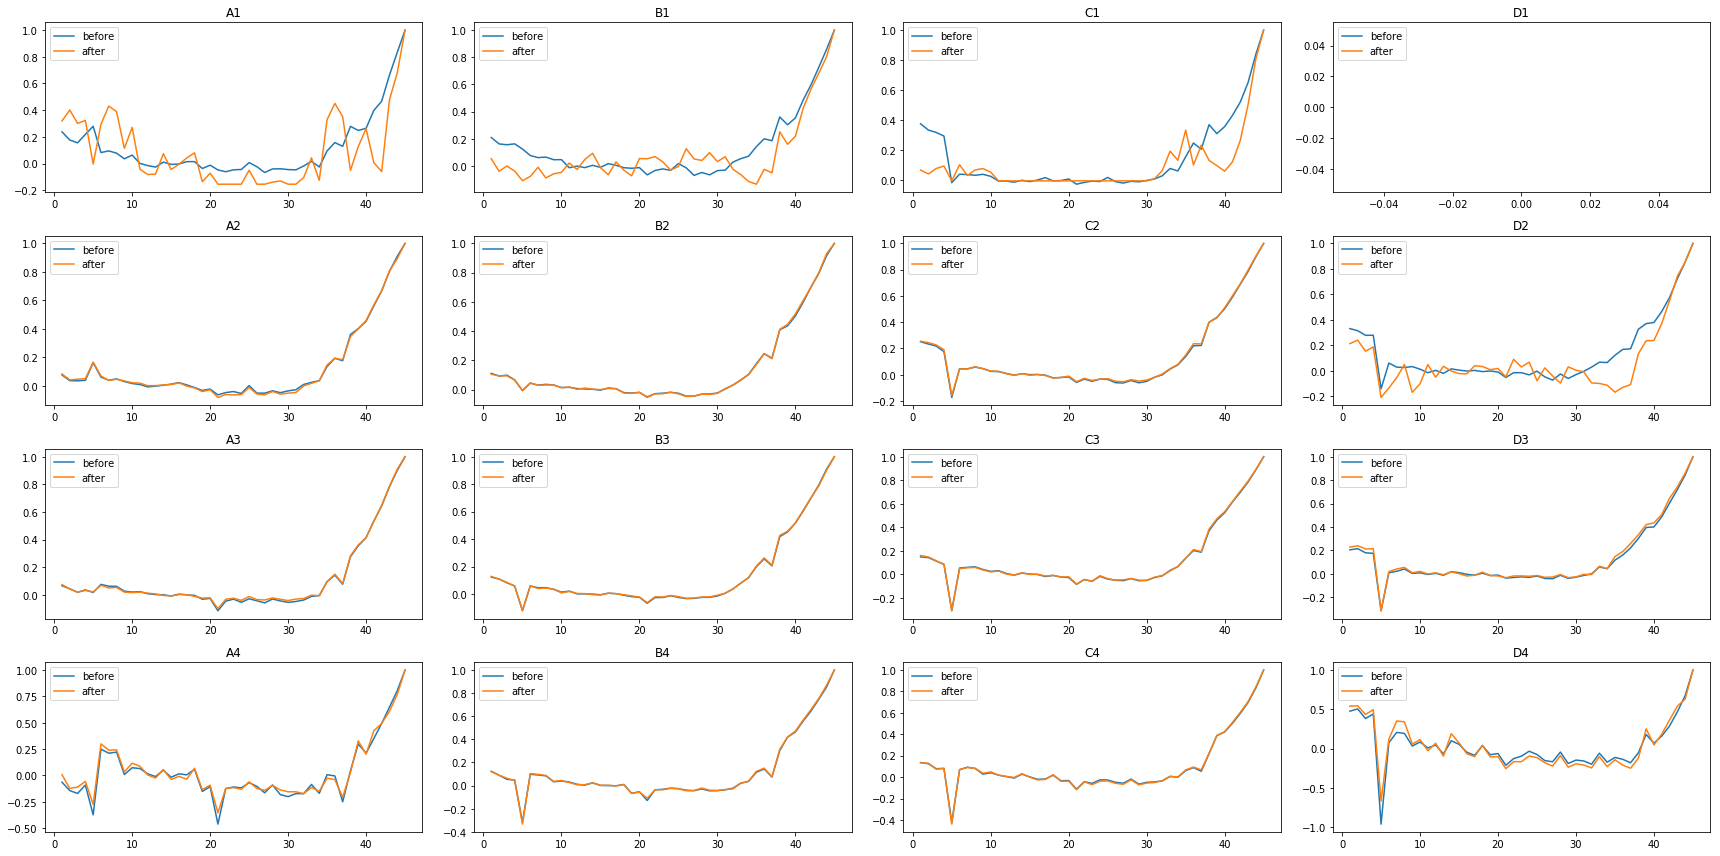

In [116]:
fig, axes = plt.subplots(4, 4, figsize=(24, 12))
n = 0
for col in df_cal_low.columns:
    i = n%4
    j = n//4
    axes[i, j].plot(df_low_norm_before[col], label='before')
    axes[i, j].plot(df_cal_low_norm[col], label='after')
    axes[i, j].set_title(col)
    n += 1
    axes[i, j].legend(loc='upper left')
plt.tight_layout()
plt.savefig('compare_low_cal.png')
plt.show()

In [106]:
df_high_before = dict_before['cal72']
df_high_before.columns = col_li
df_high_before.index = range(1, 46)
df_high_before

D1     D2      D3     D4     C1      C2      C3      C4     B1      B2  \
1    0  39869  119751  62968  20478  221734  298842  210814  26349  227659   
2    0  40588  120305  61066  19461  218964  294326  201435  24147  224815   
3    0  37266  113419  60257  19417  210843  281006  193367  23438  217808   
4    0  31924  105560  58209  16487  200181  276288  186238  21666  213920   
5    0  17888   81945  45954   5838  169462  261890  188440  17737  205790   
6    0  18606   81282  45040   6585  174889  265422  184195  17689  205789   
7    0  18797   90334  55432   7190  174709  270568  196014  17240  205146   
8    0  19670   91908  50471   7116  175760  266422  187957  18122  206680   
9    0  20259   95686  54499   8921  180256  269547  190447  18720  206773   
10   0  17625   84058  45364   5785  160993  252710  179630  17719  191953   
11   0  17646   81802  44183   4925  160744  250442  170943  14679  193800   
12   0  17402   84785  47146   4178  165229  255462  174909  16093  203119   
13   0  17292   83224  45064   4924  163204  254185  176580  14555  197110   
14   0  18018   86400  48483   4241  159994  249898  180177  14123  190201   
15   0  16671   82468  44653   4896  161263  247871  172365  15538  196052   
16   0  18299   82583  44992   4521  156975  244855  172724  14765  187778   
17   0  17332   82656  45644   5015  152453  235976  165689  14652  187196   
18   0  18518   84965  46925   4841  154531  239294  168697  13908  185176   
19   0  17577   82587  43405   5572  156696  238249  166747  14641  186482   
20   0  17053   78843  41633   5517  153060  237791  164706  15548  184985   
21   0  15743   78052  41030   3797  149010  234836  157034  12680  180813   
22   0  14346   75862  41814   4258  147755  232666  156630  12974  180923   
23   0  16245   75268  39970   4193  144279  229120  161718  13730  182346   
24   0  16696   84781  48374   5335  152058  241905  176736  14743  184642   
25   0  13680   72242  36361   4956  144649  227187  157746  15483  180506   
26   0  14456   80619  43412   3880  146038  232422  168445  12492  178351   
27   0  13081   74011  37454   3798  144504  227437  155717  11987  178554   
28   0  16360   81018  45015   4182  147252  234854  165859  11725  180123   
29   0  13295   71225  36047   3867  142626  227886  155375  12882  178977   
30   0  16686   80395  40816   4430  147629  233078  160720  12864  184586   
31   0  17199   82602  41885   5171  152796  235729  164058  14005  186922   
32   0  17072   77693  35412   5554  153281  235681  153714  14851  193621   
33   0  17848   82609  36176   6746  161552  246047  161085  15797  202866   
34   0  21103   96453  40284   9427  168810  258275  175240  18588  216196   
35   0  23316   99248  39931  12339  182551  273694  181272  21867  229710   
36   0  21636   74694  16980  11116  177483  244150  148050  32326  260728   
37   0  27375  109575  37020  15419  212749  307033  193210  25774  265597   
38   0  32329  116516  34810  18478  225608  323388  201586  30771  284647   
39   0  26671  113129  31137   5251  209768  295047  184610  15614  258700   
40   0  33638  126873  36693  15737  239382  353943  235031  27886  301458   
41   0  41272  148395  43999  18114  255635  379248  259613  31371  318798   
42   0  42312  146269  41435  19970  269007  392213  261096  34992  340356   
43   0  53743  169066  53045  22059  286334  414670  292197  40235  357507   
44   0  52938  167512  49514  26552  300040  428131  297030  44541  373465   
45   0  54090  168459  45705  17565  295469  392735  256827  29910  340626   

        B3      B4     A1      A2      A3     A4  
1   288496  193473  12158  106777  150959  71156  
2   282026  182881  11110  107207  151896  67491  
3   267006  172835   9784  100485  140877  62992  
4   269733  168066  10046  101506  142719  64636  
5   268905  189263   7735  107545  156002  88690  
6   262821  171295   7801  103737  151011  76917  
7   260298  182862   8225  105138  152742  86082  
8   258

In [113]:
df_high_norm_before = (df_high_before - df_high_before.loc[10:20].mean())/(df_high_before.max()-df_high_before.loc[10:20].mean())
df_cal_high_norm = (df_cal_high-df_cal_high.loc[10:20].mean())/(df_cal_high.max()-df_cal_high.loc[10:20].mean())

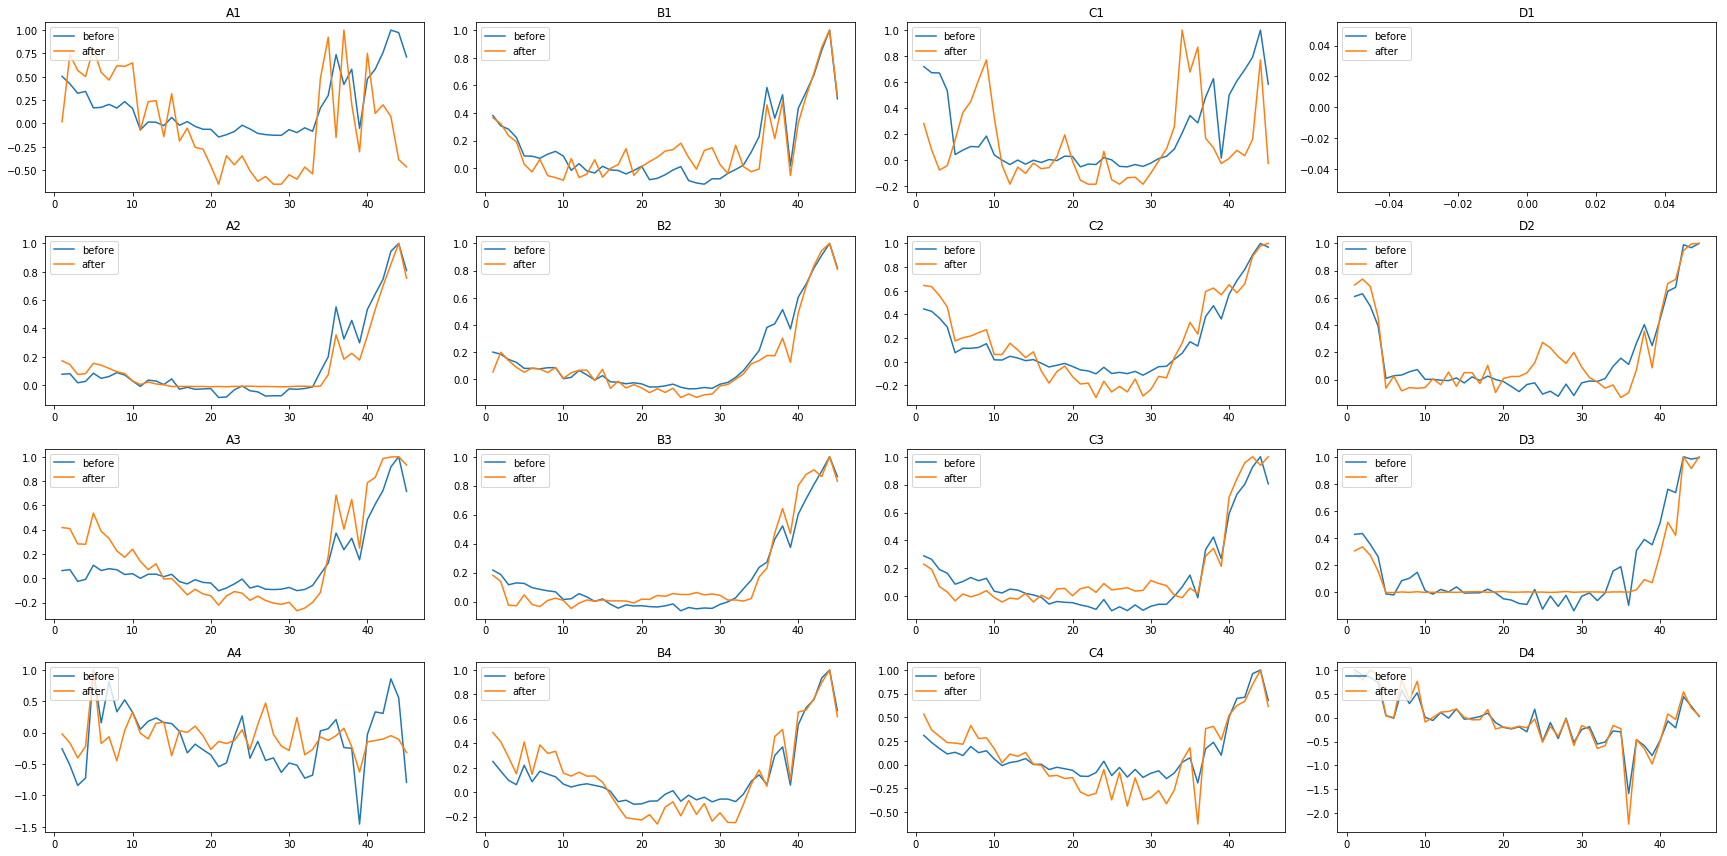

In [114]:
fig, axes = plt.subplots(4, 4, figsize=(24, 12))
n = 0
for col in df_cal_high_norm.columns:
    i = n%4
    j = n//4
    axes[i, j].plot(df_high_norm_before[col], label='before')
    axes[i, j].plot(df_cal_high_norm[col], label='after')
    axes[i, j].set_title(col)
    n += 1
    axes[i, j].legend(loc='upper left')
plt.tight_layout()
plt.savefig('compare_high_cal.png')
plt.show()

Various estimation for RFU

In [109]:
method_li = ['sum', 'intensity over sqrt of area', 'sum of intensity^2', 'sum of intensity^10']
rfu_dict = {}
for i in range(len(method_li)):
    rfu_dict[method_li[i]] = {}
    for t in range(2):
        rfu_dict[method_li[i]][temp_li[t]] = {}
        for well in well_location_dict.keys():
            rfu_dict[method_li[i]][temp_li[t]][well] = [0]*45

        for c in range(45):
            im_labeled = im_dict[temp_li[t]][c]['labeled']
            im_gray = im_dict[temp_li[t]][t]['gray']
            sorted_region_key = list(im_dict[temp_li[t]][c]['regions'].keys())
            sorted_region_key.sort(reverse=True)

            well_recorded_li = []
            for key in sorted_region_key:
                region_obj = im_dict[temp_li[t]][c]['regions'][key]
                y, x = region_obj.centroid
                well = get_well_loc(x, y)
                if well is not None and well not in well_recorded_li:
                    well_recorded_li.append(well)
                    if i == 0:
                        rfu_dict[method_li[i]][temp_li[t]][well][c] = region_obj.intensity_image.sum()
                    elif i == 1:
                        rfu_dict[method_li[i]][temp_li[t]][well][c] = np.true_divide(region_obj.intensity_image.sum(), math.sqrt(region_obj.area))
                    elif i == 2:
                        rfu_dict[method_li[i]][temp_li[t]][well][c] = np.sum(region_obj.intensity_image ** 2)
                    elif i == 3:
                        rfu_dict[method_li[i]][temp_li[t]][well][c] = np.sum(region_obj.intensity_image ** 10)


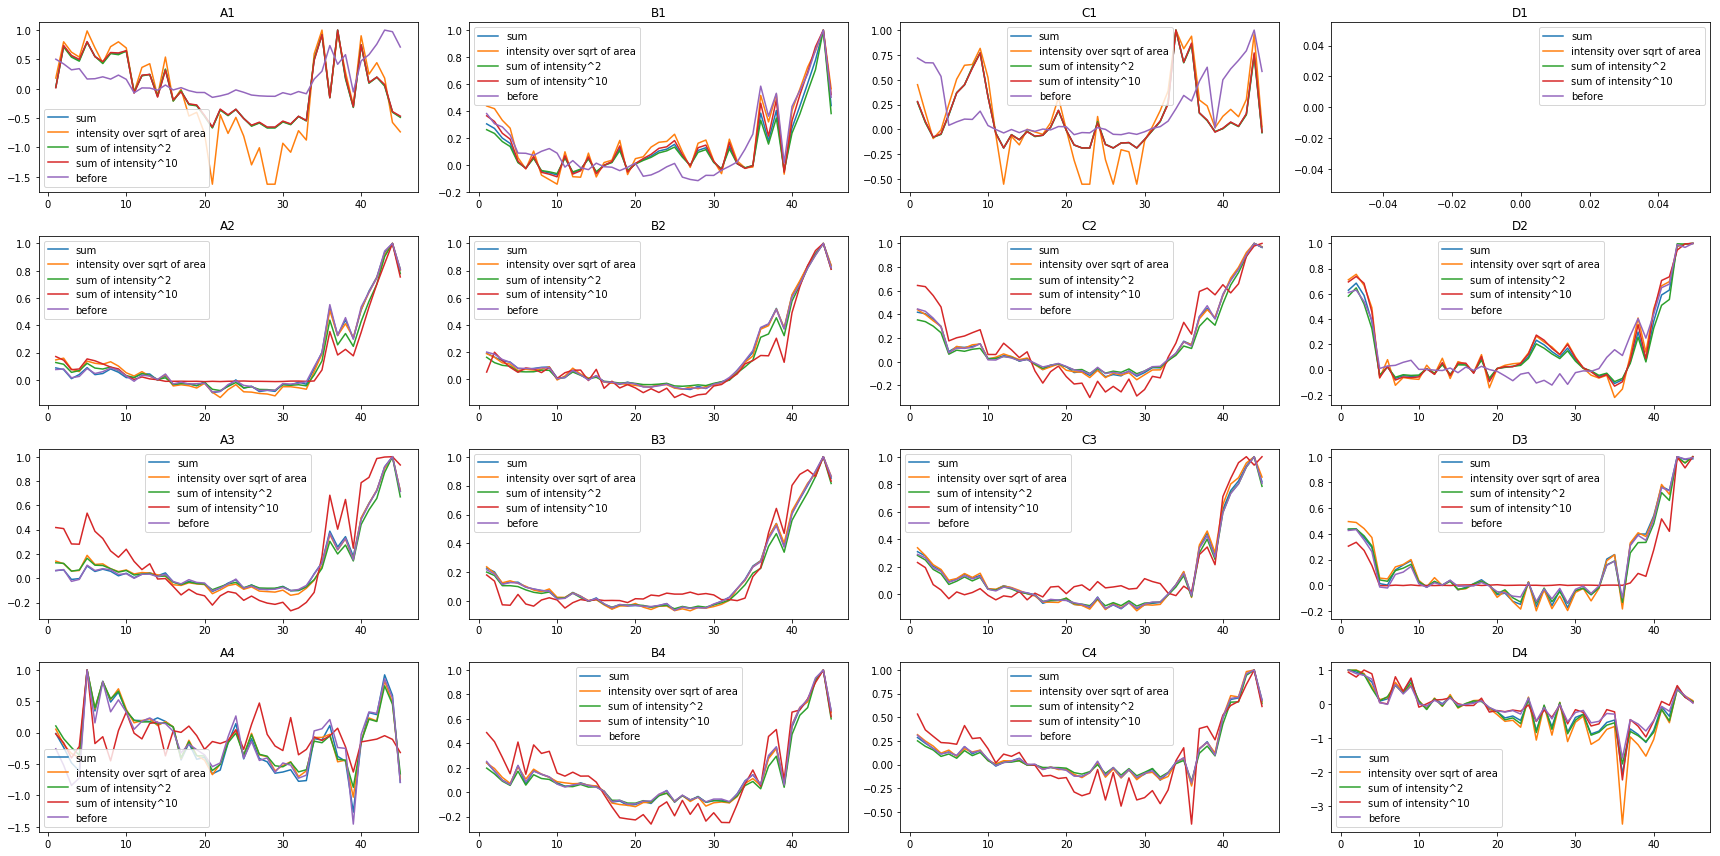

In [117]:
fig, axes = plt.subplots(4, 4, figsize=(24, 12))
for key in rfu_dict.keys():
    df_cal_high = pd.DataFrame(rfu_dict[key]['High Temp'])
    df_cal_high.index = range(1, 46)
    df_cal_high = df_cal_high.reindex(sorted(df_cal_high.columns), axis=1)
    df_cal_high_norm = (df_cal_high-df_cal_high.loc[10:20].mean())/(df_cal_high.max()-df_cal_high.loc[10:20].mean())
    n = 0
    for col in df_cal_high_norm.columns:
        i = n%4
        j = n//4
        axes[i, j].plot(df_cal_high_norm[col], label=key)
        n += 1

n = 0
df_high_norm_before = df_high_norm_before.reindex(sorted(df_high_norm_before.columns), axis=1)
for col in df_high_norm_before.keys():
    i = n%4
    j = n//4
    axes[i, j].plot(df_high_norm_before[col], label='before')
    n += 1
    axes[i, j].set_title(col)
    axes[i, j].legend(loc='best')

plt.tight_layout()
plt.savefig('compare_high_cal_var.png')
plt.show()